# **MIST 6150 Project** _(Matt Davis, Anh, Raj)_
## Spring Semester, 2019

[<img src=https://www.uml.edu/Images/logo_tcm18-196751.svg width="100">](https://www.uml.edu/) [<img src=https://patterns.boston.gov/images/public/seal.svg width="100">](https://data.boston.gov/)
### In this shell, I have combined the work of all collaborators for the project.  The datasets used are available both here, and where they are introduced to the dataset. The datasets that you will need to run this shell in its entirety are: `df_cri.csv`(67.4 MB), `df_ins.csv`(218.6 MB), `dempop_metadata.csv`(7 KB), `dempop_zip.csv`(8.8 MB)

## **Download All Files at Once**
>- For a downloadable link of **all 10** datasets used in the following analysis click here: [Zipped File of All Datasets](https://github.com/mattdavis17/MIST-6150-Dataset-Deliverables/archive/master.zip)(52.8 MB) _zipped_
>>**_Please be sure to uncompress the individual csv files and change your working directory to the appropriate folder._**

## **Individual Files Available for Download:** 
>- For a downloadable link of the **raw** [Boston Crime Dataset, `df_cri.csv`](https://github.com/mattdavis17/MIST-6150-Dataset-Deliverables/raw/master/df_cri.csv.zip)(12.1 MB)(_zipped_).
>- For a downloadable link of the **Cleaned Crime with Zip** [df_crime_and_zip_valuecounts.csv.zip](https://github.com/mattdavis17/MIST-6150-Dataset-Deliverables/raw/master/df_crime_and_zip_valuecounts.csv.zip)(10.9 MB) _zipped_).
>- For a link to the **Cleaned Demographics Data** ([dempop_metadata.csv](https://github.com/mattdavis17/MIST-6150-Dataset-Deliverables/raw/master/dempop_metadata.csv.zip)(1.81 KB), [dempop_zip.csv](https://github.com/mattdavis17/MIST-6150-Dataset-Deliverables/raw/master/dempop_zip.csv.zip)(376 MB) _zipped_)
>- For a downloadable link of the **raw** [Food Inspection Dataset, `df_ins.csv`](https://github.com/mattdavis17/MIST-6150-Dataset-Deliverables/raw/master/df_ins.csv.zip)(19.8 MB) _zipped_.
>- For a downloadable link of the **cleaned** [Food Inspection Dataset, `df_foodins_clean.csv`](https://github.com/mattdavis17/MIST-6150-Dataset-Deliverables/raw/master/df_foodins_clean.csv.zip)(5.19 MB) _zipped_
>- For a downloadable link of the **cleaned** [Food Inspection Dataset with Names `df_foodins_clean_name.csv`](https://github.com/mattdavis17/MIST-6150-Dataset-Deliverables/raw/master/df_foodins_clean_name.csv.zip)(1.91 MB) _zipped_
>- For additional datasets, please click **[here](https://github.com/mattdavis17/MIST-6150-Dataset-Deliverables)**


## **Descriptions about the data can be found here:**
>- [Boston Crime Dataset](https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system) (_Note, this dataset was downloaded on 3/08/2019, this link will bring up the data **to current date**_)
>- [Food Inspection Dataset](https://data.boston.gov/) (_Link needed for the site of download_)
>- [Zipcode Dataset](https://www.google.com) (_Link needed for the site of download_)

## **Project Overview**
#### The start of the investigation of the dataset could go in many different directions, however, towards the end ("Further Analysis"), it was decided that both the Boston Crime dataset and the Food Inspection dataset could be merged as an additional parameter for the public to choose the best restaurants based on crime ratings.
#### Beyond the scope of this project, it would be important to analyze the different aspects of the dataset to find commonalities which would curb crime/violent/dangerous acts within the city of Boston and its surroundings.

<a id='top'></a>
# **Python Shell Table of Contents:**
**Topic** | **Description of Topic**
:-- | :--
1. **[Importing & Cleaning: Crime (Matt)](#importing)<a href='importing'></a>** | **I have used the Boston Crime Dataset**
2. **[Visuals: Crime (Matt)](#visuals)<a href='visuals'></a>** | **An indepth look at each of the columns of the dataset**
3. **[Raj's Work](#Raj)<a href='Raj'></a>** | **Raj walks through his cleaning process of aligning zipcodes to the datasets.**
4. **[Merging Zipcodes: Crime (Matt/Raj)](#mergingzipcodes)<a href='mergingzipcodes'></a>** | **Using the Geocoding from Raj, I was able to merge zipcodes based on their corresponding location coordinates (_done using Tableau Prep_).**
5. **[Further Analysis: Crime (Matt)](#ucr_part)<a href='ucr_part'></a>** | **Here, I created a dataset using the distinct zipcodes available and the `value_count` method of identifying both UCR Part 1, Part 2, as well as homicide reports separately.**
6. **[Demographics & Zipcode (Raj)](#testing)<a href='testing'></a>** | **Here, Matt is investigating the demographics using `dempop_zip.csv` from Raj's work.**
7. **[Food Inspection (Anh)](#food)<a href='food'></a>** | **Anh walks through her cleaning and analysis**

`cd '/Users/matthewdavis/Desktop/Project Deliverables MASTER/'`

In [2]:
ls # Ensure that you have the necessary files downloaded:

MIST 6150 Project Deliverable.ipynb  df_criUniquezip.csv*
dempop_metadata.csv                  df_crime_and_zip_valuecounts.csv
dempop_zip.csv                       df_foodins_clean.csv*
df_cri.csv                           df_foodins_clean_name.csv*
df_criUnique.csv*                    df_ins.csv


In [3]:
import numpy as np
import pandas as pd
from scipy import stats
import re
from statistics import mode #found on https://stackoverflow.com/questions/10797819/finding-the-mode-of-a-list)
import random
from random import choice

# Using https://pypi.org/project/folium/, I was able to work with heat maps.
# I needed to install folium first through the terminal using this command line:  pip install folium

import folium

from folium import plugins
from folium.map import Layer
from folium.utilities import _isnan, _iter_tolist, none_max, none_min
from folium import plugins
from folium.plugins import HeatMap

# matplotlib imports
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
plt.subplots(figsize=(10,6))
%matplotlib inline

# seaborn imports
import seaborn as sns
sns.set(color_codes=True)

order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
month_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
district_order = ['A1', 'A7', 'A15', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']

In [4]:
cd '/Users/matthewdavis/Desktop/Project Deliverables MASTER/'

/Users/matthewdavis/Desktop/Project Deliverables MASTER


In [5]:
# Importing the files used in this shell:

df_cri = pd.read_csv('df_cri.csv')
raj = pd.read_csv('dempop_zip.csv')
raj_meta = pd.read_csv('dempop_metadata.csv', index_col='Columns')
df_ins_org = pd.read_csv('df_ins.csv', low_memory=False)
resto_insp=pd.read_csv('df_foodins_clean_name.csv')

<a id='importing'></a>
# **Boston Crime Dataset & Cleaning Process**
**Location of the Boston Crime Dataset, [Direct Link To Download Data, `df_cri`: "Boston Crime"](https://github.com/mattdavis17/MIST-6150-Dataset-Deliverables/raw/master/df_cri.csv.zip)**

[Table of Contents](#top)<a href='top'></a>

In [6]:
# Checking the null values.

df_cri.isnull().sum()

incident_number             0
offense_code                0
offense_code_group          0
offense_description         0
district                 1983
reporting_area              0
shooting               366862
occurred_on_date            0
year                        0
month                       0
day_of_week                 0
hour                        0
ucr_part                  100
street                  11536
lat                     23888
long                    23888
location                    0
dtype: int64

In [7]:
# Checking the data types.

df_cri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368348 entries, 0 to 368347
Data columns (total 17 columns):
incident_number        368348 non-null object
offense_code           368348 non-null int64
offense_code_group     368348 non-null object
offense_description    368348 non-null object
district               366365 non-null object
reporting_area         368348 non-null object
shooting               1486 non-null object
occurred_on_date       368348 non-null object
year                   368348 non-null int64
month                  368348 non-null int64
day_of_week            368348 non-null object
hour                   368348 non-null int64
ucr_part               368248 non-null object
street                 356812 non-null object
lat                    344460 non-null float64
long                   344460 non-null float64
location               368348 non-null object
dtypes: float64(2), int64(4), object(11)
memory usage: 47.8+ MB


In [8]:
# Checking the dimensions.

df_cri.shape

(368348, 17)

In [9]:
df_cri.shooting.unique()

array([nan, 'Y'], dtype=object)

In [10]:
# It looks like there are 1,486 'Y' and a whole bunch of NaN.  
# This means that there are that many shootings documented.  
# I am going to use fillna to put in 'N' for No.
# This is an assumption, however, which means we should discuss if this is OK.

df_cri['shooting'].value_counts(dropna = False)

NaN    366862
Y        1486
Name: shooting, dtype: int64

In [11]:
# I am replacing the NaN values in 'shooting' with N for "NO".
# I will investigate this later to see what is important in this column.

df_cri['shooting'].fillna('N', inplace=True)
df_cri['shooting'].value_counts(dropna = False)

N    366862
Y      1486
Name: shooting, dtype: int64

## Now that shooting is fixed, I'll investigate the other columns that have NaN's.

In [12]:
df_cri.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                1983
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                 100
street                 11536
lat                    23888
long                   23888
location                   0
dtype: int64

In [13]:
# This is the amount of entries in each district.  I am not quite sure of the importance of each district, however.
df_cri['district'].value_counts(dropna = False)

B2     57866
C11    49428
D4     47957
B3     41629
A1     41500
C6     26437
D14    23201
E13    20132
E18    20116
E5     15569
A7     14984
A15     7546
NaN     1983
Name: district, dtype: int64

In [14]:
# Since district is correlated to location, rather than impute values, I will remove them entirely.
# I'll drop only rows considering 'district' by setting the subset='district'.

df_cri = df_cri.dropna(subset=['district'])
df_cri.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                   0
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                 100
street                 10386
lat                    23543
long                   23543
location                   0
dtype: int64

In [15]:
df_cri['ucr_part'].value_counts(dropna = False)

Part Three    182786
Part Two      111748
Part One       70312
Other           1419
NaN              100
Name: ucr_part, dtype: int64

In [16]:
# I'm going to replace 'Other' with NaN and just chalk it up as a loss.

df_cri['ucr_part'].replace({'Other':np.nan}, inplace=True)
df_cri['ucr_part'].value_counts(dropna = False)

Part Three    182786
Part Two      111748
Part One       70312
NaN             1519
Name: ucr_part, dtype: int64

In [17]:
# Here, I will drop the NaN entries so there are now only Part 1, 2, & 3.

df_cri = df_cri.dropna(subset=['ucr_part'])
df_cri.isnull().sum()

incident_number            0
offense_code               0
offense_code_group         0
offense_description        0
district                   0
reporting_area             0
shooting                   0
occurred_on_date           0
year                       0
month                      0
day_of_week                0
hour                       0
ucr_part                   0
street                 10352
lat                    23443
long                   23443
location                   0
dtype: int64

## Now I need to take a look at street.

In [18]:
# There are alot of streets involved. 4,406 different ones.

df_cri.street.nunique()

4406

In [19]:
# These are the top 20 streets where an infraction occurred.
# NaN is #2 out of the top 20.  This needs to be dropped.

df_cri['street'].value_counts(dropna=False).head(20)

WASHINGTON ST        16511
NaN                  10352
BLUE HILL AVE         9002
BOYLSTON ST           8313
DORCHESTER AVE        5858
TREMONT ST            5540
MASSACHUSETTS AVE     5382
HARRISON AVE          5353
CENTRE ST             5090
COMMONWEALTH AVE      4806
HYDE PARK AVE         4053
COLUMBIA RD           3689
HUNTINGTON AVE        3438
RIVER ST              3301
DUDLEY ST             2748
COLUMBUS AVE          2692
WARREN ST             2673
ADAMS ST              2379
BEACON ST             2257
NEWBURY ST            2225
Name: street, dtype: int64

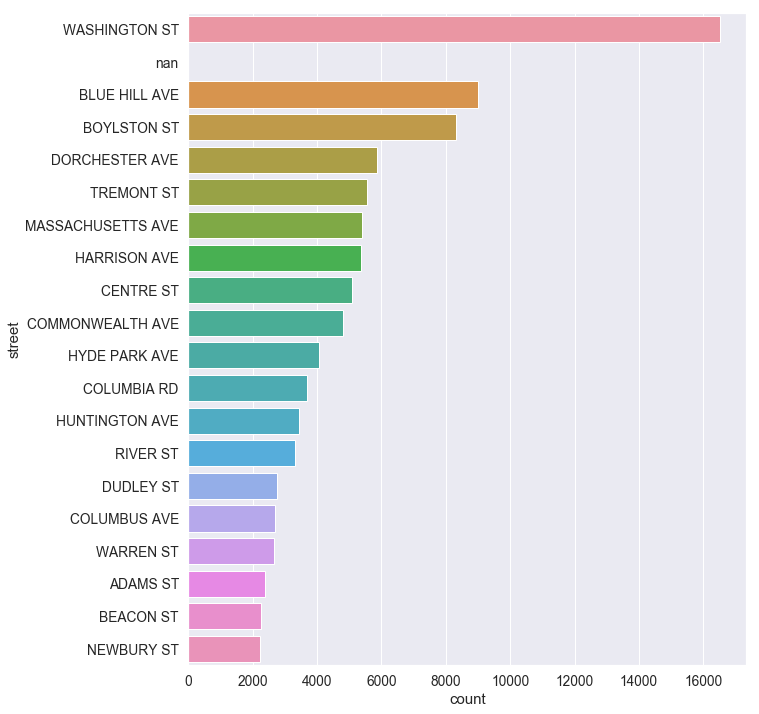

In [20]:
# These are the top 20 offense_code_groups according to the data.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10,12))
sns.countplot(y='street', data=df_cri, order=df_cri.street.value_counts(dropna=False).iloc[:20].index)

In [21]:
df_cri = df_cri.dropna(subset=['street'])

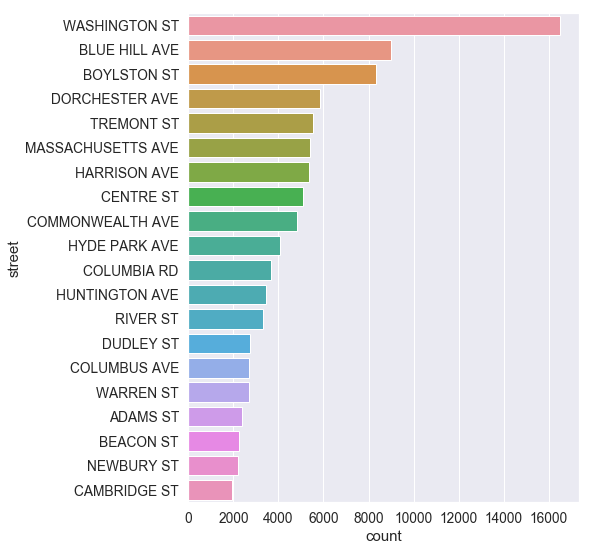

In [22]:
# These are the top 20 streets according to the data after NaN is dropped.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(7,9))
sns.countplot(y='street', data=df_cri, order=df_cri.street.value_counts(dropna=False).iloc[:20].index)

## Now I need to investigate lat & long.  

In [23]:
# This is the number of unique lat coordinates.

df_cri['lat'].nunique()

18122

In [24]:
# This is the number of unique long coordinates.  There are two additional in lat that are not in long.

df_cri['long'].nunique()

18120

In [25]:
# both lat and long have the same amount of NaN's.  But are they the same?

df_cri.lat.isnull().sum()

14197

In [26]:
df_cri.long.isnull().sum()

14197

In [27]:
# I'm going to drop the na's and hopefully they are the same ones in both columns.
# I'll just choose lat as the subset.
# And this worked! No more NaN's!

df_cri = df_cri.dropna(subset=['lat'])

In [28]:
df_cri.shape

(340297, 17)

One thing that I noticed about location was there was coordinates with (-1.000,-1.000) which tells me that this should be removed because for some reason they were changed to that rather than NaN.

In [29]:
df_cri.location.min()

'(-1.00000000, -1.00000000)'

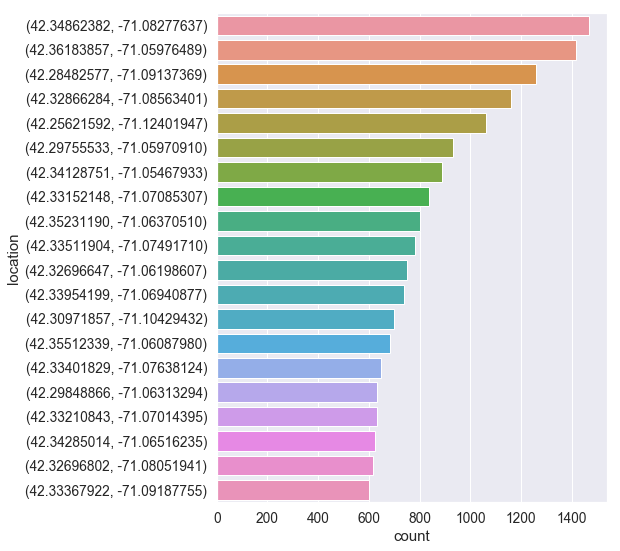

In [30]:
# These are the top 20 streets according to the data after NaN is dropped. 
# That weird location isn't in the top 20 at least.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(7,9))
sns.countplot(y='location', data=df_cri, order=df_cri.location.value_counts(dropna=False).iloc[:20].index)

In [31]:
# There are 201 occurences of this string coming up in the data.
# I think I'm going to just drop these 201 occurences so I can have a clean set of data.

df_cri.location.str.contains('(-1.00000000, -1.00000000)', case=False).sum()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  after removing the cwd from sys.path.


201

In [32]:
df_cri['location'].replace({'(-1.00000000, -1.00000000)':np.nan}, inplace=True)
df_cri.location.str.contains('(-1.00000000, -1.00000000)', case=False).sum()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


0

In [33]:
# I'll just choose location as the subset.
# And this worked! No more NaN's!

df_cri = df_cri.dropna(subset=['location'])

## I'm finished dropping the NaN's from the dataset. 
- I'll create a copy
- Then I will alter the dtypes to what I think they should be.

In [34]:
df_criclean = df_cri.copy(deep=True)

### I'm going to change some of the columns to the appropriate type.

In [35]:
df_criclean[['offense_code_group', 'offense_description', 'district', 'day_of_week', 
             'ucr_part', 'shooting', 'year', 'month', 'hour', 'street']] = df_criclean[['offense_code_group', 
                                                                                        'offense_description', 'district', 'day_of_week', 'ucr_part', 
                                                                                        'shooting', 'year', 'month', 'hour', 'street']].astype('category')
df_criclean['location'] = df_criclean['location'].astype(str)
df_criclean.occurred_on_date = pd.to_datetime(df_criclean.occurred_on_date)

df_criclean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340096 entries, 0 to 368347
Data columns (total 17 columns):
incident_number        340096 non-null object
offense_code           340096 non-null int64
offense_code_group     340096 non-null category
offense_description    340096 non-null category
district               340096 non-null category
reporting_area         340096 non-null object
shooting               340096 non-null category
occurred_on_date       340096 non-null datetime64[ns]
year                   340096 non-null category
month                  340096 non-null category
day_of_week            340096 non-null category
hour                   340096 non-null category
ucr_part               340096 non-null category
street                 340096 non-null category
lat                    340096 non-null float64
long                   340096 non-null float64
location               340096 non-null object
dtypes: category(10), datetime64[ns](1), float64(2), int64(1), object(3)
memor

In [36]:
# I am cleaning the offense_code_group column

print("\nNumber of Unique Values in 'offense_code_group':", df_criclean.offense_code_group.nunique())

# I'm changing all values to lowercase and stripping extra whitespace to see if anything changed.
df_criclean['offense_code_group'] = df_criclean.offense_code_group.str.lower()
df_criclean['offense_code_group'] = df_criclean['offense_code_group'].map(str.strip)
print("\nNumber of Unique Values in 'offense_code_group' AFTER cleaning:", df_criclean.offense_code_group.nunique())

# No null values which is good.
print("\nNumber of NULL values in column:", df_criclean.offense_code_group.isnull().sum())


Number of Unique Values in 'offense_code_group': 59

Number of Unique Values in 'offense_code_group' AFTER cleaning: 59

Number of NULL values in column: 0


In [37]:
# I am cleaning the offense_description column

print("\nNumber of Unique Values in 'offense_description':", df_criclean.offense_description.nunique())

# I'm changing all values to lowercase and stripping extra whitespace to see if anything changed.
df_criclean['offense_description'] = df_criclean.offense_description.str.lower()
df_criclean['offense_description'] = df_criclean['offense_description'].map(str.strip)
print("\nNumber of Unique Values in 'offense_description' AFTER cleaning:", df_criclean.offense_description.nunique())

# No null values which is good.
print("\nNumber of NULL values in column:", df_criclean.offense_description.isnull().sum())


Number of Unique Values in 'offense_description': 226

Number of Unique Values in 'offense_description' AFTER cleaning: 225

Number of NULL values in column: 0


In [38]:
df_criclean.shape

(340096, 17)

In [39]:
# Right here, I'm dropping any duplicate lines.  It looks like 0.18% of the rows were dropped.
# I am also dropping 'incident_number' and 'offense_code' as there is really no importance to the dataset.

df_criclean = df_criclean.drop_duplicates().reset_index(drop=True)
df_criclean = df_criclean.drop(columns=['incident_number', 'offense_code'])
df_criclean.shape

(339491, 15)

 **_Write a csv file for use later:_**  `df_criclean.to_csv('df_criclean.csv', index = False)`
_(this dataset is used for all visuals)_.

* For Matt, I ran this code to save it to the desktop:  
`df_criclean.to_csv('/Users/matthewdavis/Desktop/df_criclean.csv', index = False)`

<a id='visuals'></a>

# **Visuals:** **In the following sequence, I am displaying visuals**
>**_I want to understand what is going on with this data so I put together a bunch of visuals._**

[Table of Contents](#top)<a href='top'></a>

In [40]:
df_criclean.head()

offense_code_group                    offense_description  \
0                          larceny               larceny theft of bicycle   
1               medical assistance          sick/injured/medical - person   
2  motor vehicle accident response  m/v - leaving scene - property damage   
3             investigate property                   investigate property   
4                          larceny                    larceny shoplifting   

  district reporting_area shooting    occurred_on_date  year month  \
0      D14            794        N 2019-03-08 17:00:00  2019     3   
1      C11            407        N 2019-03-08 21:13:00  2019     3   
2       A7             22        N 2019-03-08 20:44:00  2019     3   
3       B2            259        N 2019-03-08 19:06:00  2019     3   
4       D4            624        N 2019-03-08 20:43:00  2019     3   

  day_of_week hour    ucr_part         street        lat       long  \
0      Friday   17    Part One  GLENVILLE AVE  42.349780 -71.134230   
1      Friday   21  Part Three  WASHINGTON ST  42.273420 -71.070000   
2      Friday   20  Part Three       HAVRE ST  42.374951 -71.035879   
3      Friday   19  Part Three    MAGNOLIA ST  42.314784 -71.071610   
4      Friday   20    Part One    BOYLSTON ST  42.344896 -71.096592   

                      location  
0  (42.34977988, -71.13423049)  
1  (42.27342041, -71.07000030)  
2  (42.37495129, -71.03587934)  
3  (42.31478432, -71.07160997)  
4  (42.34489594, -71.09659186)

**Make sure that you can run Folium:**

`!pip install folium`

**If that didn't work, then try:**

`!pip conda install folium -c conda-forge`

             lat       long                    location  count
13798  42.348624 -71.082776  (42.34862382 -71.08277637)   1465
16140  42.361839 -71.059765  (42.36183857 -71.05976489)   1414
3555   42.284826 -71.091374  (42.28482577 -71.09137369)   1255
10235  42.328663 -71.085634  (42.32866284 -71.08563401)   1159
620    42.256216 -71.124019  (42.25621592 -71.12401947)   1060
         lat       long                    location  count
0  42.232413 -71.129715  (42.23241330 -71.12971531)     10
1  42.232656 -71.130700  (42.23265556 -71.13069992)      3
2  42.232870 -71.130050  (42.23287025 -71.13004959)      5
3  42.232907 -71.131671  (42.23290729 -71.13167059)      3
4  42.233086 -71.128157  (42.23308580 -71.12815697)     15


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


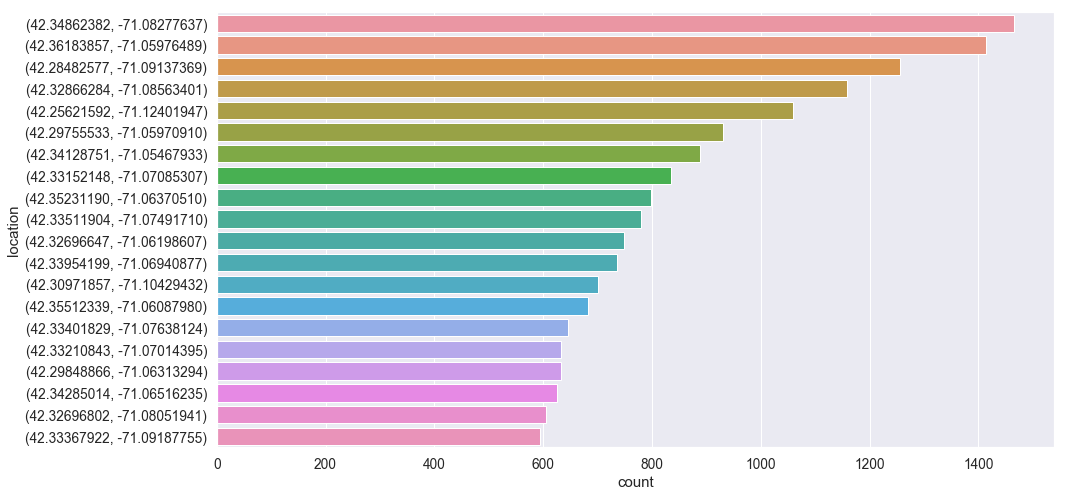

In [41]:
# These are the top 20 'coordinates' according to the data.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15,8))
sns.countplot(y='location', data=df_criclean, order=df_criclean.location.value_counts().iloc[:20].index)



# Here, I'm making a Dataframe of the locations and the count.  What you see below
# is the top 5 locations. 
# I want to use this for my folium map.

df1 = df_criclean.groupby(["lat", "long", "location"]).size().reset_index(name='count')
df1['location'] = df1['location'].str.replace(',', '')

# Sort the count from highest count with location to lowest.
print(df1.sort_values(by = 'count', ascending=False).head())

# The DataFrame not sorted.
print(df1.head())

# convert to (n, 2) nd-array format for heatmap

locationArr = df1[['lat', 'long']].as_matrix()

m = folium.Map(location=[42.32, -71.0589], zoom_start=12)
m.add_child(plugins.HeatMap(locationArr, radius=9))
m


**To write a csv on the above unique values, run this code:**  `df1.to_csv('df_criUnique.csv', index = False)`



**Value count by day of the week:**



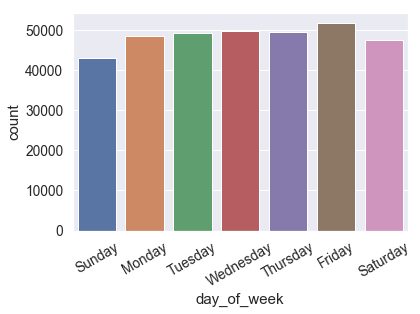

In [42]:
print("\n**Value count by day of the week:**\n")

plt.xticks(rotation=30)
sns.countplot(x='day_of_week', data=df_criclean, order = order)

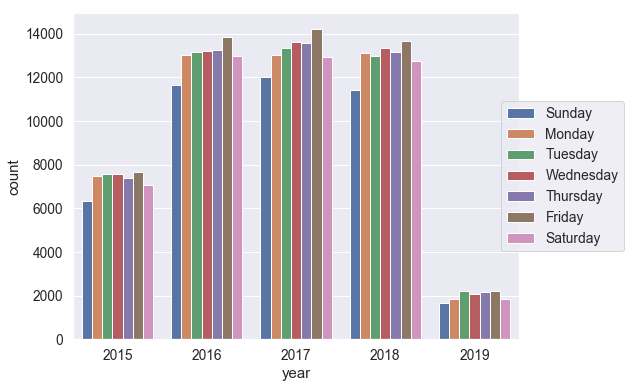

In [43]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='year', hue='day_of_week', hue_order=order, data=df_criclean).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.25, 0.5))

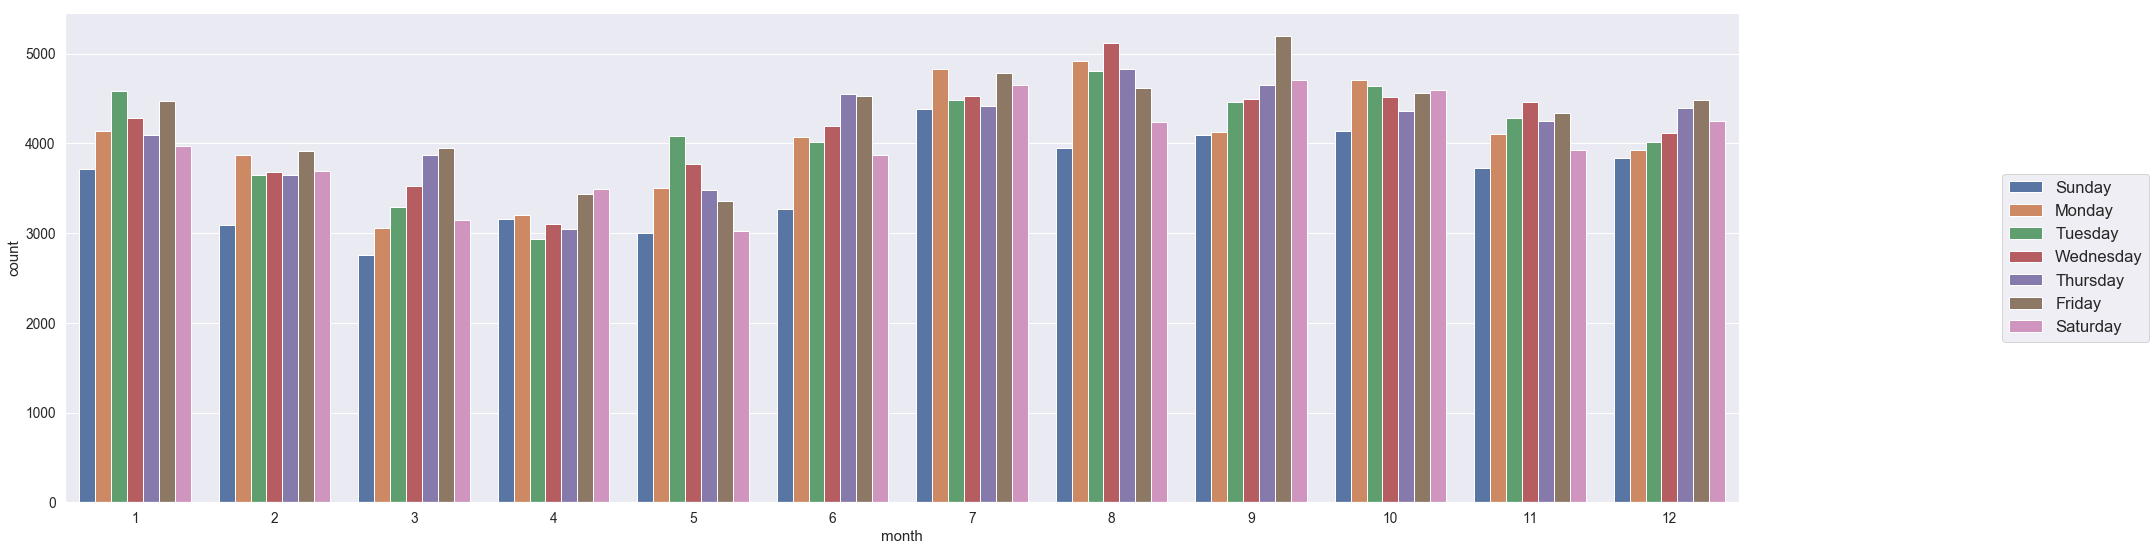

In [44]:
f, ax = plt.subplots(figsize=(30, 9))
sns.set(font_scale=1.5)
plt.xticks(rotation=0)
sns.countplot(x='month', hue='day_of_week', hue_order=order, data=df_criclean).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.25, 0.5))

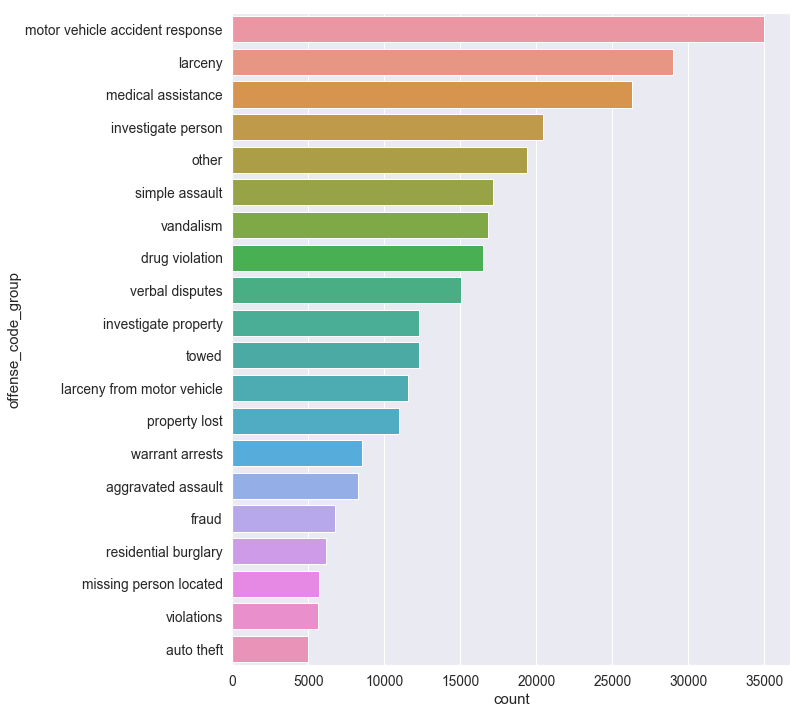

In [45]:
# These are the top 20 offense_code_groups according to the data.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10,12))
sns.countplot(y='offense_code_group', data=df_criclean, order=df_criclean.offense_code_group.value_counts().iloc[:20].index)

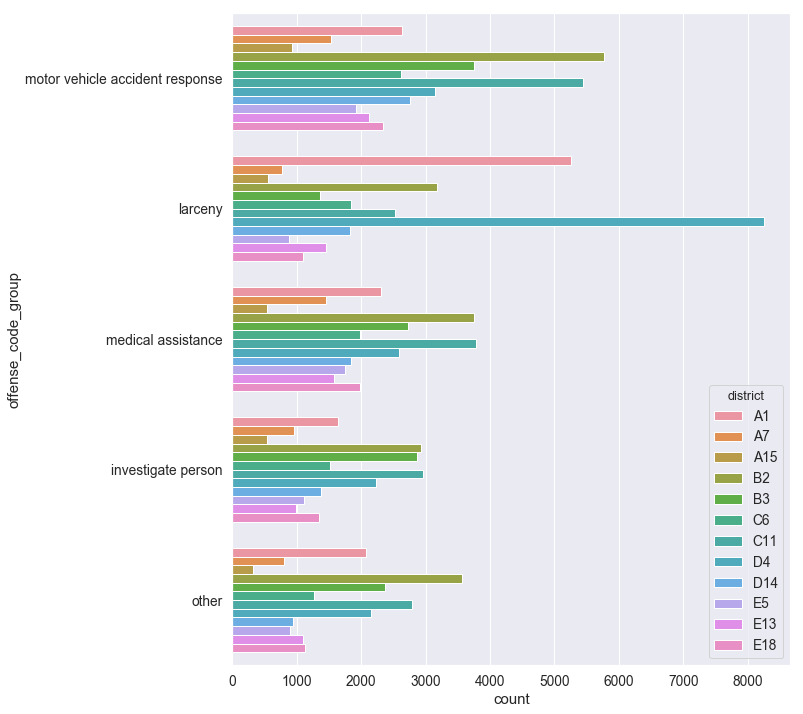

In [46]:
# These are the top 5 offense_code_groups based on district according to the data.
district_order = ['A1', 'A7', 'A15', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10,12))
sns.countplot(y='offense_code_group', hue = 'district', hue_order = district_order, data=df_criclean, order=df_criclean.offense_code_group.value_counts().iloc[:5].index)

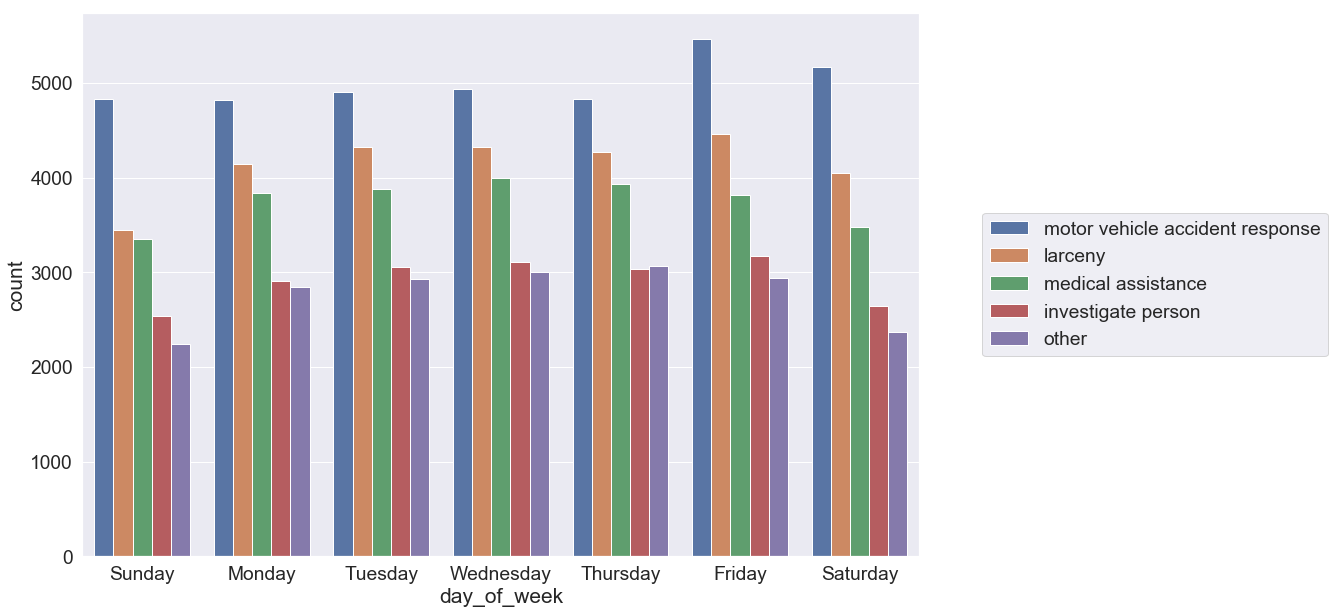

In [47]:
# These are the top 5 offense_code_groups based on the day according to the data.
district_order = ['A1', 'A7', 'A15', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
sns.set(font_scale=1.75)
f, ax = plt.subplots(figsize=(15,10))
sns.countplot(x='day_of_week', hue = 'offense_code_group', order = order, data=df_criclean, 
              hue_order=df_criclean.offense_code_group.value_counts().iloc[:5].index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.5, 0.5))

In [48]:
# I'm changing all values to lowercase to see if anything changed. Unfortunately, nothing changed.

df_criclean['offense_description'] = df_criclean.offense_description.str.lower()

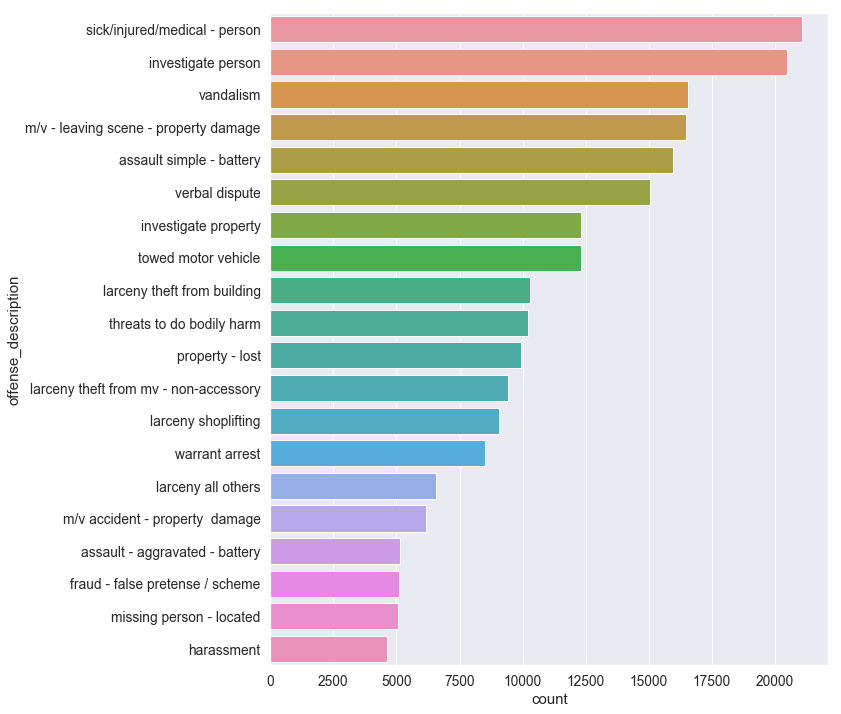

In [49]:
# These are the top 20 offense_description according to the data.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10,12))
sns.countplot(y='offense_description', data=df_criclean, order=df_criclean.offense_description.value_counts().iloc[:20].index)

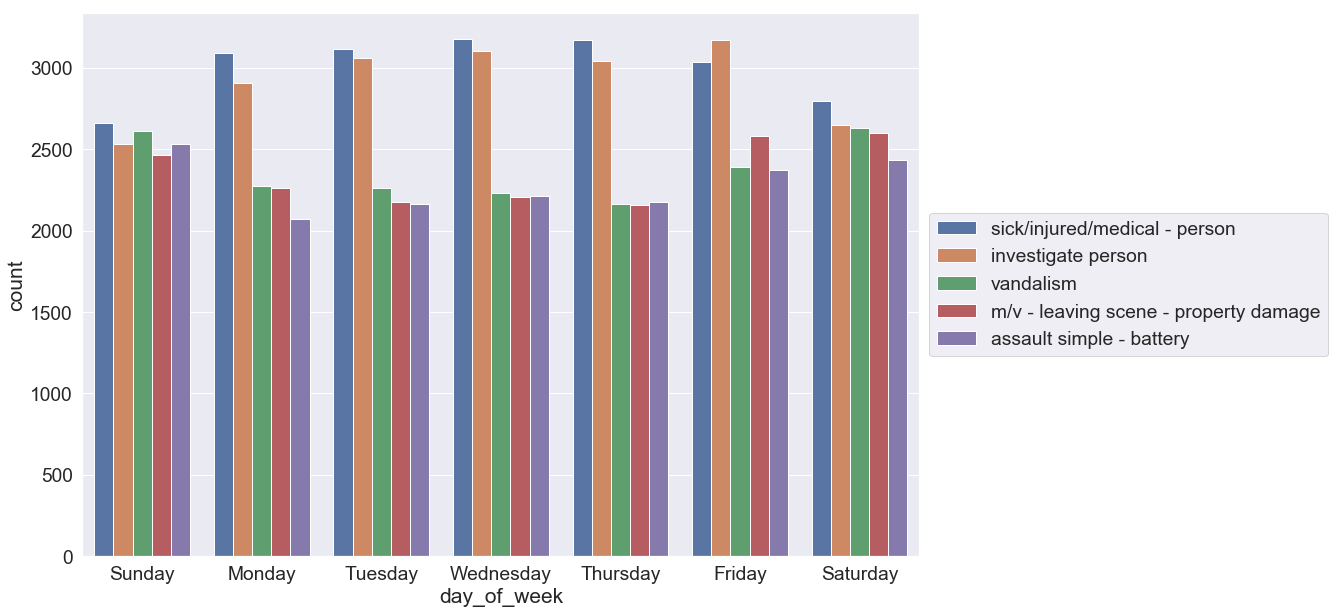

In [50]:
# These are the top 5 offense_descriptions based on the day according to the data.

sns.set(font_scale=1.75)
f, ax = plt.subplots(figsize=(15,10))
sns.countplot(x='day_of_week', hue = 'offense_description', order = order, data=df_criclean, 
              hue_order=df_criclean.offense_description.value_counts().iloc[:5].index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.5, 0.5))

In [51]:
df_criclean['district'].value_counts()

B2     52927
C11    46922
D4     43413
B3     39287
A1     36729
C6     24239
D14    21852
E18    19124
E13    18779
E5     14909
A7     14224
A15     7086
Name: district, dtype: int64

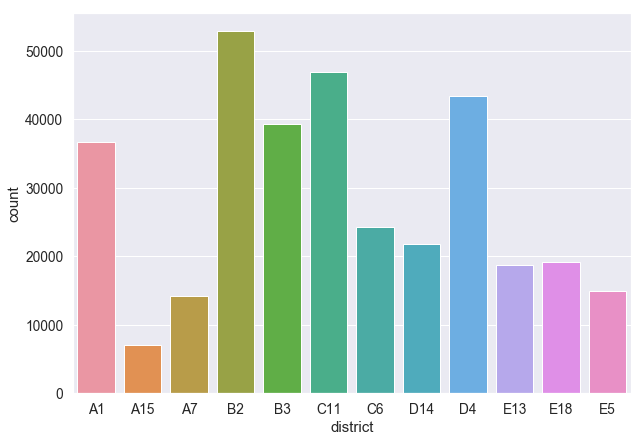

In [52]:
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='district', data=df_criclean)

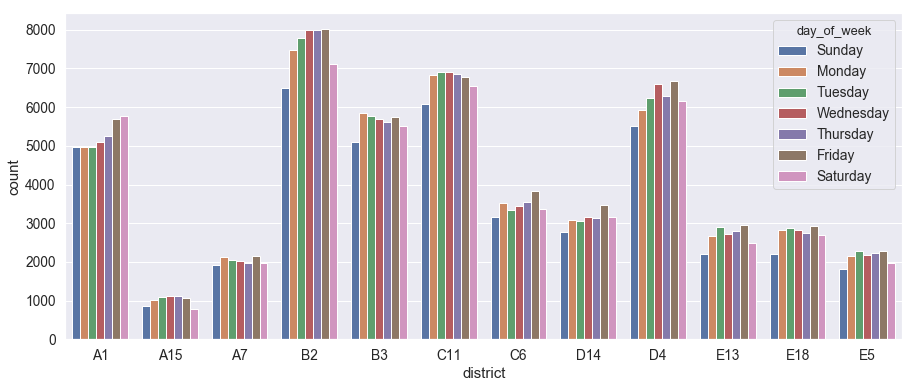

In [53]:
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='district', hue='day_of_week', data=df_criclean, hue_order=order)

### I'll now take a look at the dates and if I can split them up accordingly.

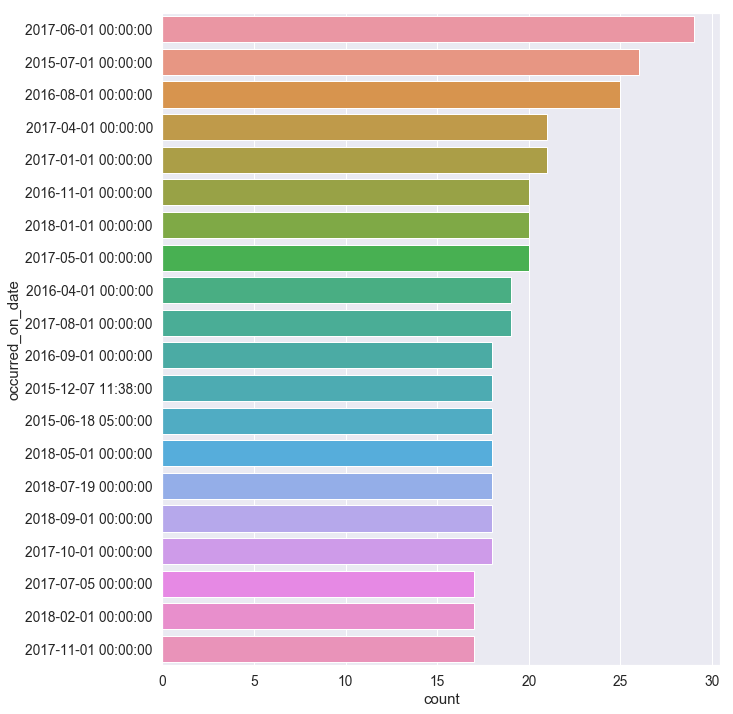

In [54]:
# These are the top 20 'occurred_on_dates' according to the data.
order_hour = range(0,24, 1)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10,12))
sns.countplot(y='occurred_on_date', data=df_criclean, order=df_criclean.occurred_on_date.value_counts().iloc[:20].index)

In [55]:
df_criclean.occurred_on_date.min()

Timestamp('2015-06-15 00:00:00')

In [56]:
df_criclean.occurred_on_date.max()

Timestamp('2019-03-08 21:13:00')

In [57]:
df_criclean.head()

offense_code_group                    offense_description  \
0                          larceny               larceny theft of bicycle   
1               medical assistance          sick/injured/medical - person   
2  motor vehicle accident response  m/v - leaving scene - property damage   
3             investigate property                   investigate property   
4                          larceny                    larceny shoplifting   

  district reporting_area shooting    occurred_on_date  year month  \
0      D14            794        N 2019-03-08 17:00:00  2019     3   
1      C11            407        N 2019-03-08 21:13:00  2019     3   
2       A7             22        N 2019-03-08 20:44:00  2019     3   
3       B2            259        N 2019-03-08 19:06:00  2019     3   
4       D4            624        N 2019-03-08 20:43:00  2019     3   

  day_of_week hour    ucr_part         street        lat       long  \
0      Friday   17    Part One  GLENVILLE AVE  42.349780 -71.134230   
1      Friday   21  Part Three  WASHINGTON ST  42.273420 -71.070000   
2      Friday   20  Part Three       HAVRE ST  42.374951 -71.035879   
3      Friday   19  Part Three    MAGNOLIA ST  42.314784 -71.071610   
4      Friday   20    Part One    BOYLSTON ST  42.344896 -71.096592   

                      location  
0  (42.34977988, -71.13423049)  
1  (42.27342041, -71.07000030)  
2  (42.37495129, -71.03587934)  
3  (42.31478432, -71.07160997)  
4  (42.34489594, -71.09659186)

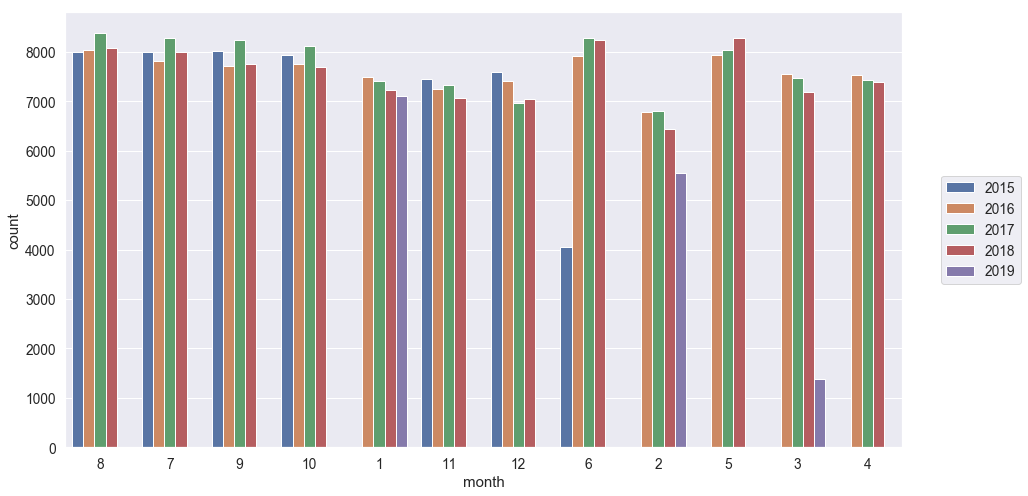

In [58]:
# These are the top 20 'occurred_on_dates' according to the data.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15,8))
sns.countplot(x='month', hue='year', data=df_criclean, 
              order=df_criclean.month.value_counts().iloc[:20].index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.15, 0.5))

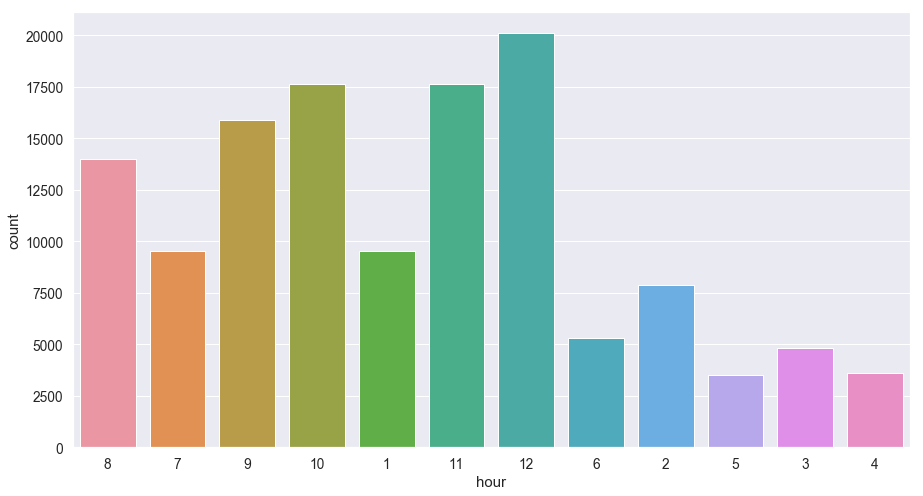

In [59]:
# These are the hours according to the data.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15,8))
sns.countplot(x='hour', data=df_criclean, order=df_criclean.month.value_counts().iloc[:20].index)

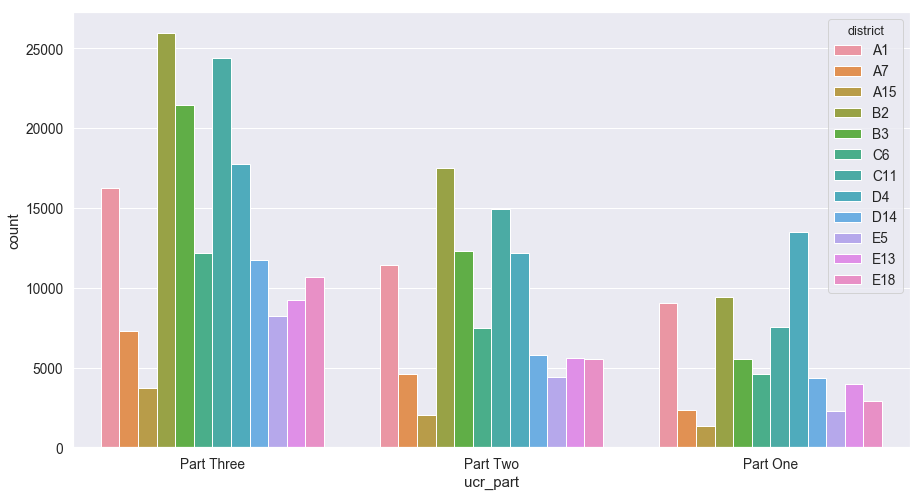

In [60]:
district_order = ['A1', 'A7', 'A15', 'B2', 'B3', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18']
ucr_order = ['Part One', 'Part Two', 'Part Three']
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15,8))
sns.countplot(x='ucr_part', hue='district',hue_order = district_order, 
              data=df_criclean, order=df_criclean.ucr_part.value_counts().iloc[:20].index)

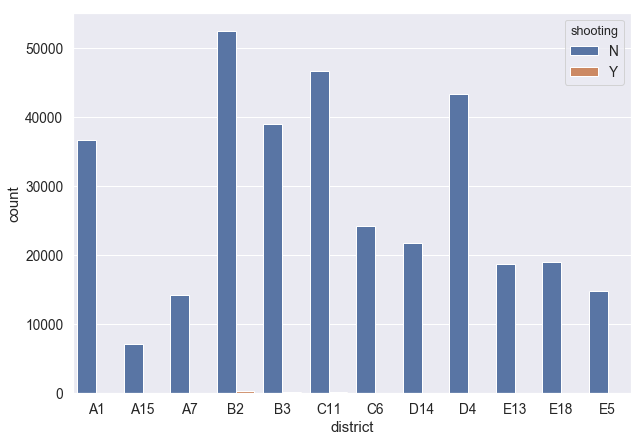

In [61]:
# It appears there's shootings in district B2.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='district', hue = 'shooting', data=df_criclean)

## Now I'll inspect the top 20 locations using the following lines:

```python
# These are the top 20 location coordinates of reported infractions.
district['location'].value_counts().head(20)
```

In [62]:
# I want to make a dataframe of the districts using location.
district = pd.DataFrame(df_criclean[['district', 'location']]).reset_index(drop=True)

# There are over 18,000 unique coordinates.  
district.location.nunique()

# These are the top 20 location coordinates of reported infractions.
district['location'].value_counts().head(20)

(42.34862382, -71.08277637)    1465
(42.36183857, -71.05976489)    1414
(42.28482577, -71.09137369)    1255
(42.32866284, -71.08563401)    1159
(42.25621592, -71.12401947)    1060
(42.29755533, -71.05970910)     930
(42.34128751, -71.05467933)     889
(42.33152148, -71.07085307)     835
(42.35231190, -71.06370510)     799
(42.33511904, -71.07491710)     780
(42.32696647, -71.06198607)     748
(42.33954199, -71.06940877)     735
(42.30971857, -71.10429432)     700
(42.35512339, -71.06087980)     683
(42.33401829, -71.07638124)     646
(42.33210843, -71.07014395)     633
(42.29848866, -71.06313294)     632
(42.34285014, -71.06516235)     625
(42.32696802, -71.08051941)     606
(42.33367922, -71.09187755)     594
Name: location, dtype: int64

<a id='Raj'></a>
# **Raj Cleaning Process**

## **_Google Reverse Geocoding APIs to get Zip codes_**
[Table of Contents](#top)<a href='top'></a>

`!pip install geopy`

 Using Google reverse Geocoding i.e. given lat, long; get the zip code

## _Using Google reverse Geocoding i.e. given lat, long; get the zip code_
## _Note the key below is a dummy key; as it is user specific authentication key to access Google APIs_

```python
from urllib.request import urlopen
import json

def getzip(lat, lon):
    key = "UML-6150-AIzaSyA1PJoV-dvT96j6pCxlYB3ir7ZRv"
    url = "https://maps.googleapis.com/maps/api/geocode/json?"
    url += "latlng=%s,%s&sensor=false&oe=utf8&key=%s" %(lat, lon, key)

    #print(url)
    v = urlopen(url).read()
    j = json.loads(v)
    components = j['results'][0]['address_components']
    zip = None
    for c in components:
        if "postal_code" in c['types']:
            zip = c['long_name']            
    return zip

print(getzip(42.34977988, -71.13423049))```


 Import the Crime data set with unique Latitude/Longitude information

In [63]:
import pandas as pd
latlong=pd.read_csv('df_criUnique.csv')

In [64]:
latlong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18134 entries, 0 to 18133
Data columns (total 4 columns):
lat         18134 non-null float64
long        18134 non-null float64
location    18134 non-null object
count       18134 non-null int64
dtypes: float64(2), int64(1), object(1)
memory usage: 566.8+ KB


In [65]:
latlong.shape

(18134, 4)

In [66]:
latlong.head()

lat       long                    location  count
0  42.232413 -71.129715  (42.23241330 -71.12971531)     10
1  42.232656 -71.130700  (42.23265556 -71.13069992)      3
2  42.232870 -71.130050  (42.23287025 -71.13004959)      5
3  42.232907 -71.131671  (42.23290729 -71.13167059)      3
4  42.233086 -71.128157  (42.23308580 -71.12815697)     15

Make the google geo-code call on the entire data set

In [67]:
# User defined function - so use apply and lambda... works!!
# This makes the google geo-code call --- commented because it goes out and you get charged!!!
#latlong['postal_code']=latlong.apply(lambda row: getzip3(row['lat'],row['long']),axis=1)

In [68]:
# save the result of the Google geocode retrival later
#latlong.to_csv('/content/gdrive/My Drive/Colab Notebooks/MIST6150-DQ-Python-Practice/Data/df_criUniquezip.csv')

Inspect the results; for data integrity

In [69]:
# read the zip_data file
import pandas as pd
zip_data=pd.read_csv('df_criUniquezip.csv')

In [70]:
zip_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18134 entries, 0 to 18133
Data columns (total 6 columns):
Unnamed: 0     18134 non-null int64
lat            18134 non-null float64
long           18134 non-null float64
location       18134 non-null object
count          18134 non-null int64
postal_code    18110 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 850.1+ KB


Note: postal_code is of type 'float64'

List unique 'postal_code' values in the zip_data df

In [71]:
#List unique values in the df['name'] column
zip_data.postal_code.unique()

array([ 2136.,  2110.,  2186.,  2131.,  2132.,  2108.,  2026.,  2126.,
        2124.,  2215.,    nan,  2122.,  2130.,  2467.,  2121.,  2111.,
        2125.,  2119.,  2210.,  2113.,  2116.,  2445.,  2128.,  2127.,
        2171.,  2120.,  2118.,  2109.,  2115.,  2135.,  2129., 95762.,
        2446.,  2199.,  2134.,  2155.,  2117.,  2205.,  2114.,  2201.,
        2133.,  2203.,  2139.,  2163.,  2150.,  2138.,  2145.])

Encountered a outlier for the 'postal_code' value:95762; Google Geo-code failed to retrieve the correct value

In [72]:
# zip 95762 looks fishy
zip_data.loc[zip_data['postal_code'] == 95762]

Unnamed: 0        lat       long                    location  count  \
12704       12704  42.342113 -71.101433  (42.34211308 -71.10143339)     18   

       postal_code  
12704      95762.0

Fixed it manually
https://www.latlong.net/Show-Latitude-Longitude.html provided the correct zip

In [73]:
# fix the zip at location '(42.34211308 -71.10143339)' to 2215
zip_data.loc[zip_data['postal_code'] == 95762, 'postal_code'] = 2215

In [74]:
# verify it
zip_data.loc[zip_data['location'] == '(42.34211308 -71.10143339)']

Unnamed: 0        lat       long                    location  count  \
12704       12704  42.342113 -71.101433  (42.34211308 -71.10143339)     18   

       postal_code  
12704       2215.0

Check for NaN 'postal code' values; found 24 instances where Google Geo-code couldn't find the 'postal-code'

In [75]:
# check if we have NaN in the 'postal_code' column
zip_data.postal_code.value_counts(dropna=False)

 2124.0    1543
 2130.0    1163
 2119.0    1136
 2127.0    1110
 2136.0    1077
 2135.0    1036
 2125.0    1029
 2132.0    1000
 2131.0     944
 2122.0     867
 2128.0     859
 2126.0     832
 2121.0     722
 2129.0     660
 2118.0     622
 2134.0     509
 2116.0     460
 2120.0     360
 2115.0     355
 2114.0     292
 2215.0     286
 2108.0     223
 2111.0     212
 2113.0     205
 2109.0     202
 2210.0     174
 2110.0     126
 2467.0      35
NaN          24
 2199.0      12
 2446.0      10
 2163.0       8
 2445.0       7
 2203.0       7
 2155.0       4
 2201.0       3
 2133.0       3
 2139.0       3
 2145.0       3
 2205.0       3
 2171.0       2
 2026.0       2
 2150.0       1
 2138.0       1
 2186.0       1
 2117.0       1
Name: postal_code, dtype: int64

In [76]:
# Get the sum of the missing values in each of those columns
null_columns=zip_data.columns[zip_data.isna().any()]
zip_data[null_columns].isna().sum()

postal_code    24
dtype: int64

In [77]:
# Google geocode fails to retrieve ZIP for the following lat/long.
nan_zip = zip_data.loc[zip_data['postal_code'].isnull()]

In [78]:
nan_zip

Unnamed: 0        lat       long                    location  count  \
3022         3022  42.281996 -71.086611  (42.28199634 -71.08661103)     56   
3449         3449  42.284283 -71.091549  (42.28428259 -71.09154921)     34   
3451         3451  42.284299 -71.091543  (42.28429865 -71.09154342)      1   
4363         4363  42.288250 -71.055367  (42.28824992 -71.05536739)     13   
5317         5317  42.293629 -71.062095  (42.29362898 -71.06209481)      8   
5425         5425  42.294228 -71.136099  (42.29422786 -71.13609871)     12   
6219         6219  42.300945 -71.106067  (42.30094500 -71.10606700)     13   
6228         6228  42.301000 -71.067379  (42.30099983 -71.06737912)     14   
6229         6229  42.301045 -71.067453  (42.30104470 -71.06745298)      1   
7723         7723  42.312483 -71.101563  (42.31248272 -71.10156281)     18   
8074         8074  42.314526 -71.078681  (42.31452564 -71.07868080)      1   
8082         8082  42.314594 -71.099483  (42.31459425 -71.09948283)     31   
8084         8084  42.314598 -71.078832  (42.31459832 -71.07883186)     29   
10367       10367  42.329551 -71.085980  (42.32955100 -71.08598000)     21   
11167       11167  42.333534 -71.073491  (42.33353400 -71.07349100)      8   
11175       11175  42.333572 -71.073431  (42.33357200 -71.07343050)      9   
11187       11187  42.333610 -71.073370  (42.33361000 -71.07337000)    108   
12199       12199  42.338905 -71.107258  (42.33890472 -71.10725784)      2   
13228       13228  42.345421 -71.081820  (42.34542072 -71.08181975)      5   
14553       14553  42.351870 -71.121274  (42.35187022 -71.12127436)      9   
15394       15394  42.356735 -71.057307  (42.35673480 -71.05730701)      1   
16150       16150  42.361944 -71.057899  (42.36194375 -71.05789916)      5   
16228       16228  42.363036 -71.136346  (42.36303644 -71.13634587)     15   
16323       16323  42.363983 -71.051094  (42.36398298 -71.05109374)      1   

       postal_code  
3022           NaN  
3449           NaN  
3451           NaN  
4363           NaN  
5317           NaN  
5425           NaN  
6219           NaN  
6228           NaN  
6229           NaN  
7723           NaN  
8074           NaN  
8082           NaN  
8084           NaN  
10367          NaN  
11167          NaN  
11175          NaN  
11187          NaN  
12199          NaN  
13228          NaN  
14553          NaN  
15394          NaN  
16150          NaN  
16228          NaN  
16323          NaN

Used Alternate means of Reverse Geocoding (Convert Lat Long to Address)
Using the list of location i.e. (lat,long) and manually created a lookup table from researching other sources to get zip from lat/long https://geoservices.tamu.edu/Login/ https://www.latlong.net/Show-Latitude-Longitude.html

In [79]:
# code commented because we don't want it to accidently re-run
#location_lookup = zip_data.loc[zip_data['postal_code'].isnull()].location
#location_lookup.to_csv('/content/gdrive/My Drive/Colab Notebooks/MIST6150-DQ-Python-Practice/Data/df_zip_nan.csv')

Named the lookup file "df_loczip_lookup.xlsx" and saved it as (/content/gdrive/My Drive/Colab Notebooks/MIST6150-DQ-Python-Practice/Data/df_loczip_lookup.xlsx)

<a id='mergingzipcodes'></a>
# **Merging Zipcodes to the dataset**
## In this section, I have put together Raj's work with Zip Codes along with the data set from above.
**_This was done through Tableau Prep, however, the additional cleaning is clearly done through Python._**

[Table of Contents](#top)<a href='top'></a>

In [80]:
cd '/Users/matthewdavis/Google Drive/Graduate School/MIST 6150/Project/Final Cleanings'

/Users/matthewdavis/Google Drive/Graduate School/MIST 6150/Project/Final Cleanings


In [81]:
crime_zip = pd.io.parsers.read_csv('df_crime_and_zip_valuecounts.csv', dtype={'zip': 'str'})

In [82]:
crime_zip = crime_zip.drop(['lat-1', 'long-1', 'location-1', 'count'], axis=1)

In [83]:
crime_zip.isnull().sum()

offense_code_group     0
offense_description    0
district               0
occurred_on_date       0
year                   0
month                  0
day_of_week            0
hour                   0
ucr_part               0
street                 0
lat                    0
long                   0
location               0
zip                    0
dtype: int64

In [84]:
crime_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321831 entries, 0 to 321830
Data columns (total 14 columns):
offense_code_group     321831 non-null object
offense_description    321831 non-null object
district               321831 non-null object
occurred_on_date       321831 non-null object
year                   321831 non-null int64
month                  321831 non-null object
day_of_week            321831 non-null object
hour                   321831 non-null int64
ucr_part               321831 non-null object
street                 321831 non-null object
lat                    321831 non-null float64
long                   321831 non-null float64
location               321831 non-null object
zip                    321831 non-null object
dtypes: float64(2), int64(2), object(10)
memory usage: 34.4+ MB


In [85]:
# This is the sum of unique values by column in the dataframe.

crime_zip.describe(include='all').loc['unique', :]

offense_code_group         59
offense_description       224
district                   12
occurred_on_date       238384
year                      NaN
month                      12
day_of_week                 7
hour                      NaN
ucr_part                    3
street                   3787
lat                       NaN
long                      NaN
location                17233
zip                        44
Name: unique, dtype: object

In [86]:
crime_zip.head()

offense_code_group              offense_description district  \
0  motor vehicle accident response  m/v accident - property  damage       E5   
1                            towed              towed motor vehicle       E5   
2  motor vehicle accident response   m/v accident - personal injury       E5   
3                    property lost                  property - lost       E5   
4               investigate person               investigate person       E5   

        occurred_on_date  year    month day_of_week  hour    ucr_part  \
0   10/1/2018 7:00:00 AM  2018  october      Monday     7  Part Three   
1   10/8/2018 7:19:00 AM  2018  october      Monday     7  Part Three   
2  10/29/2018 8:18:00 AM  2018  october      Monday     8  Part Three   
3  10/15/2018 8:20:00 AM  2018  october      Monday     8  Part Three   
4  10/29/2018 9:37:00 AM  2018  october      Monday     9  Part Three   

          street        lat       long                     location   zip  
0  WASHINGTON ST  42.295719 -71.118273  (42.29571922, -71.11827307)  2131  
1  WASHINGTON ST  42.290934 -71.123322  (42.29093382, -71.12332234)  2131  
2     ANAWAN AVE  42.284019 -71.148824  (42.28401912, -71.14882434)  2132  
3   HIGHCREST RD  42.275159 -71.137672  (42.27515909, -71.13767216)  2131  
4    FAWNDALE RD  42.290118 -71.121879  (42.29011783, -71.12187904)  2131

## What I noticed about the zip column is that it should be 5 digits, not 4.  I am going to add a zero to the column.


In [87]:
crime_zip['zip'] = crime_zip['zip'].apply(lambda x: '{0:0>5}'.format(x))
crime_zip.head()

offense_code_group              offense_description district  \
0  motor vehicle accident response  m/v accident - property  damage       E5   
1                            towed              towed motor vehicle       E5   
2  motor vehicle accident response   m/v accident - personal injury       E5   
3                    property lost                  property - lost       E5   
4               investigate person               investigate person       E5   

        occurred_on_date  year    month day_of_week  hour    ucr_part  \
0   10/1/2018 7:00:00 AM  2018  october      Monday     7  Part Three   
1   10/8/2018 7:19:00 AM  2018  october      Monday     7  Part Three   
2  10/29/2018 8:18:00 AM  2018  october      Monday     8  Part Three   
3  10/15/2018 8:20:00 AM  2018  october      Monday     8  Part Three   
4  10/29/2018 9:37:00 AM  2018  october      Monday     9  Part Three   

          street        lat       long                     location    zip  
0  WASHINGTON ST  42.295719 -71.118273  (42.29571922, -71.11827307)  02131  
1  WASHINGTON ST  42.290934 -71.123322  (42.29093382, -71.12332234)  02131  
2     ANAWAN AVE  42.284019 -71.148824  (42.28401912, -71.14882434)  02132  
3   HIGHCREST RD  42.275159 -71.137672  (42.27515909, -71.13767216)  02131  
4    FAWNDALE RD  42.290118 -71.121879  (42.29011783, -71.12187904)  02131

In [88]:
crime_zip.shape

(321831, 14)

In [89]:
crime_zip.offense_code_group.nunique()

59

In [90]:
crime_zip.offense_code_group.unique()

array(['motor vehicle accident response', 'towed', 'property lost',
       'investigate person', 'other', 'landlord/tenant disputes',
       'medical assistance', 'verbal disputes', 'investigate property',
       'fire related reports', 'warrant arrests', 'property found',
       'license violation', 'assembly or gathering violations',
       'police service incidents', 'larceny', 'auto theft',
       'larceny from motor vehicle', 'residential burglary', 'robbery',
       'aggravated assault', 'commercial burglary', 'atm fraud',
       'harassment', 'drug violation', 'simple assault', 'fraud',
       'license plate related incidents', 'vandalism', 'liquor violation',
       'violations', 'missing person located', 'counterfeiting',
       'property related damage', 'missing person reported',
       'firearm discovery', 'recovered stolen property', 'other burglary',
       'ballistics', 'restraining order violations', 'firearm violations',
       'prisoner related incidents', 'service', 

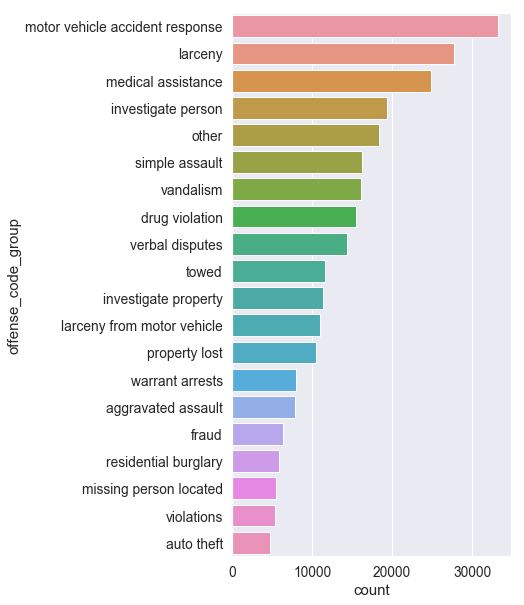

In [91]:
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(5, 10))
sns.countplot(y='offense_code_group', data=crime_zip, order=crime_zip['offense_code_group'].value_counts().iloc[:20].index)

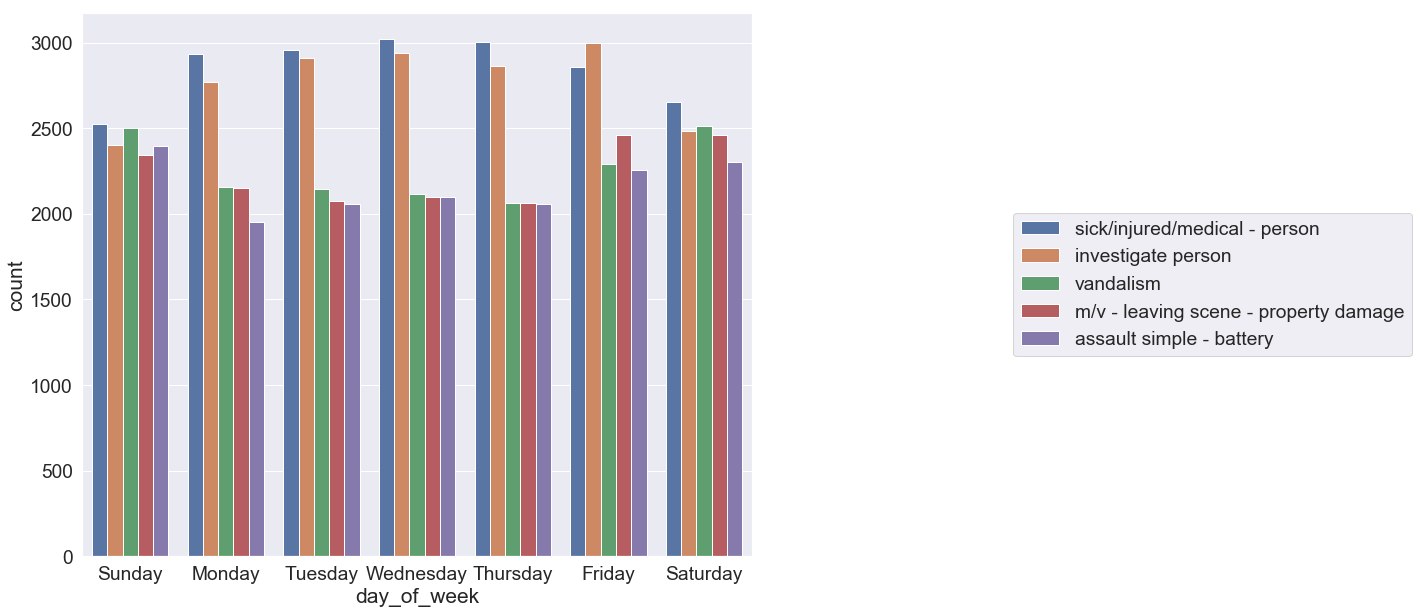

In [92]:
# These are the top 5 offense_descriptions based on the day according to the data.

sns.set(font_scale=1.75)
f, ax = plt.subplots(figsize=(12, 10))
sns.countplot(x='day_of_week', hue = 'offense_description', order = order, data=crime_zip, 
              hue_order=crime_zip.offense_description.value_counts().iloc[:5].index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(2, 0.5))

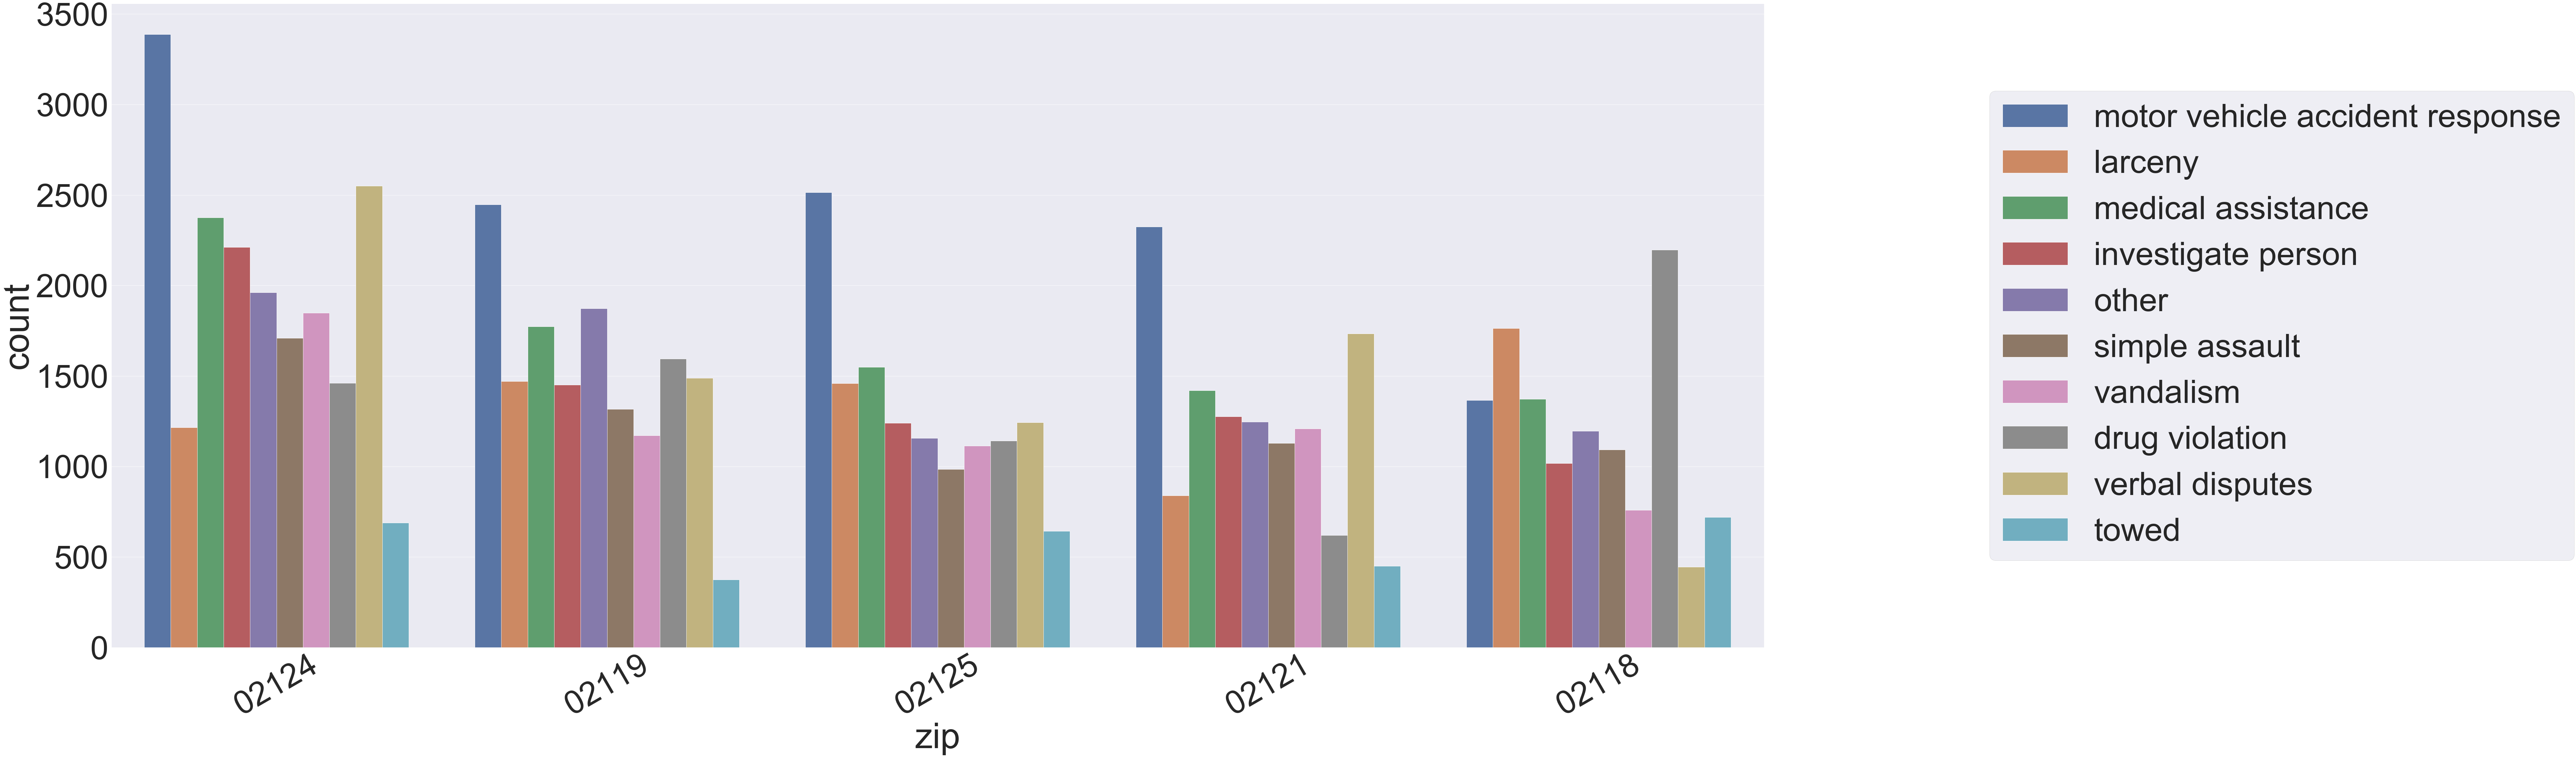

In [93]:
# These are the top 10 offense_descriptions based on the top 5 mentioned zipcode according to the data.
sns.set_context(context='paper', font_scale=10)
sns.set(font_scale=10)
f, ax = plt.subplots(figsize=(100,40))
plt.xticks(rotation=30)
g = sns.countplot(x='zip', hue = 'offense_code_group', data=crime_zip, 
              order=crime_zip['zip'].value_counts().iloc[:5].index,
              hue_order=crime_zip.offense_code_group.value_counts().iloc[:10].index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.5, 0.5))
#plt.savefig('top 10 offenses in top 5 zips.png')


In [94]:
cd "/Users/matthewdavis/Google Drive/Graduate School/MIST 6150/Project/Matt's Deliverables"

/Users/matthewdavis/Google Drive/Graduate School/MIST 6150/Project/Matt's Deliverables


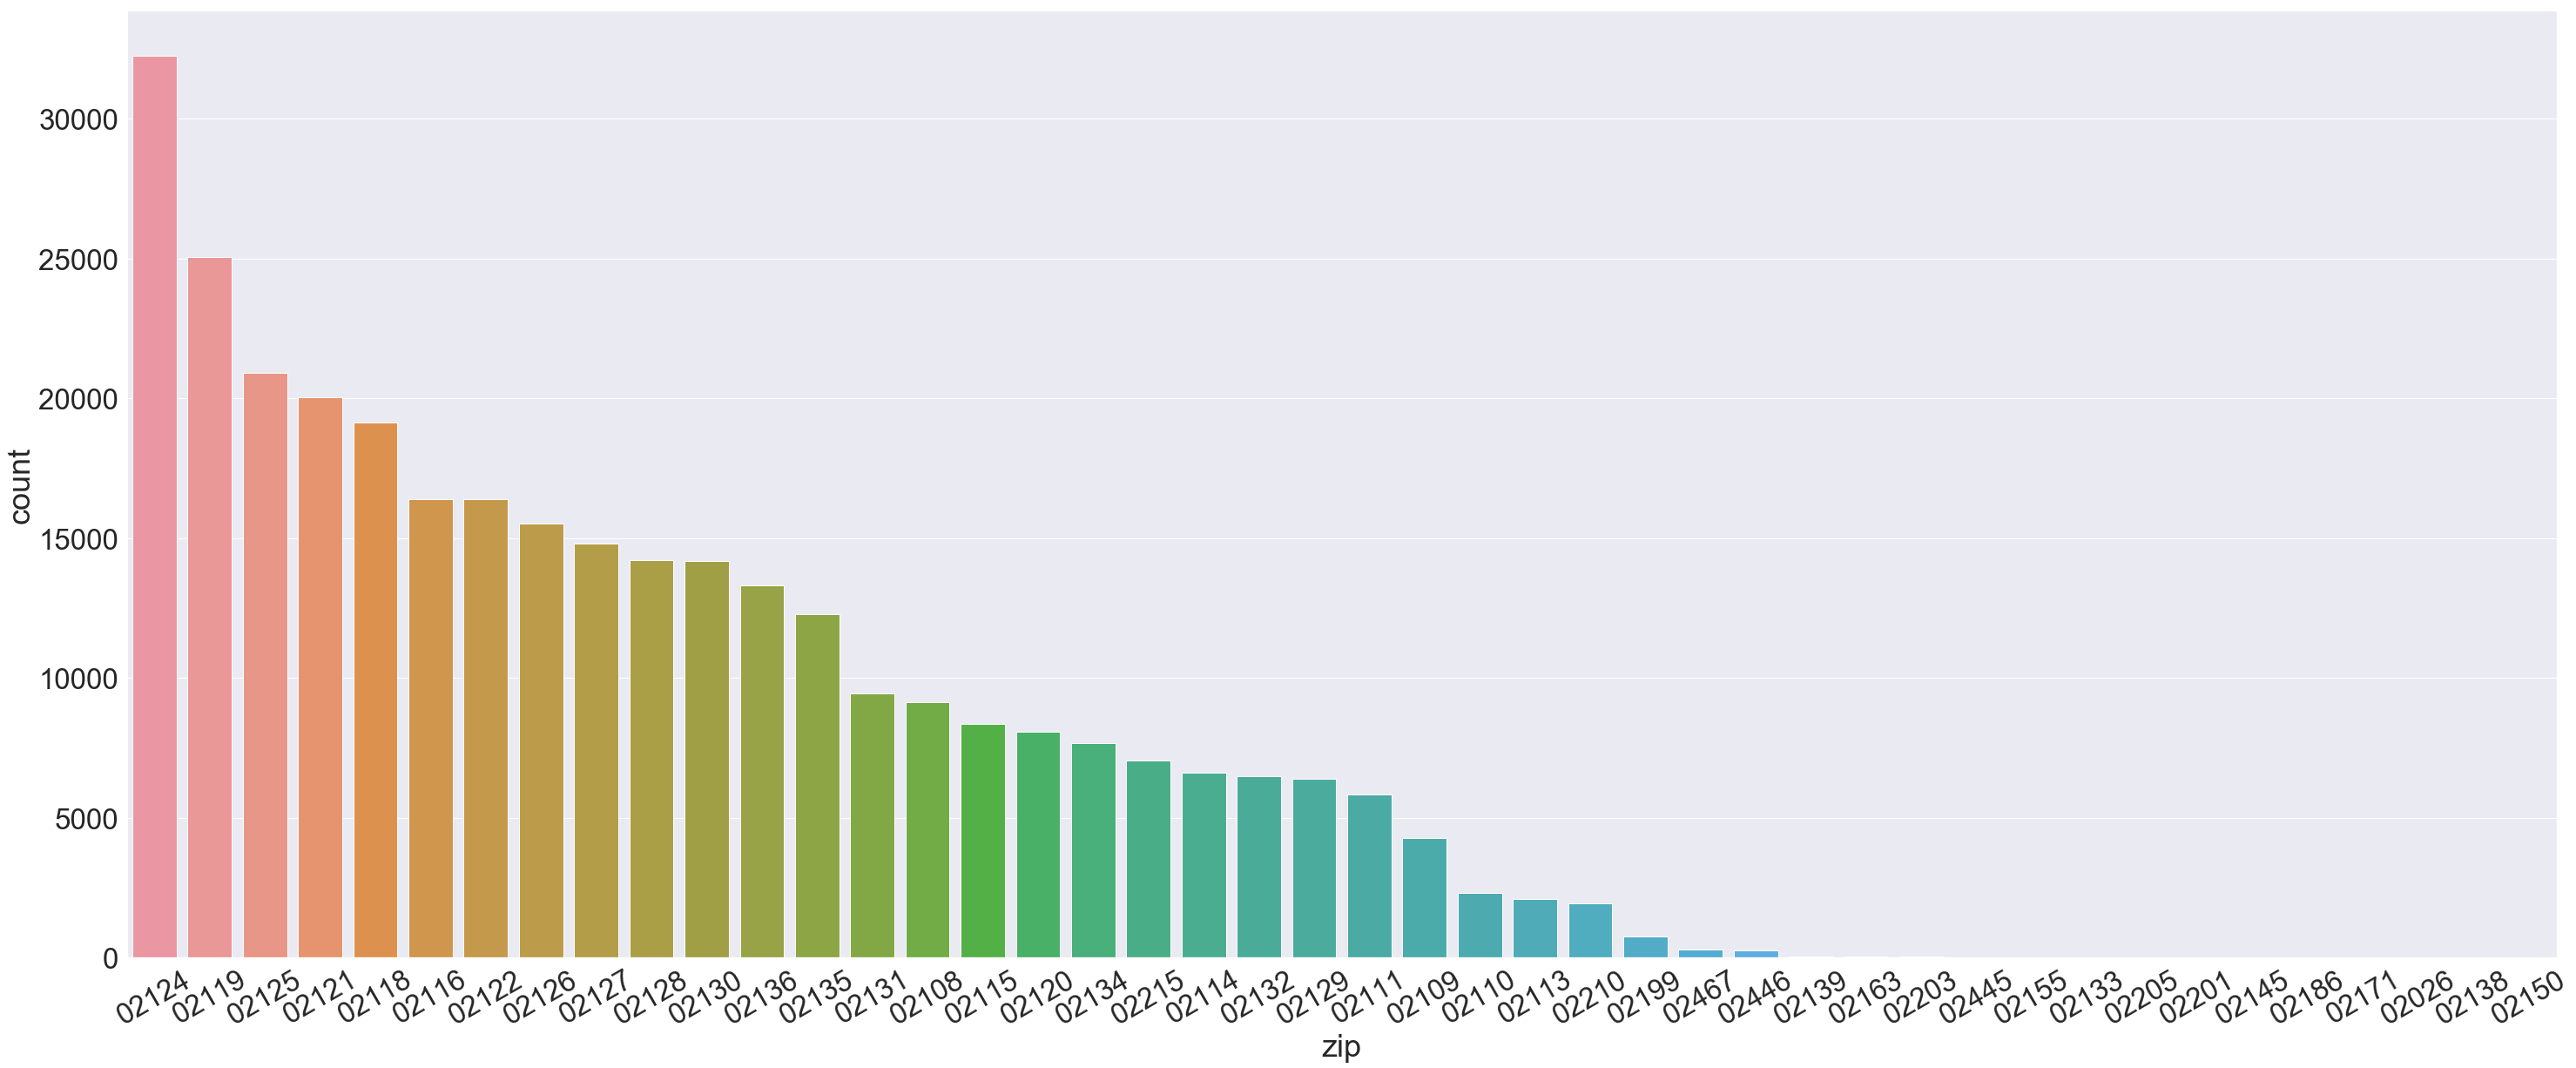

In [95]:
# These are all of the zip code mentions in the data set.  Clearly there is a big difference between some of these area codes.
sns.set_context(context='paper', font_scale=5)
sns.set(font_scale=3)
f, ax = plt.subplots(figsize=(50, 20))
plt.xticks(rotation=30)
sns.countplot(x='zip', data=crime_zip, 
              order=crime_zip['zip'].value_counts().index)

In [96]:
# This is the number of occurences within the zipcodes.  As you can see, the top 20 are significantly higher!

g = crime_zip.groupby(["zip"], as_index=True).size().reset_index(name='count')
#f.sort_values(by=["neighborhood"], ascending=True).reset_index(inplace=True)
g.set_index('zip').sort_values(by='count', ascending=False).head(20)

count
zip         
02124  32244
02119  25051
02125  20907
02121  20037
02118  19145
02116  16387
02122  16385
02126  15532
02127  14800
02128  14218
02130  14194
02136  13312
02135  12297
02131   9455
02108   9127
02115   8357
02120   8090
02134   7665
02215   7047
02114   6625

In [97]:
# For futher investigation as a csv:

# crime_zip.to_csv('final_crime_zipcode.csv')

# Now, back to the ucr_part data.
It is important to note that UCR 
 - Like I said before, I would like to find out more about the UCR_Part values.

In [98]:
crime_zip.head()

offense_code_group              offense_description district  \
0  motor vehicle accident response  m/v accident - property  damage       E5   
1                            towed              towed motor vehicle       E5   
2  motor vehicle accident response   m/v accident - personal injury       E5   
3                    property lost                  property - lost       E5   
4               investigate person               investigate person       E5   

        occurred_on_date  year    month day_of_week  hour    ucr_part  \
0   10/1/2018 7:00:00 AM  2018  october      Monday     7  Part Three   
1   10/8/2018 7:19:00 AM  2018  october      Monday     7  Part Three   
2  10/29/2018 8:18:00 AM  2018  october      Monday     8  Part Three   
3  10/15/2018 8:20:00 AM  2018  october      Monday     8  Part Three   
4  10/29/2018 9:37:00 AM  2018  october      Monday     9  Part Three   

          street        lat       long                     location    zip  
0  WASHINGTON ST  42.295719 -71.118273  (42.29571922, -71.11827307)  02131  
1  WASHINGTON ST  42.290934 -71.123322  (42.29093382, -71.12332234)  02131  
2     ANAWAN AVE  42.284019 -71.148824  (42.28401912, -71.14882434)  02132  
3   HIGHCREST RD  42.275159 -71.137672  (42.27515909, -71.13767216)  02131  
4    FAWNDALE RD  42.290118 -71.121879  (42.29011783, -71.12187904)  02131

In [99]:
# It appears that Part One's account for roughly 19.8% of the dataset.  

print(crime_zip.ucr_part.value_counts(normalize=False))
print(crime_zip.ucr_part.value_counts(normalize=True).mul(100))

Part Three    159918
Part Two       98358
Part One       63555
Name: ucr_part, dtype: int64
Part Three    49.690055
Part Two      30.562003
Part One      19.747942
Name: ucr_part, dtype: float64


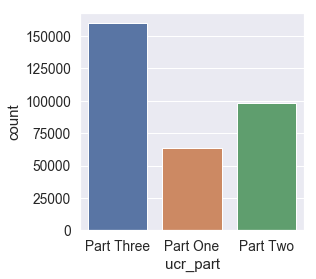

In [100]:
sns.set_context(context='paper', font_scale=10)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(4, 4))
sns.countplot(x='ucr_part', data=crime_zip)
#plt.savefig('ucr_part proportion.png')

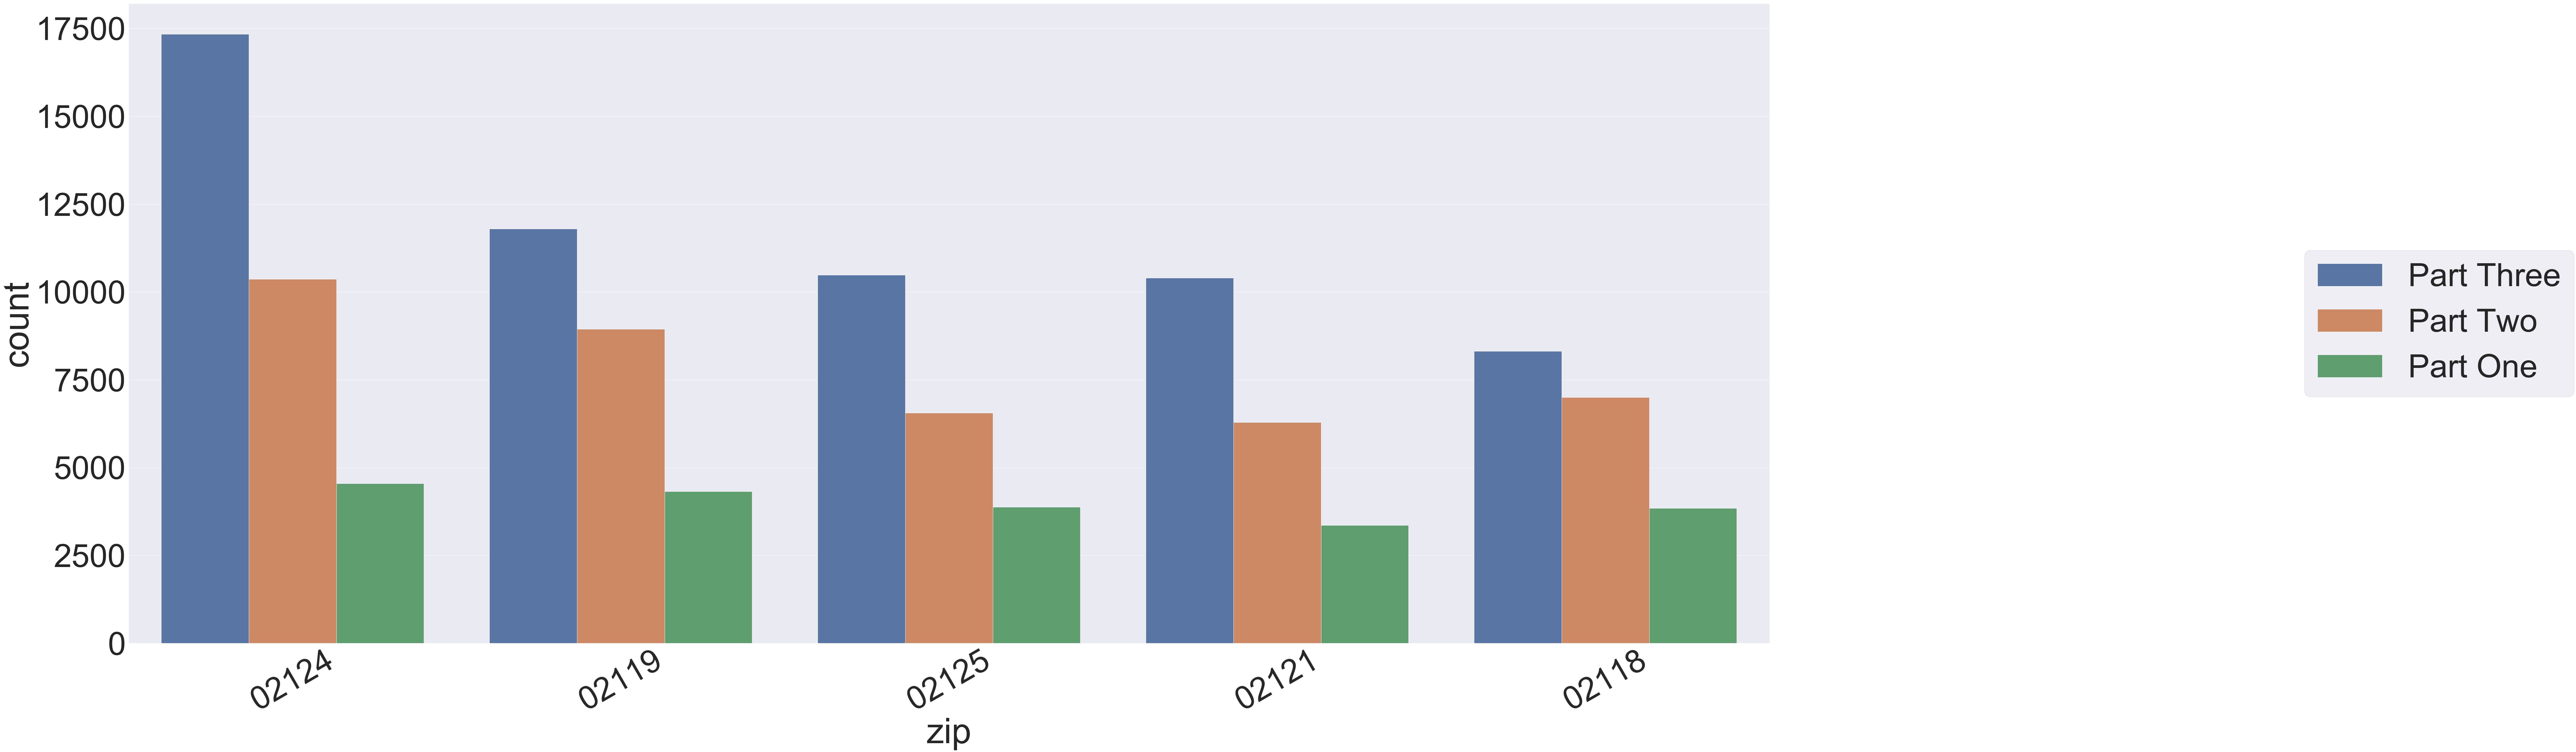

In [101]:
# Here's a plot of the UCR_Part based on the top zipcodes for crimes.

sns.set_context(context='paper', font_scale=10)
sns.set(font_scale=10)
f, ax = plt.subplots(figsize=(100,40))
plt.xticks(rotation=30)
sns.countplot(x='zip', hue = 'ucr_part', data=crime_zip, 
              order=crime_zip['zip'].value_counts().iloc[:5].index,
              hue_order=crime_zip.ucr_part.value_counts().index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.5, 0.5))

## **Selecting only the rows of importance**  
_The reason for this is_:
>- To further shorten the dataset
- To identify the leading issues with the dataset

In [102]:
crime_ziptest = crime_zip.copy(deep=True)
crime_ziptest['ucr_part'] = crime_ziptest['ucr_part'].astype('category')
mask1 = crime_ziptest['ucr_part'] == 'Part One'
crime_ucr_1 = crime_ziptest[mask1]
crime_ucr_1.reset_index(inplace=True, drop=True)

mask2 = crime_ucr_1['year'] != 2019
crime_ucr_1 = crime_ucr_1[mask2]
crime_ucr_1.reset_index(inplace=True, drop=True)

mask3 = crime_ucr_1['year'] != 2015
crime_ucr_1 = crime_ucr_1[mask3]
crime_ucr_1.reset_index(inplace=True, drop=True)

crime_ucr_1.head()

offense_code_group                    offense_description district  \
0                     larceny                    larceny shoplifting       A1   
1          aggravated assault                   assault - aggravated       A1   
2  larceny from motor vehicle  larceny theft from mv - non-accessory       A1   
3                     larceny                    larceny shoplifting       A1   
4                     larceny                    larceny shoplifting       A1   

        occurred_on_date  year  month day_of_week  hour  ucr_part  \
0   3/11/2016 1:00:00 PM  2016  march      Friday    13  Part One   
1  4/29/2016 12:54:00 AM  2016  april      Friday     0  Part One   
2   4/8/2016 12:00:00 AM  2016  april      Friday     0  Part One   
3  4/29/2016 10:15:00 AM  2016  april      Friday    10  Part One   
4  4/29/2016 10:50:00 AM  2016  april      Friday    10  Part One   

          street        lat       long                     location    zip  
0     CHARLES ST  42.359132 -71.070743  (42.35913227, -71.07074326)  02114  
1        PINE ST  42.347744 -71.063834  (42.34774387, -71.06383389)  02111  
2      PRINCE ST  42.366086 -71.056964  (42.36608625, -71.05696428)  02113  
3      BORDER ST  42.376203 -71.039799  (42.37620267, -71.03979926)  02128  
4  WASHINGTON ST  42.355123 -71.060880  (42.35512339, -71.06087980)  02108

In [103]:
crime_ucr_1.shape

(50034, 14)

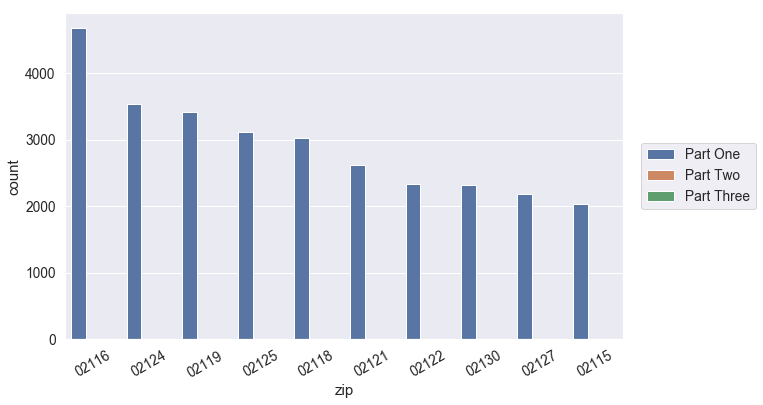

In [104]:
# Here's a plot of the UCR_Part based on the top zipcodes for crimes.

sns.set_context(context='paper', font_scale=1.25)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10, 6))
plt.xticks(rotation=30)
sns.countplot(x='zip', hue = 'ucr_part', data=crime_ucr_1, 
              order=crime_ucr_1['zip'].value_counts().iloc[:10].index,
              hue_order=crime_ucr_1.ucr_part.value_counts().index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.25, 0.5))

In [105]:
crime_ucr_1.district.nunique()

12

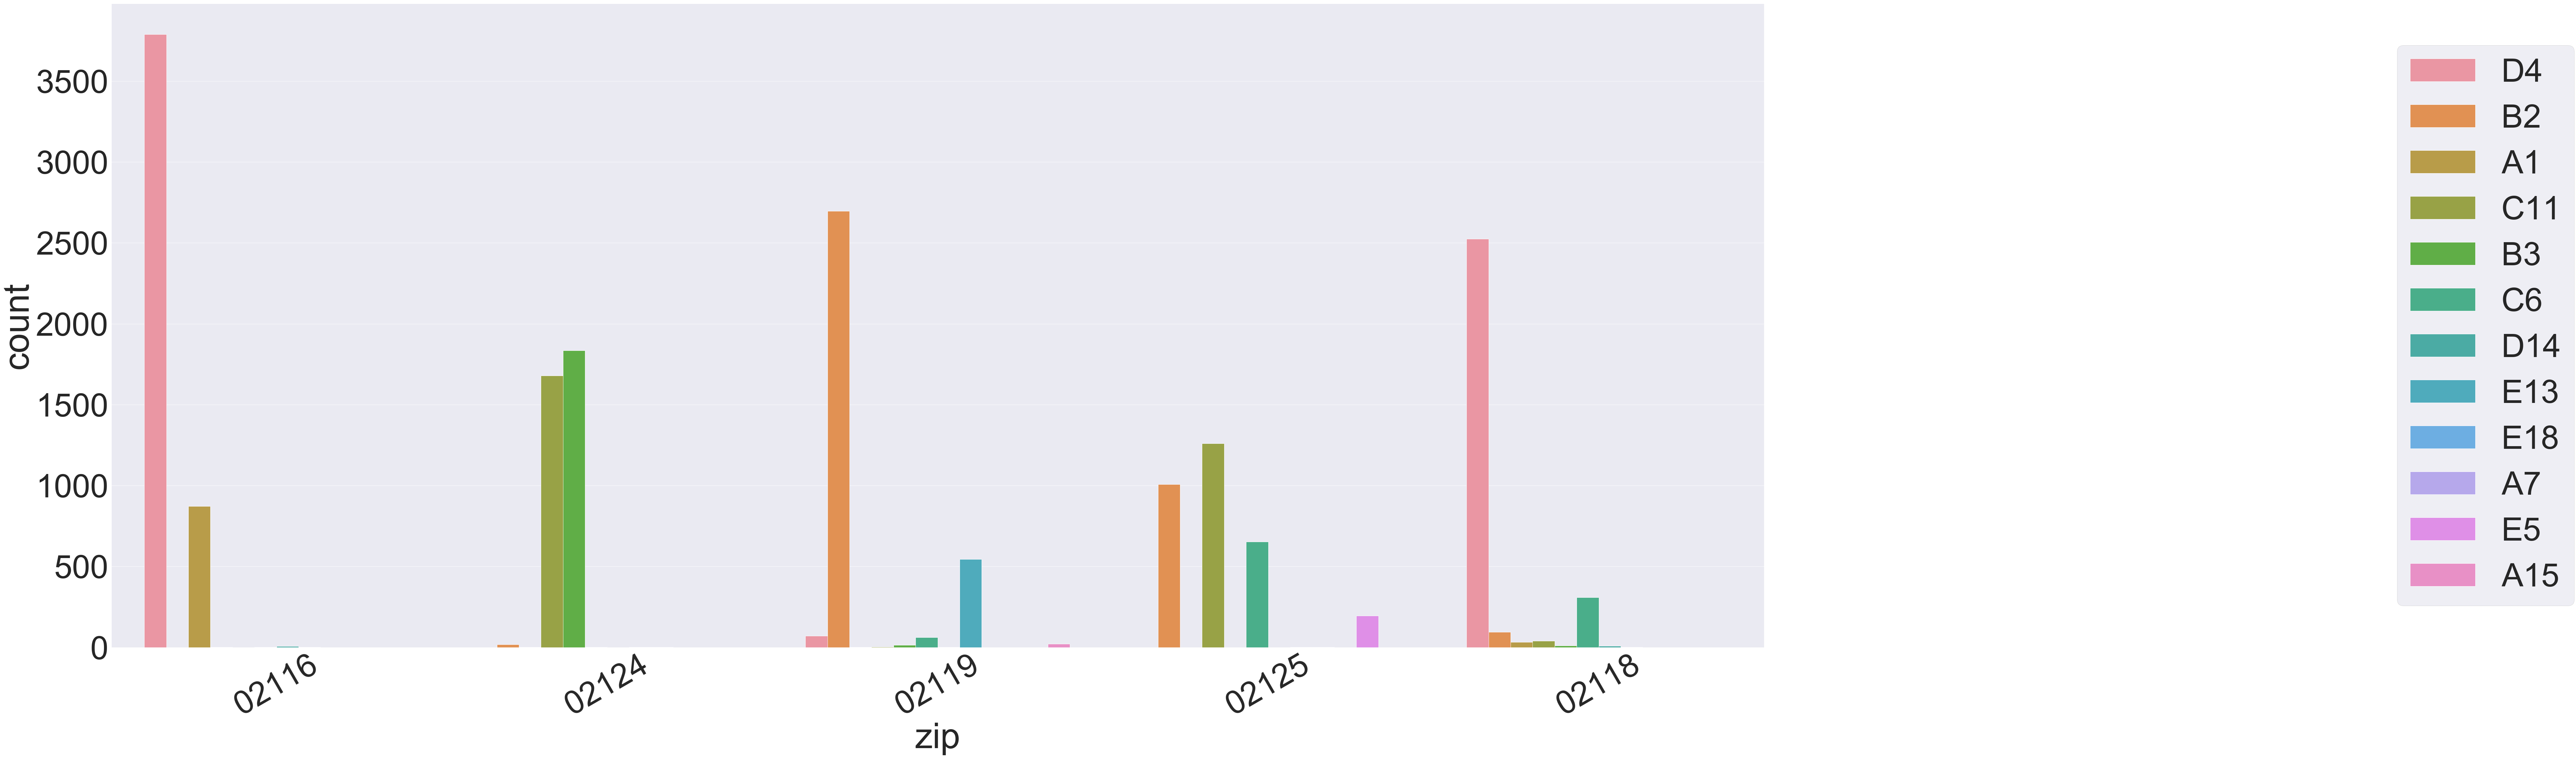

In [106]:
# Here's a plot of the UCR_Part based on the top zipcodes for crimes.

sns.set_context(context='paper', font_scale=10)
sns.set(font_scale=10)
f, ax = plt.subplots(figsize=(100,40))
plt.xticks(rotation=30)
sns.countplot(x='zip', hue = 'district', data=crime_ucr_1, 
              order=crime_ucr_1['zip'].value_counts().iloc[:5].index,
              hue_order=crime_ucr_1.district.value_counts().index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.5, 0.5))

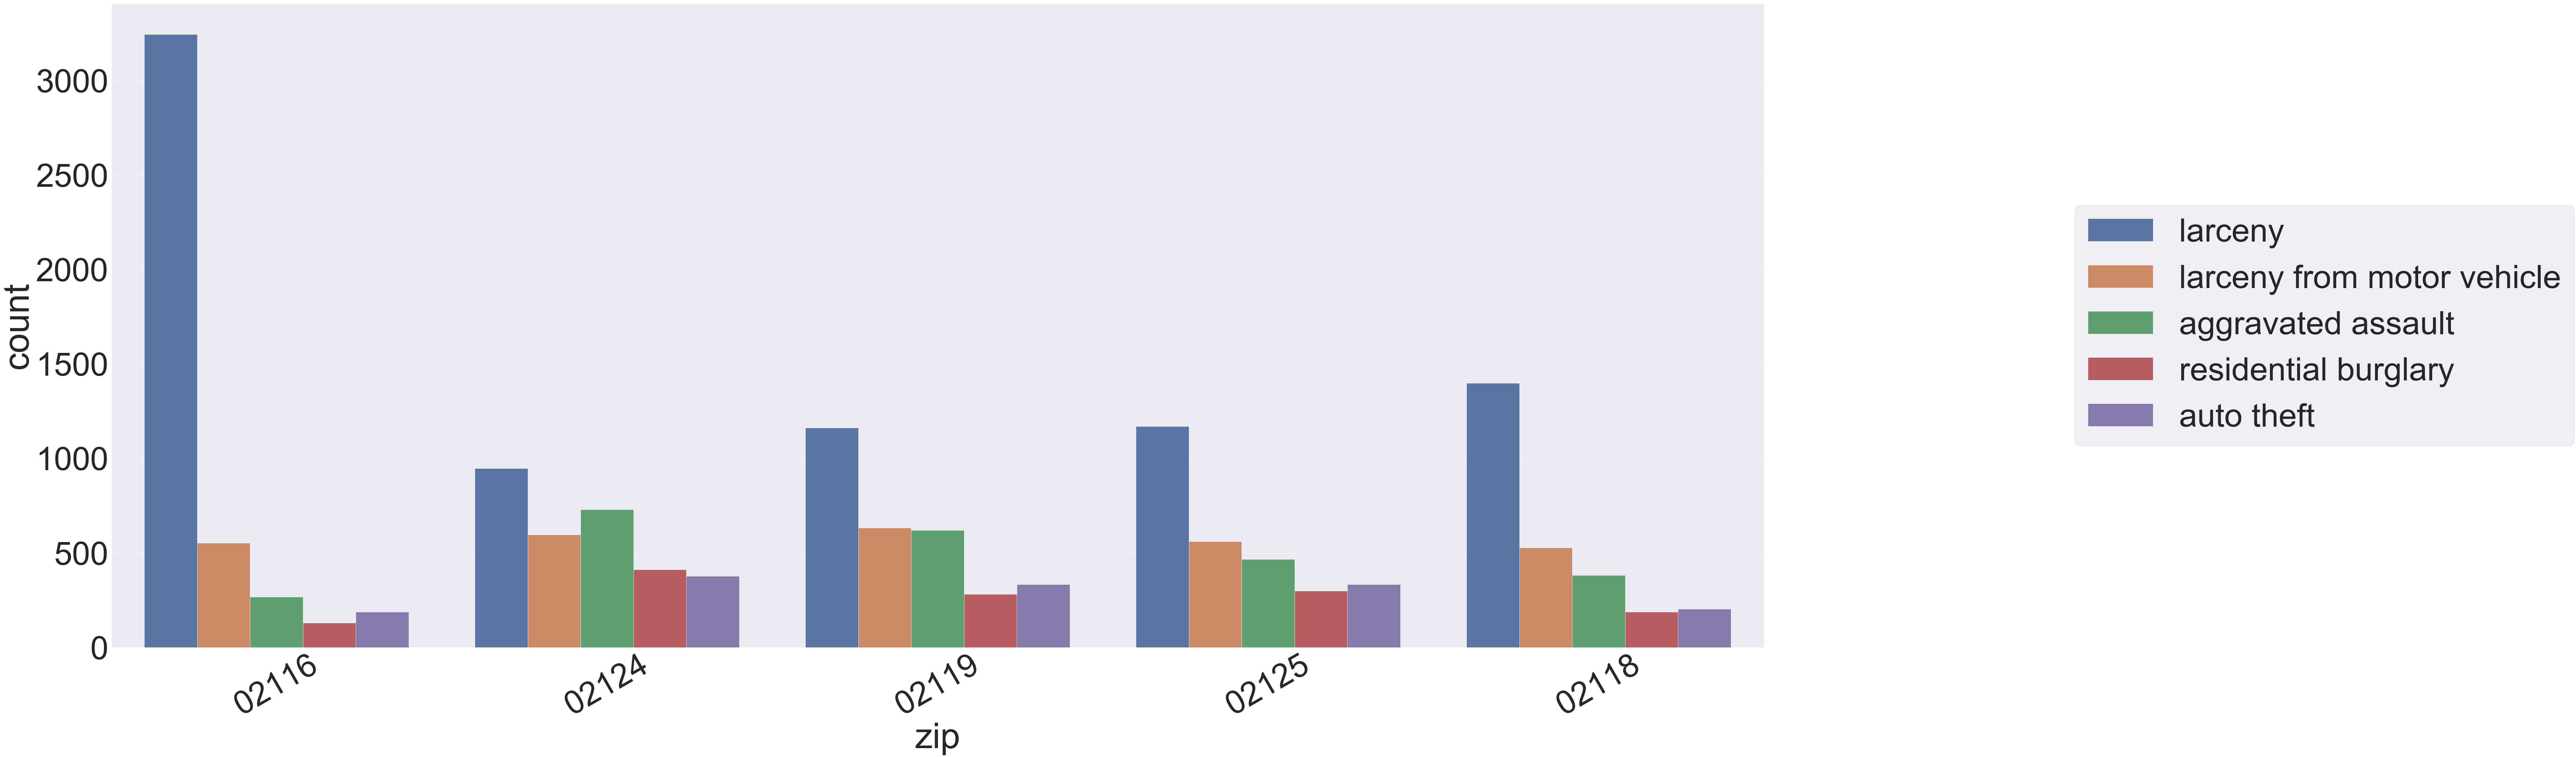

In [107]:
# These are the top 10 offense_descriptions based on the top 5 mentioned zipcode according to the data.
sns.set_context(context='paper', font_scale=10)
sns.set(font_scale=10)
f, ax = plt.subplots(figsize=(100,40))
plt.xticks(rotation=30)
sns.countplot(x='zip', hue = 'offense_code_group', data=crime_ucr_1, 
              order=crime_ucr_1['zip'].value_counts().iloc[:5].index,
              hue_order=crime_ucr_1.offense_code_group.value_counts().iloc[:5].index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.5, 0.5))
plt.savefig('ucr1 top 5 zip.png')

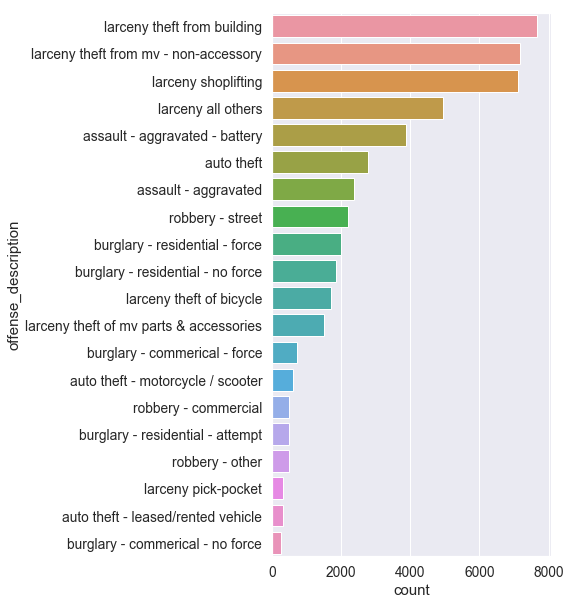

In [108]:
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(5, 10))
sns.countplot(y='offense_description', data=crime_ucr_1, order=crime_ucr_1['offense_description'].value_counts().iloc[:20].index)

            lat       long                    location  count
7478  42.348624 -71.082776  (42.34862382 -71.08277637)    808
7813  42.350959 -71.074128  (42.35095909 -71.07412780)    309
7398  42.347972 -71.078496  (42.34797240 -71.07849582)    309
8307  42.355123 -71.060880  (42.35512339 -71.06087980)    276
7451  42.348406 -71.086883  (42.34840576 -71.08688339)    274
         lat       long                    location  count
0  42.232656 -71.130700  (42.23265556 -71.13069992)      1
1  42.232870 -71.130050  (42.23287025 -71.13004959)      1
2  42.233157 -71.132654  (42.23315741 -71.13265354)      1
3  42.233342 -71.133688  (42.23334151 -71.13368781)      1
4  42.233470 -71.138630  (42.23346994 -71.13862962)      1


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


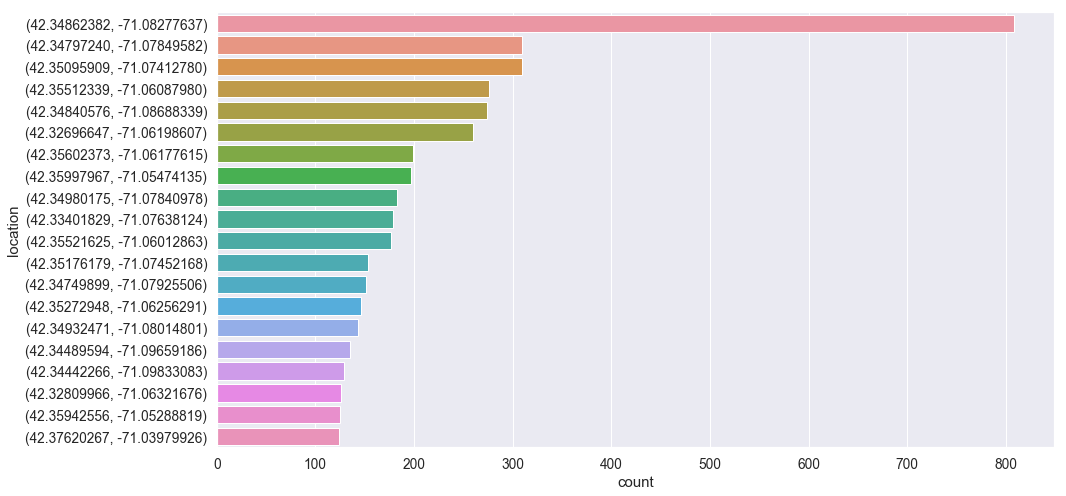

In [109]:
# Here is the plot of the dataset using `Folium`

#```python

# These are the top 20 'coordinates' according to the data.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15,8))
sns.countplot(y='location', data=crime_ucr_1, order=crime_ucr_1.location.value_counts().iloc[:20].index)



# Here, I'm making a Dataframe of the locations and the count.  What you see below
# is the top 5 locations. 
# I want to use this for my folium map.

df1 = crime_ucr_1.groupby(["lat", "long", "location"]).size().reset_index(name='count')
df1['location'] = df1['location'].str.replace(',', '')

# Sort the count from highest count with location to lowest.
print(df1.sort_values(by = 'count', ascending=False).head())

# The DataFrame not sorted.
print(df1.head())

# convert to (n, 2) nd-array format for heatmap

locationArr = df1[['lat', 'long']].as_matrix()

m = folium.Map(location=[42.32, -71.0589], zoom_start=12)
m.add_child(plugins.HeatMap(locationArr, radius=9))
m
#```

# Here I want to investigate Part Two crimes as they are less severe but are approximately 30% of the dataset

In [110]:
mask = crime_ziptest['ucr_part'] == 'Part Two'
crime_ucr_2 = crime_ziptest[mask]

mask2 = crime_ucr_2['year'] != 2019
crime_ucr_2 = crime_ucr_2[mask2]
crime_ucr_2.reset_index(inplace=True, drop=True)

mask3 = crime_ucr_2['year'] != 2015
crime_ucr_2 = crime_ucr_2[mask3]
crime_ucr_2.reset_index(inplace=True, drop=True)

crime_ucr_2.head()

offense_code_group                             offense_description district  \
0          atm fraud                 fraud - credit card / atm fraud      C11   
1         harassment                                      harassment      E18   
2     drug violation  drugs - poss class d - intent to mfr dist disp       A7   
3     drug violation                                   drugs - other       B3   
4     simple assault                        assault simple - battery       D4   

       occurred_on_date  year month day_of_week  hour  ucr_part  \
0  6/11/2018 5:00:00 PM  2018  june      Monday    17  Part Two   
1   6/4/2018 9:00:00 AM  2018  june      Monday     9  Part Two   
2  6/11/2018 7:03:00 PM  2018  june      Monday    19  Part Two   
3  6/11/2018 7:23:00 PM  2018  june      Monday    19  Part Two   
4  6/11/2018 6:30:00 PM  2018  june      Monday    18  Part Two   

           street        lat       long                     location    zip  
0  DORCHESTER AVE  42.310910 -71.057674  (42.31091044, -71.05767414)  02125  
1        MARCY RD  42.267147 -71.096311  (42.26714691, -71.09631094)  02126  
2      CHELSEA ST  42.383916 -71.022662  (42.38391569, -71.02266216)  02128  
3   WASHINGTON ST  42.328663 -71.085634  (42.32866284, -71.08563401)  02119  
4  MARLBOROUGH ST  42.354336 -71.073238  (42.35433643, -71.07323767)  02116

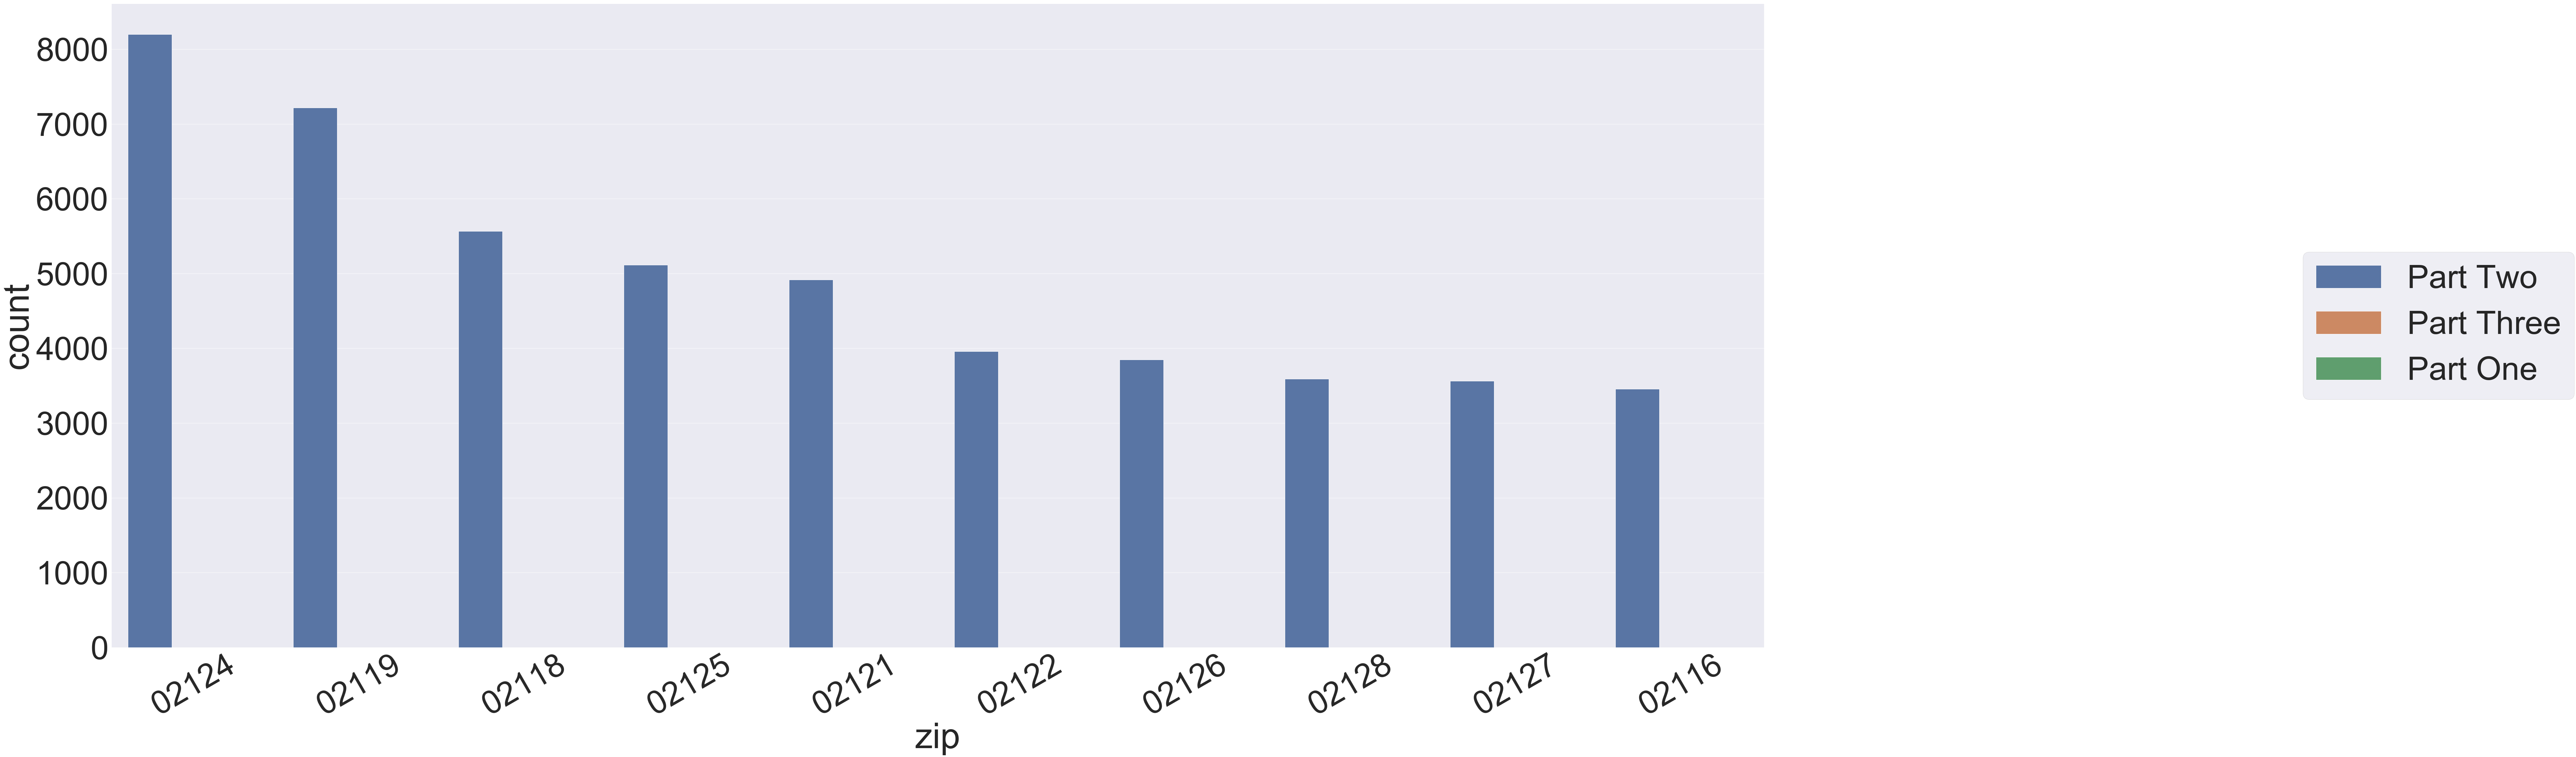

In [111]:
# Here's a plot of the UCR_Part based on the top zipcodes for crimes.

sns.set_context(context='paper', font_scale=10)
sns.set(font_scale=10)
f, ax = plt.subplots(figsize=(100,40))
plt.xticks(rotation=30)
sns.countplot(x='zip', hue = 'ucr_part', data=crime_ucr_2, 
              order=crime_ucr_2['zip'].value_counts().iloc[:10].index,
              #facecolor=(0, 0, 0, 0), linewidth=10, edgecolor=sns.color_palette("dark", 3),
              hue_order=crime_ucr_2.ucr_part.value_counts().index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.5, 0.5))

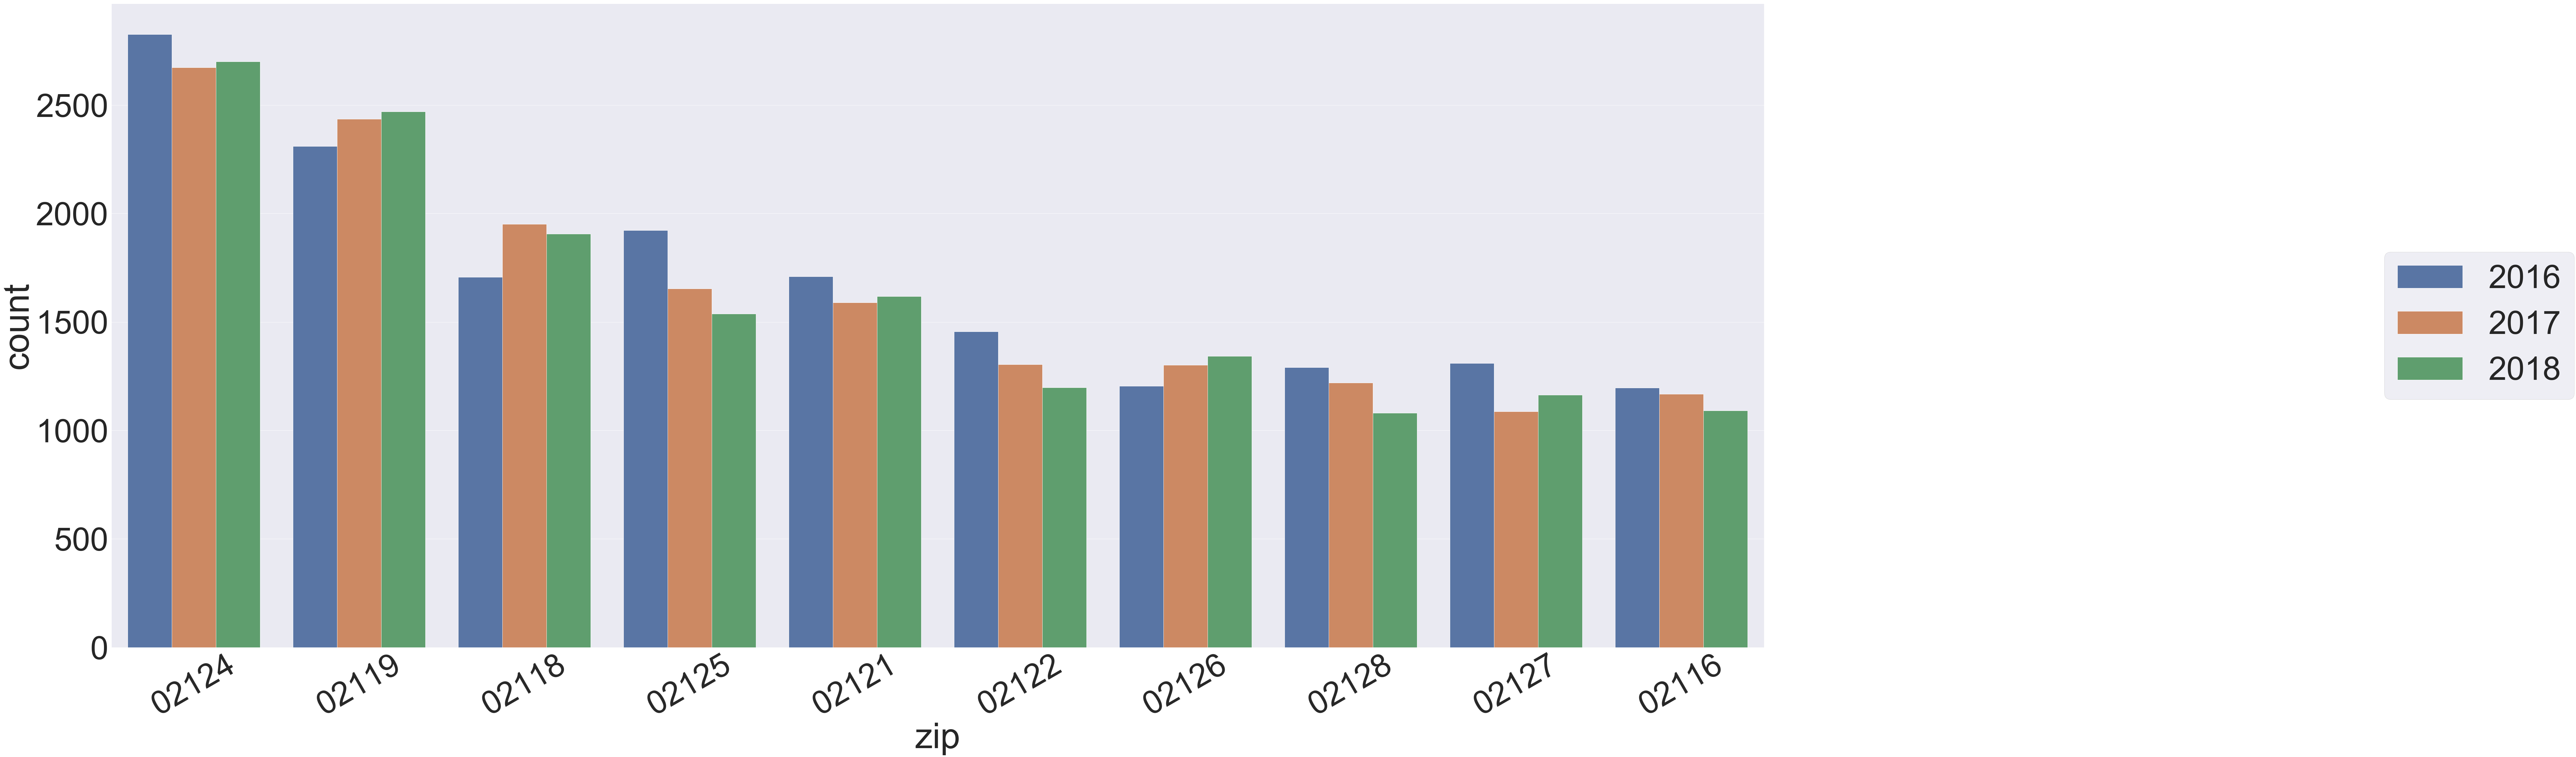

In [112]:
# Here's a plot of the UCR_Part based on the top zipcodes for crimes.

sns.set_context(context='paper', font_scale=10)
sns.set(font_scale=10)
f, ax = plt.subplots(figsize=(100,40))
plt.xticks(rotation=30)
sns.countplot(x='zip', hue = 'year', data=crime_ucr_2, 
              order=crime_ucr_2['zip'].value_counts().iloc[:10].index,
              #facecolor=(0, 0, 0, 0), linewidth=10, edgecolor=sns.color_palette("dark", 3),
              hue_order=crime_ucr_2.year.value_counts().index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.5, 0.5))

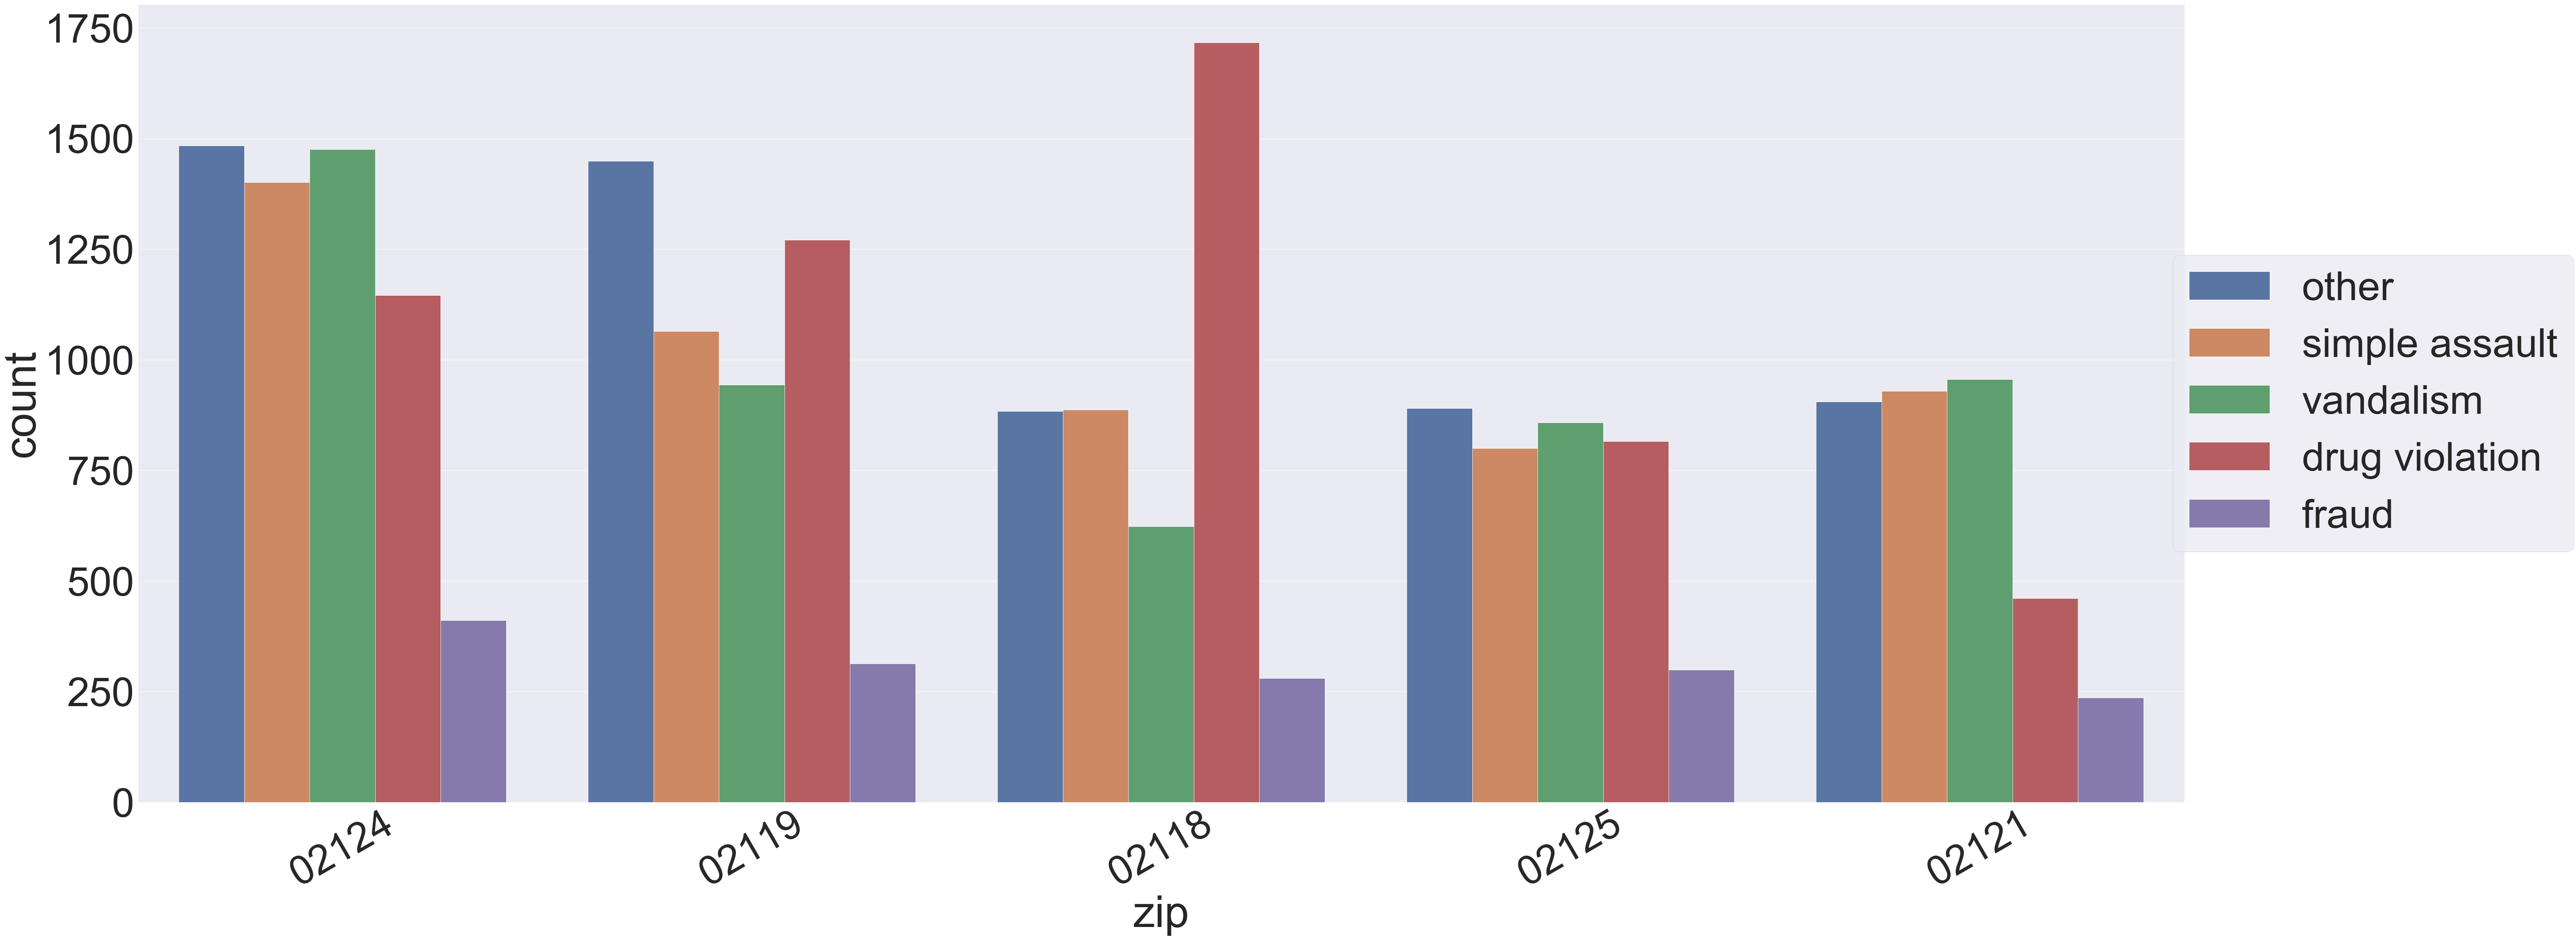

In [113]:
# These are the top 10 offense_descriptions based on the top 5 mentioned zipcode according to the data.
sns.set_context(context='paper', font_scale=10)
sns.set(font_scale=10)
f, ax = plt.subplots(figsize=(100,40))
plt.xticks(rotation=30)
sns.countplot(x='zip', hue = 'offense_code_group', data=crime_ucr_2, 
              order=crime_ucr_2['zip'].value_counts().iloc[:5].index,
              hue_order=crime_ucr_2.offense_code_group.value_counts().iloc[:5].index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.2, 0.5))
plt.savefig('ucr2 top 5 zip.png')

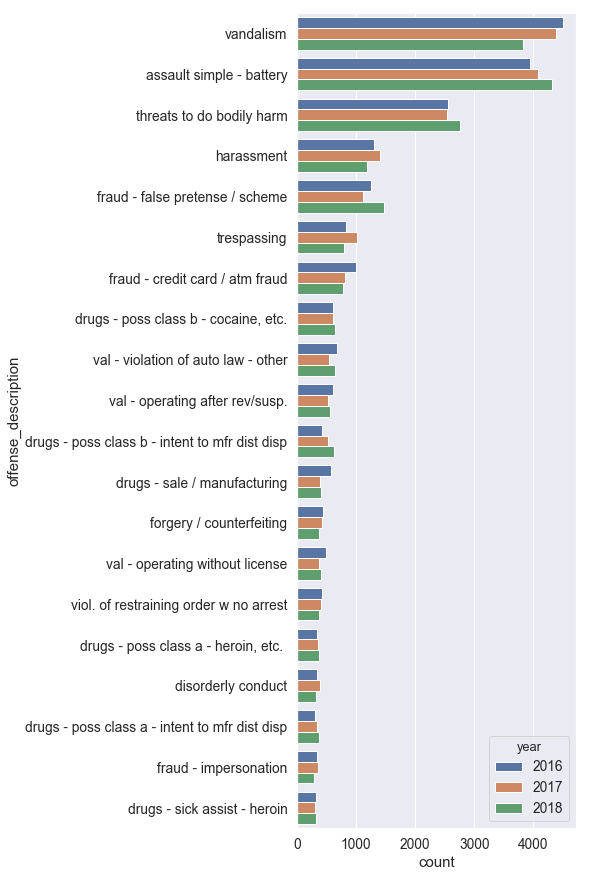

In [114]:
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(5, 15))
sns.countplot(y='offense_description', hue='year', data=crime_ucr_2, order=crime_ucr_2['offense_description'].value_counts().iloc[:20].index)

             lat       long                    location  count
2159   42.284826 -71.091374  (42.28482577 -71.09137369)    519
7420   42.335119 -71.074917  (42.33511904 -71.07491710)    431
6574   42.328663 -71.085634  (42.32866284 -71.08563401)    414
10380  42.361839 -71.059765  (42.36183857 -71.05976489)    376
6941   42.331521 -71.070853  (42.33152148 -71.07085307)    364
         lat       long                    location  count
0  42.232413 -71.129715  (42.23241330 -71.12971531)      2
1  42.232656 -71.130700  (42.23265556 -71.13069992)      1
2  42.232870 -71.130050  (42.23287025 -71.13004959)      1
3  42.232907 -71.131671  (42.23290729 -71.13167059)      2
4  42.233086 -71.128157  (42.23308580 -71.12815697)      5


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


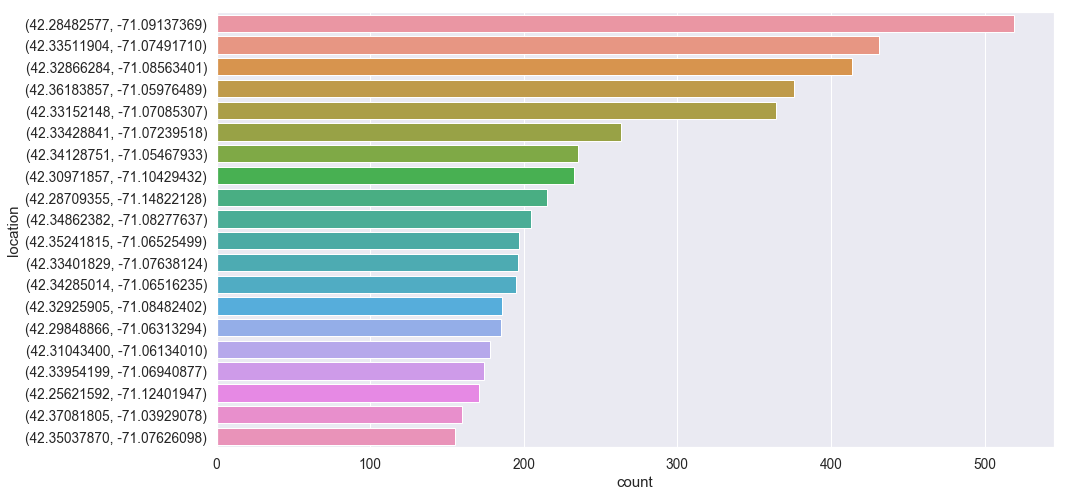

In [115]:
# Here is the plot of the dataset using `Folium`

#```python

# These are the top 20 'coordinates' according to the data.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15,8))
sns.countplot(y='location', data=crime_ucr_2, order=crime_ucr_2.location.value_counts().iloc[:20].index)



# Here, I'm making a Dataframe of the locations and the count.  What you see below
# is the top 5 locations. 
# I want to use this for my folium map.

df1 = crime_ucr_2.groupby(["lat", "long", "location"]).size().reset_index(name='count')
df1['location'] = df1['location'].str.replace(',', '')

# Sort the count from highest count with location to lowest.
print(df1.sort_values(by = 'count', ascending=False).head())

# The DataFrame not sorted.
print(df1.head())

# convert to (n, 2) nd-array format for heatmap

locationArr = df1[['lat', 'long']].as_matrix()

m = folium.Map(location=[42.32, -71.0589], zoom_start=12)
m.add_child(plugins.HeatMap(locationArr, radius=9))
m
#```

### I noticed that Drug violations were big in 02118.  I would like to learn more about that subset of data.

In [116]:
mask = crime_ucr_2['offense_code_group'] == 'drug violation'
drugs = crime_ucr_2[mask]
drugs.head()

offense_code_group                             offense_description district  \
2     drug violation  drugs - poss class d - intent to mfr dist disp       A7   
3     drug violation                                   drugs - other       B3   
7     drug violation            drugs - poss class b - cocaine, etc.      E18   
8     drug violation                    drugs - sale / manufacturing      E18   
9     drug violation  drugs - poss class b - intent to mfr dist disp      E18   

       occurred_on_date  year month day_of_week  hour  ucr_part  \
2  6/11/2018 7:03:00 PM  2018  june      Monday    19  Part Two   
3  6/11/2018 7:23:00 PM  2018  june      Monday    19  Part Two   
7  6/11/2018 6:54:00 PM  2018  june      Monday    18  Part Two   
8  6/11/2018 6:54:00 PM  2018  june      Monday    18  Part Two   
9  6/11/2018 6:54:00 PM  2018  june      Monday    18  Part Two   

          street        lat       long                     location    zip  
2     CHELSEA ST  42.383916 -71.022662  (42.38391569, -71.02266216)  02128  
3  WASHINGTON ST  42.328663 -71.085634  (42.32866284, -71.08563401)  02119  
7     WOLCOTT CT  42.237963 -71.131547  (42.23796336, -71.13154728)  02136  
8     WOLCOTT CT  42.237963 -71.131547  (42.23796336, -71.13154728)  02136  
9     WOLCOTT CT  42.237963 -71.131547  (42.23796336, -71.13154728)  02136

In [117]:
drugs['district'].nunique()

12

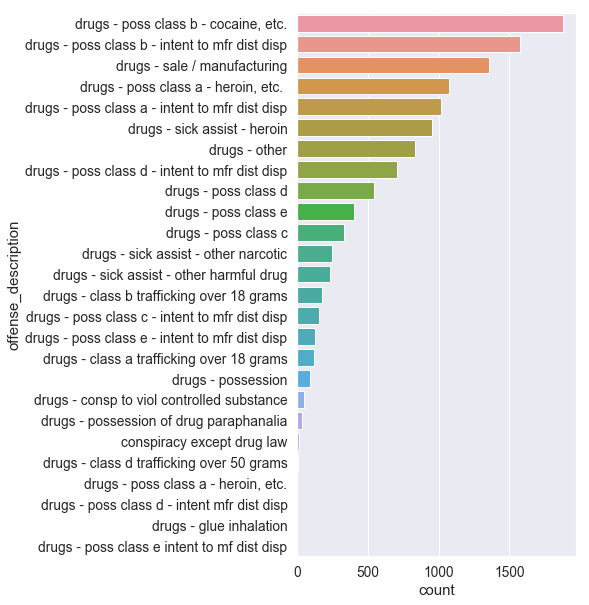

In [118]:
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(5, 10))
sns.countplot(y='offense_description', data=drugs, order=drugs['offense_description'].value_counts().iloc[:27].index)

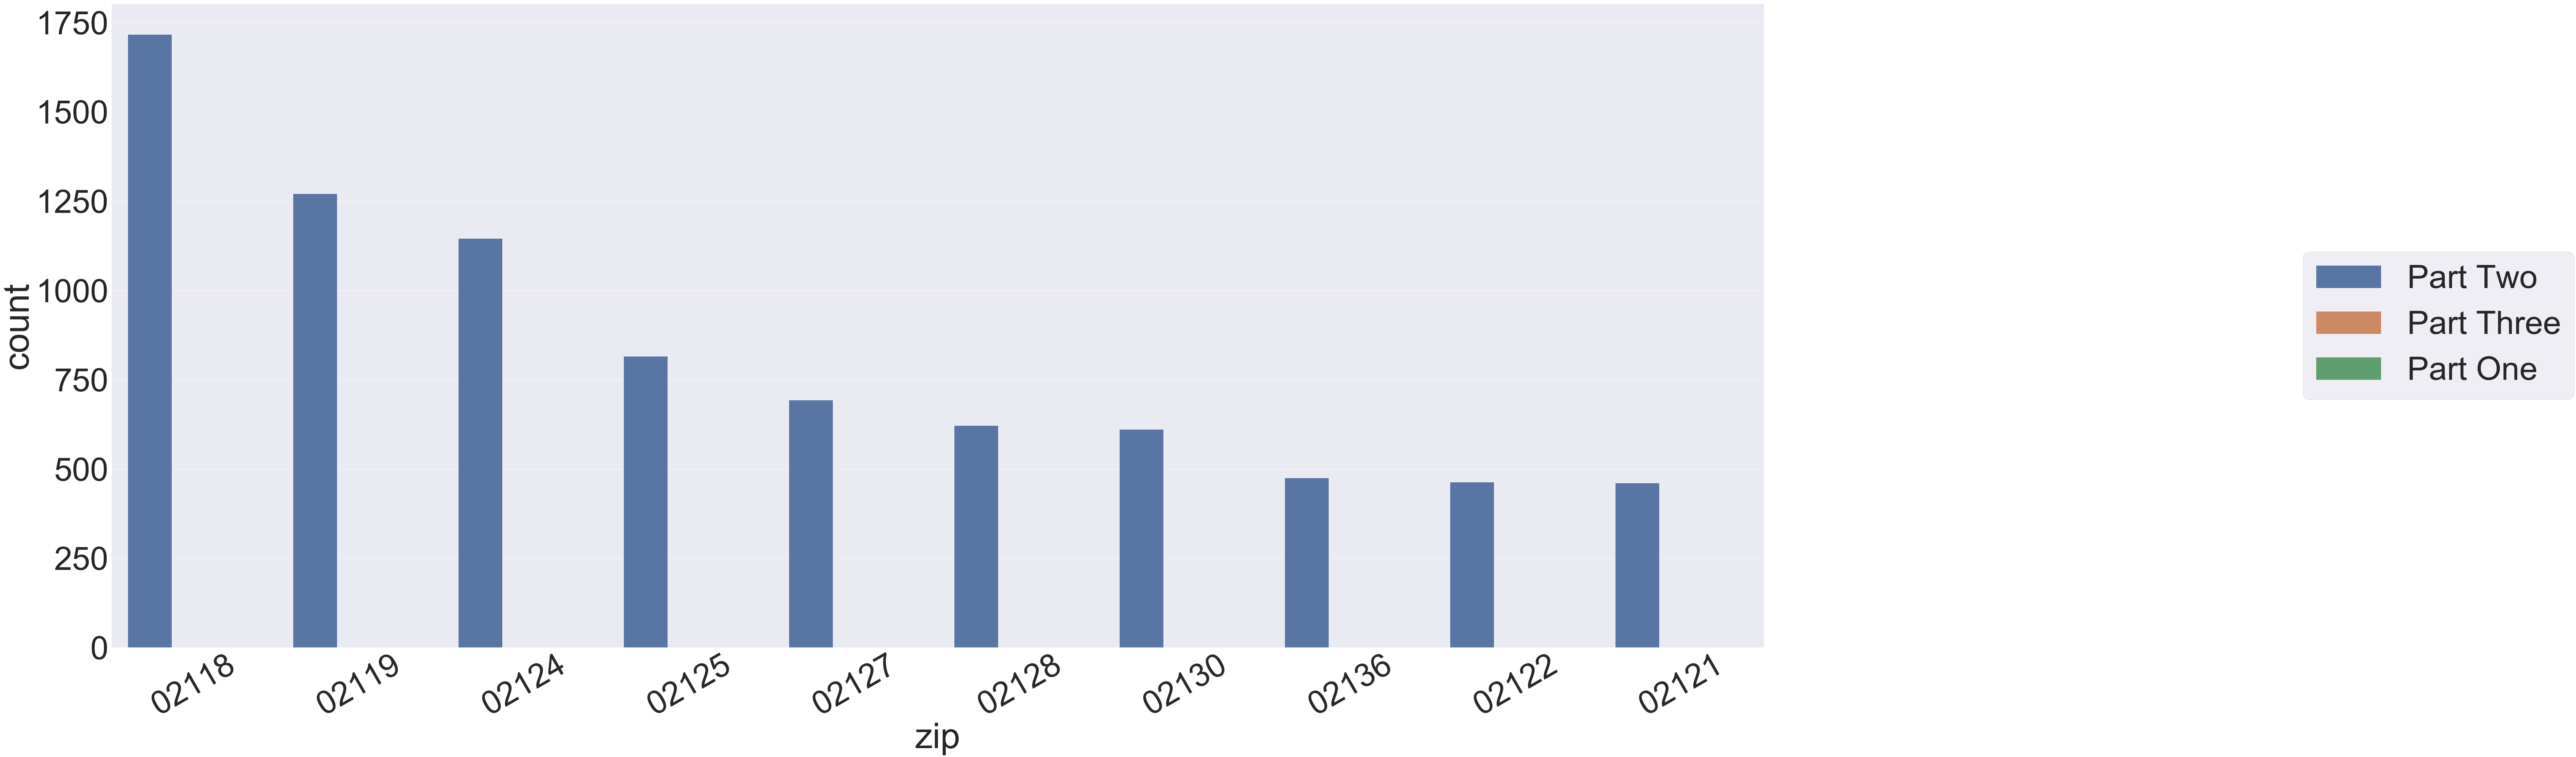

In [119]:
# Here's a plot of the UCR_Part based on the top zipcodes for crimes.

sns.set_context(context='paper', font_scale=10)
sns.set(font_scale=10)
f, ax = plt.subplots(figsize=(100,40))
plt.xticks(rotation=30)
sns.countplot(x='zip', hue = 'ucr_part', data=drugs, 
              order=drugs['zip'].value_counts().iloc[:10].index,
              #facecolor=(0, 0, 0, 0), linewidth=10, edgecolor=sns.color_palette("dark", 3),
              hue_order=drugs.ucr_part.value_counts().index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.5, 0.5))

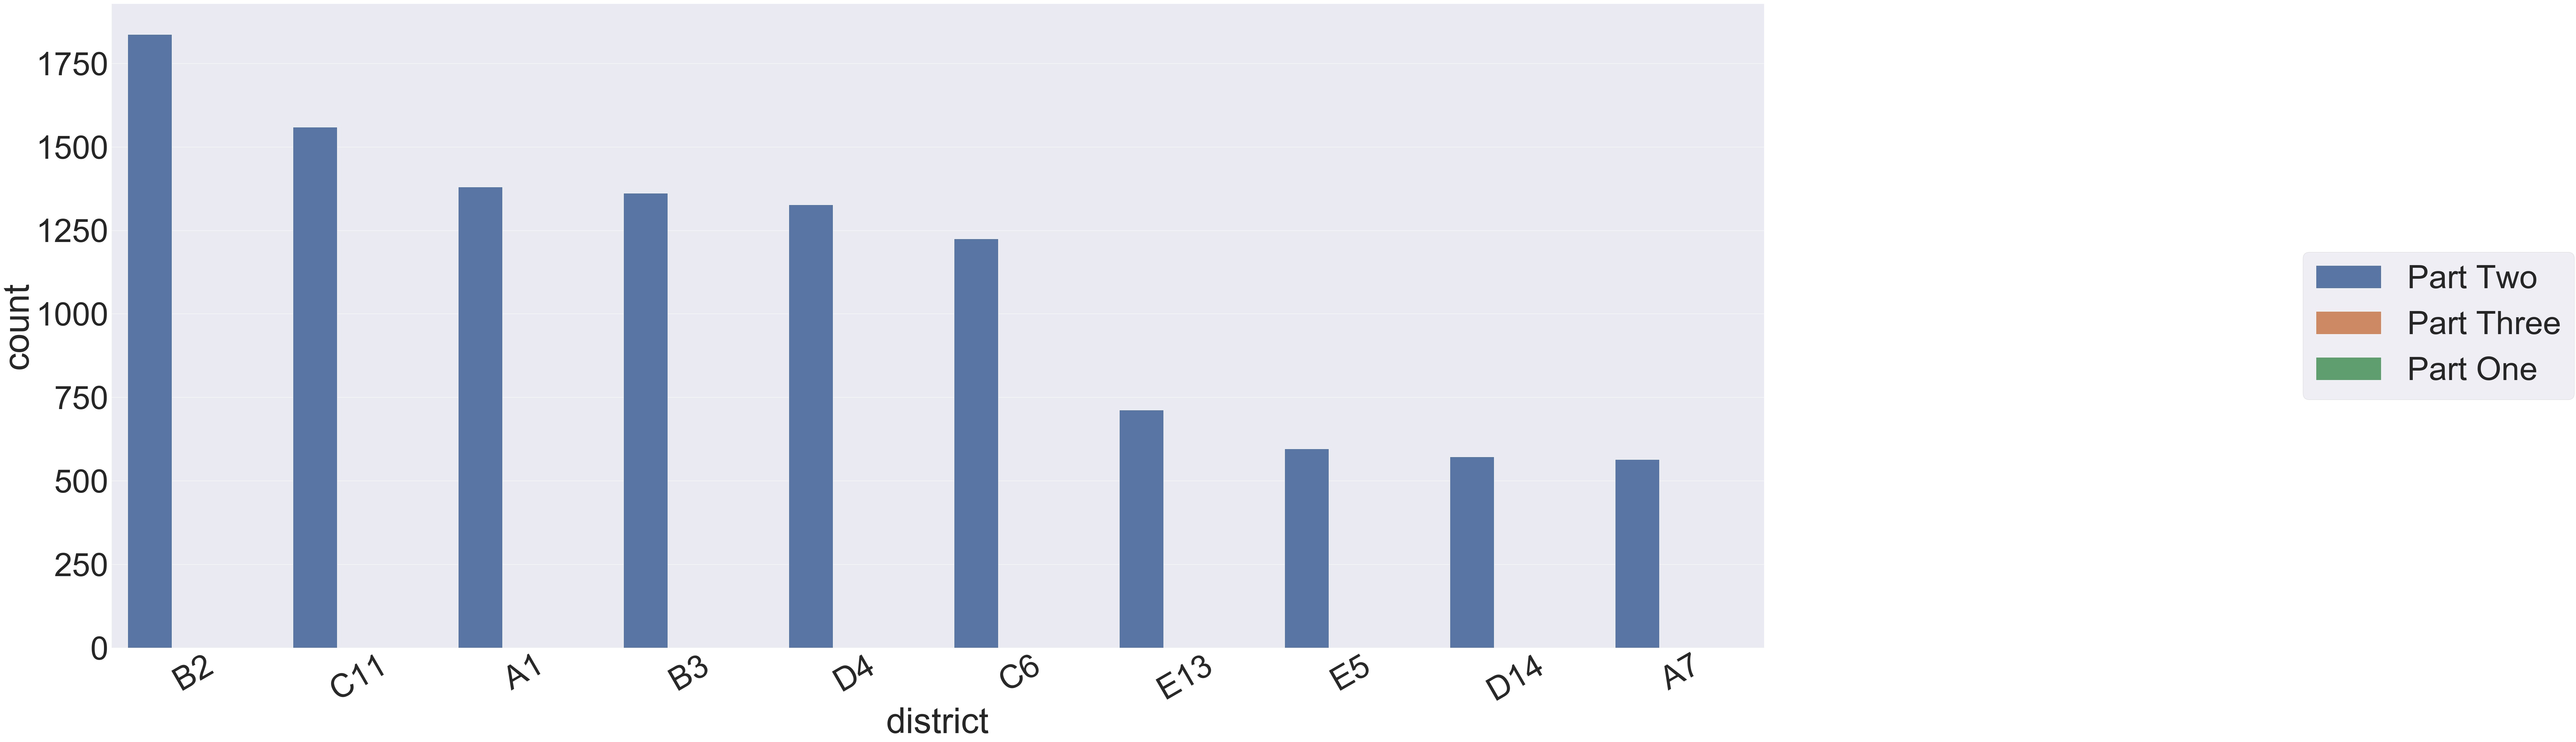

In [120]:
# Here's a plot of the UCR_Part based on the top zipcodes for crimes.

sns.set_context(context='paper', font_scale=10)
sns.set(font_scale=10)
f, ax = plt.subplots(figsize=(100,40))
plt.xticks(rotation=30)
sns.countplot(x='district', hue = 'ucr_part', data=drugs, 
              order=drugs['district'].value_counts().iloc[:10].index,
              #facecolor=(0, 0, 0, 0), linewidth=10, edgecolor=sns.color_palette("dark", 3),
              hue_order=drugs.ucr_part.value_counts().index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.5, 0.5))

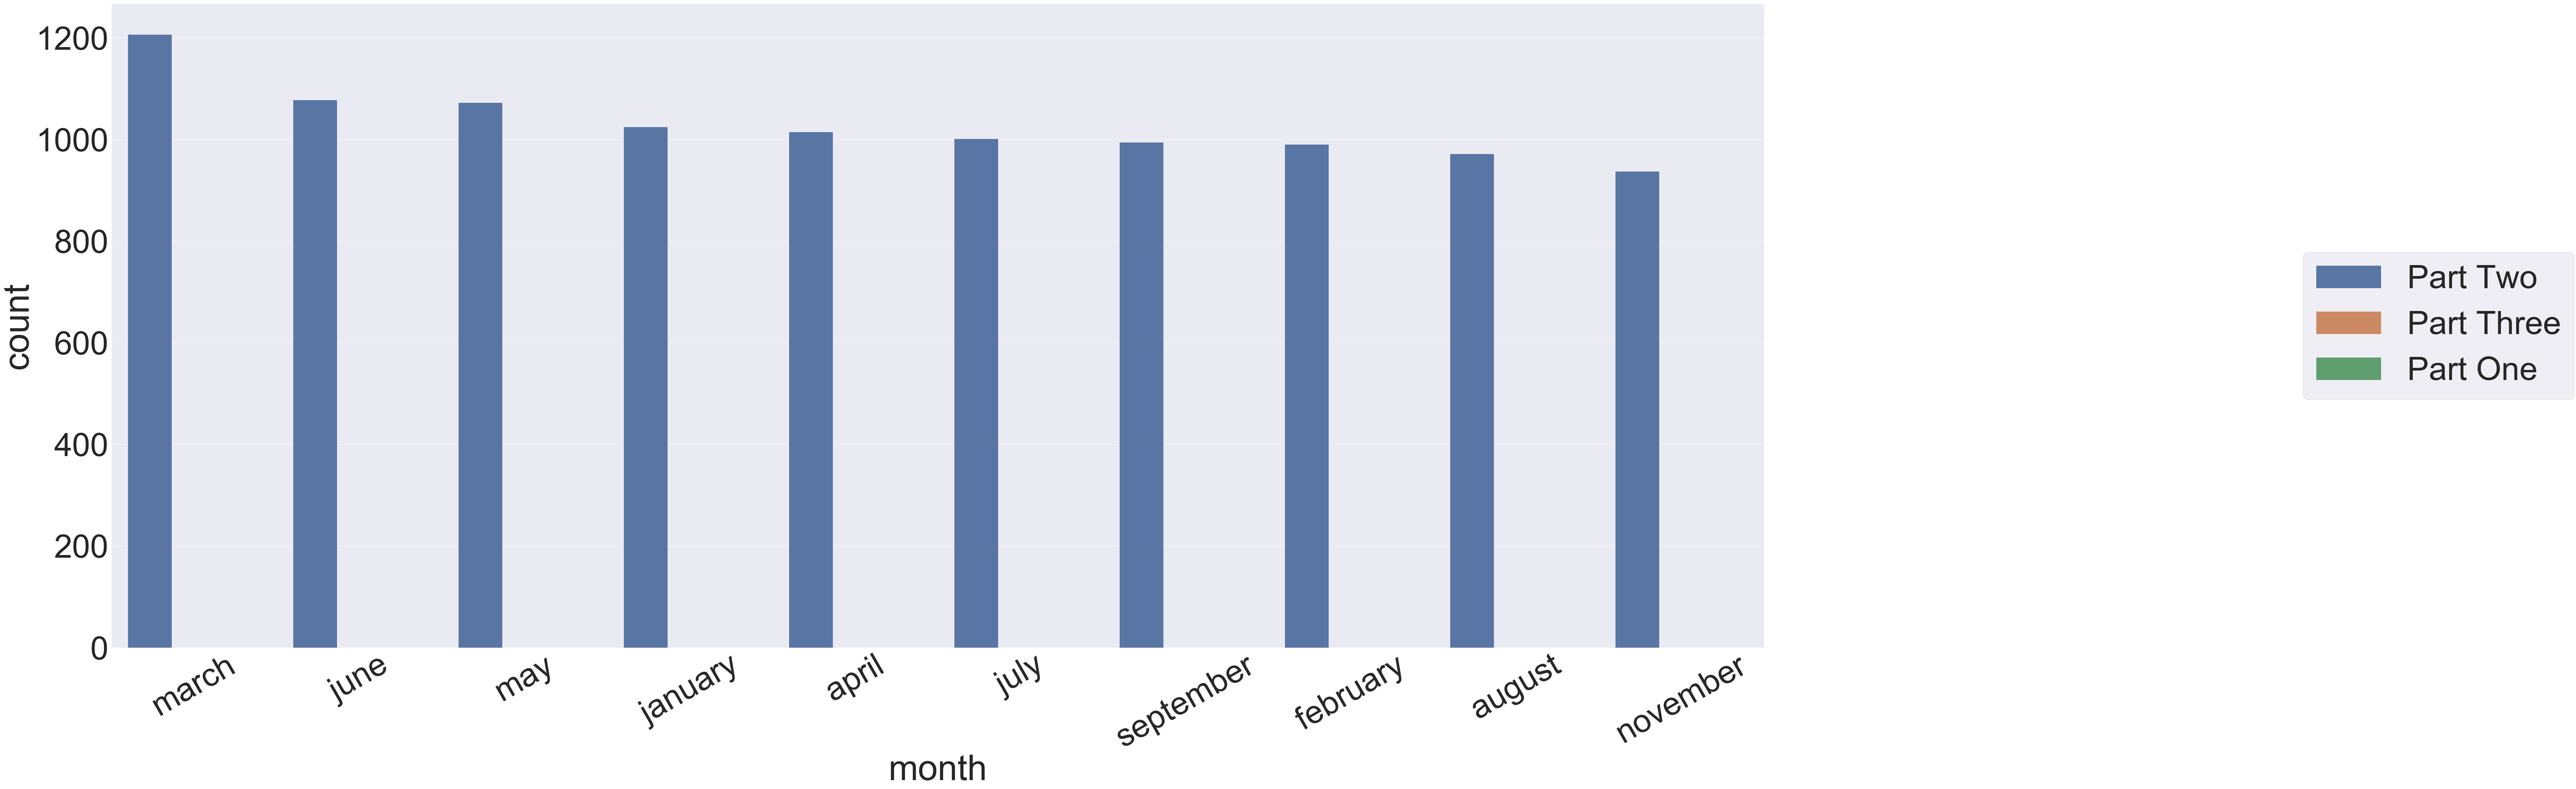

In [121]:
# Here's a plot of the UCR_Part based on the top zipcodes for crimes.

sns.set_context(context='paper', font_scale=10)
sns.set(font_scale=10)
f, ax = plt.subplots(figsize=(100,40))
plt.xticks(rotation=30)
sns.countplot(x='month', hue = 'ucr_part', data=drugs, 
              order=drugs['month'].value_counts().iloc[:10].index,
              #facecolor=(0, 0, 0, 0), linewidth=10, edgecolor=sns.color_palette("dark", 3),
              hue_order=drugs.ucr_part.value_counts().index).legend(loc='center right', 
                                                                                 bbox_to_anchor=(1.5, 0.5))

In [122]:
mask_drugs = crime_ziptest['offense_code_group'] == 'drug violation'
drugs = crime_ziptest[mask_drugs]
drugs.head()

offense_code_group                             offense_description  \
249     drug violation  drugs - poss class d - intent to mfr dist disp   
251     drug violation                                   drugs - other   
260     drug violation            drugs - poss class b - cocaine, etc.   
261     drug violation                    drugs - sale / manufacturing   
262     drug violation  drugs - poss class b - intent to mfr dist disp   

    district      occurred_on_date  year month day_of_week  hour  ucr_part  \
249       A7  6/11/2018 7:03:00 PM  2018  june      Monday    19  Part Two   
251       B3  6/11/2018 7:23:00 PM  2018  june      Monday    19  Part Two   
260      E18  6/11/2018 6:54:00 PM  2018  june      Monday    18  Part Two   
261      E18  6/11/2018 6:54:00 PM  2018  june      Monday    18  Part Two   
262      E18  6/11/2018 6:54:00 PM  2018  june      Monday    18  Part Two   

            street        lat       long                     location    zip  
249     CHELSEA ST  42.383916 -71.022662  (42.38391569, -71.02266216)  02128  
251  WASHINGTON ST  42.328663 -71.085634  (42.32866284, -71.08563401)  02119  
260     WOLCOTT CT  42.237963 -71.131547  (42.23796336, -71.13154728)  02136  
261     WOLCOTT CT  42.237963 -71.131547  (42.23796336, -71.13154728)  02136  
262     WOLCOTT CT  42.237963 -71.131547  (42.23796336, -71.13154728)  02136

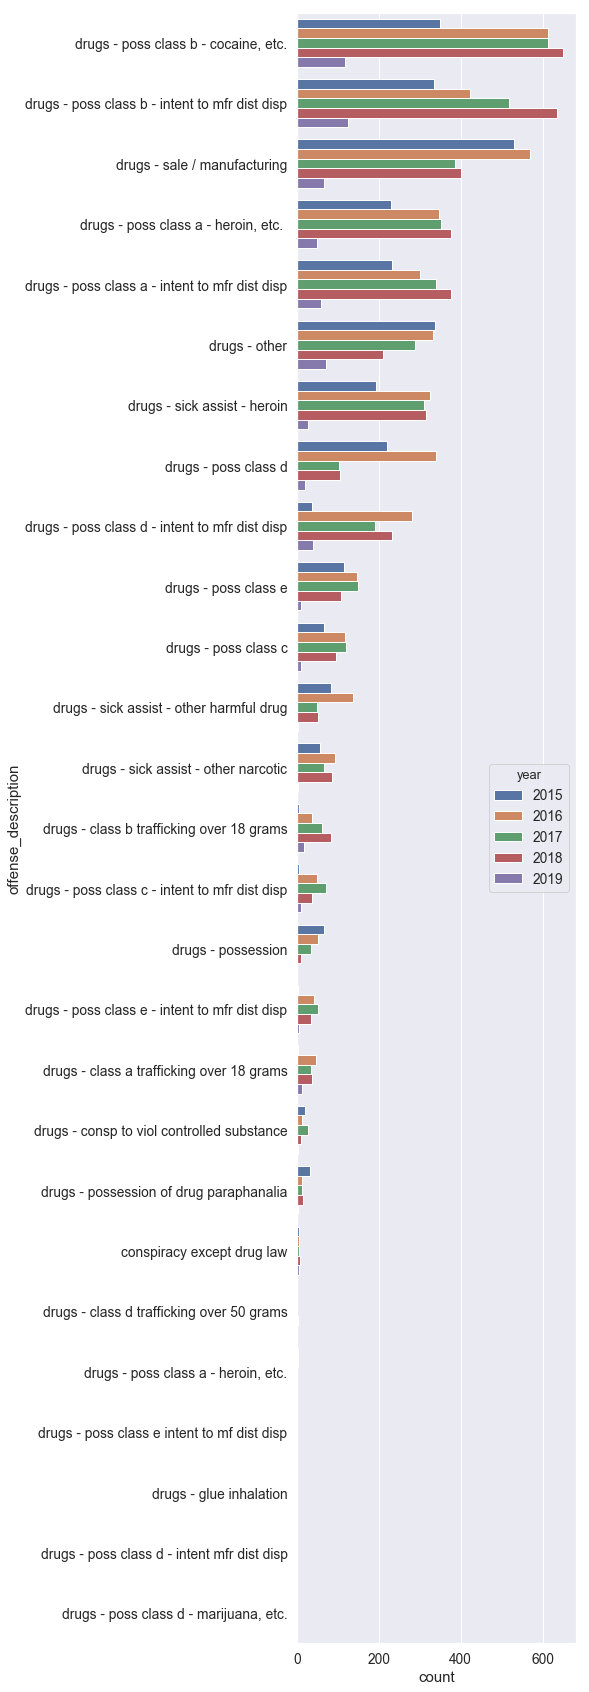

In [123]:
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(5, 30))
sns.countplot(y='offense_description', hue='year', data=drugs, order=drugs['offense_description'].value_counts().iloc[:27].index)

            lat       long                    location  count
569   42.284826 -71.091374  (42.28482577 -71.09137369)    565
2303  42.328663 -71.085634  (42.32866284 -71.08563401)    374
2888  42.341288 -71.054679  (42.34128751 -71.05467933)    348
2460  42.331521 -71.070853  (42.33152148 -71.07085307)    339
1482  42.310434 -71.061340  (42.31043400 -71.06134010)    315
         lat       long                    location  count
0  42.233372 -71.132004  (42.23337226 -71.13200359)      1
1  42.234835 -71.127736  (42.23483513 -71.12773597)      1
2  42.234902 -71.137910  (42.23490232 -71.13791008)      1
3  42.236039 -71.127182  (42.23603929 -71.12718154)      2
4  42.236048 -71.131313  (42.23604809 -71.13131300)      4


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


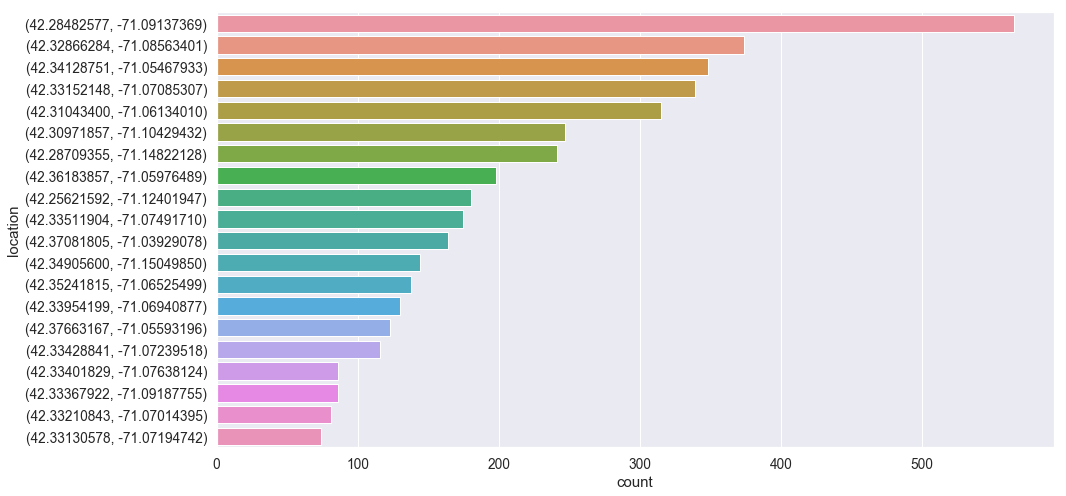

In [124]:
# Here is the plot of the dataset using `Folium`

#```python

# These are the top 20 'coordinates' according to the data.

sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15,8))
sns.countplot(y='location', data=drugs, order=drugs.location.value_counts().iloc[:20].index)



# Here, I'm making a Dataframe of the locations and the count.  What you see below
# is the top 5 locations. 
# I want to use this for my folium map.

df1 = drugs.groupby(["lat", "long", "location"]).size().reset_index(name='count')
df1['location'] = df1['location'].str.replace(',', '')

# Sort the count from highest count with location to lowest.
print(df1.sort_values(by = 'count', ascending=False).head())

# The DataFrame not sorted.
print(df1.head())

# convert to (n, 2) nd-array format for heatmap

locationArr = df1[['lat', 'long']].as_matrix()

m = folium.Map(location=[42.32, -71.0589], zoom_start=12)
m.add_child(plugins.HeatMap(locationArr, radius=9))
m
#```

#### **_To write a csv of the file from above:_**
`crime_zip.to_csv('crime_zip.csv')`

<a id='ucr_part'></a>

# **Further Analysis**

## In the lines below, I am:
>- **importing** `'crime_zip.csv'` and then splitting the data into two different sets.
- Filtering the data to **keep ONLY 2018** records
- Creating a separate dataframe (df) which will hold the value_counts for ucr_part (Part One, Part Two)
- Printing the sorted datasets based on their parts respectively

**In the dataset, `ucr_part` represents "Universal Crime Rating" which can be broken down to various parts (Primarily Part One and Part Two)**

 - According to the [FBI (Dept. of Justice)](https://ucr.fbi.gov/additional-ucr-publications/ucr_handbook.pdf) the UCR Parts stand for "Universal Crime Reporting"

>**_Part I_** offense classifications include (in this particular order):
1. Criminal Homicide
2. Forcible Rape
3. Robbery
4. Aggravated Assault
5. Burglary
6. Larceny-theft (except motor vehicle theft)
7. Motor Vehicle Theft
8. Arson



 
>**_Part II_** offenses encompass all other reportable classifications outside those defined as Part I. 
9. Other Assaults
10. Forgery and Counterfeiting
11. Fraud
12. Embezzlement
13. Stolen Property: Buying, Receiving, Possessing
14. Vandalism
15. Weapons: Carrying, Possessing, etc.
16. Prostitution and Commercialized Vice
17. Sex Offenses
18. Drug Abuse Violations
19. Gambling
20. Offenses Against the Family and Children
21. Driving Under the Influence
22. Liquor Laws
23. Drunkenness
24. Disorderly Conduct
25. Vagrancy
26. All Other Offenses
27. Suspicion
28. Curfew and Loitering Laws—(Persons under 18)
29. Runaways—(Persons under 18)

## I also decided to investigate the zipcodes along with the data including **"homicide"**.  

[Table of Contents](#top)<a href='top'></a>

In [125]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

`crime_zip = pd.read_csv('crime_zip.csv')`

In [126]:
mask1 = crime_ziptest['offense_code_group'] == 'homicide'
homicide = crime_ziptest[mask1]
homicide.reset_index(inplace=True, drop=True)

mask2 = homicide['year'] != 2019
homicide = homicide[mask2]
homicide.reset_index(inplace=True, drop=True)

mask3 = homicide['year'] != 2015
homicide = homicide[mask3]
homicide.reset_index(inplace=True, drop=True)

In [127]:
a = crime_ucr_1['zip'].unique()
b = crime_ucr_1['zip'].value_counts()
c = crime_ucr_2['zip'].unique()
d = crime_ucr_2['zip'].value_counts()
e = homicide['zip'].unique()
f = homicide['zip'].value_counts()
print("\nNumber of Zipcodes in UCR 1:", len(a))
print("\nNumber of Zipcodes in UCR 1 counts:", len(b))
print("\nNumber of Zipcodes in UCR 2:", len(c))
print("\nNumber of Zipcodes in UCR 2 counts:", len(d))
print("\nNumber of Zipcodes in homicide counts:", len(e))
print("\nNumber of Zipcodes in homicide counts:", len(f))


Number of Zipcodes in UCR 1: 40

Number of Zipcodes in UCR 1 counts: 40

Number of Zipcodes in UCR 2: 41

Number of Zipcodes in UCR 2 counts: 41

Number of Zipcodes in homicide counts: 19

Number of Zipcodes in homicide counts: 19


In [128]:
# Creating the dataframes:
df1 = b.to_frame(name='part_one_freq')
df2 = d.to_frame(name='part_two_freq')
df3 = f.to_frame(name='homicide')

# Joining the two dataframes so any zipcodes that are not mentioned in UCR 1 or 2 come up as "NAN"
df = df1.join([df2, df3], how='outer')
df = df.replace(np.nan, 0)

# If you want the zipcode to be the index, then comment out this next line:
df = df.reset_index(inplace=False, drop=False).rename(columns={'index':'zip'})
print("\nNumber of Zipcodes in UCR 1:", len(a))
print("\nNumber of Zipcodes in UCR 2:", len(c))
print("\nNumber of Zipcodes in homicide counts:", len(e))
print("\nShape of DataFrame:", df.shape)


Number of Zipcodes in UCR 1: 40

Number of Zipcodes in UCR 2: 41

Number of Zipcodes in homicide counts: 19

Shape of DataFrame: (41, 4)


/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6369: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  verify_integrity=True)


In [129]:
df.head()

zip  part_one_freq  part_two_freq  homicide
0  02108         1904.0           2257       0.0
1  02109         1157.0            929       0.0
2  02110          458.0            577       0.0
3  02111         1093.0           1589       1.0
4  02113          338.0            402       0.0

In [130]:
df['part_one_perc'] = (df['part_one_freq'])/(df['part_one_freq'].sum())*100
df['part_two_perc'] = (df['part_two_freq'])/(df['part_two_freq'].sum())*100
df['homicide_perc'] = (df['homicide'])/(df['homicide'].sum())*100
df = df[['zip', 'part_one_freq', 'part_one_perc', 'part_two_freq', 'part_two_perc', 'homicide', 'homicide_perc']]

print('\n\nPart ONE Sorted Top 5:\n\n', 
      df.sort_values(by='part_one_perc', 
                     ascending=False).reset_index(drop=True).head(), 
     '\n___________________________________________________________________\n')
print('\n___________________________________________________________________\n',
      'Part TWO Sorted Top 5:\n\n', df.sort_values(by='part_two_perc', 
                                                           ascending=False).reset_index(drop=True).head())
print('\n___________________________________________________________________\n',
      'homicide_perc Sorted Top 5:\n\n', df.sort_values(by='homicide_perc', 
                                                           ascending=False).reset_index(drop=True).head())



Part ONE Sorted Top 5:

      zip  part_one_freq  part_one_perc  part_two_freq  part_two_perc  \
0  02116         4673.0       9.339649           3457       4.420999   
1  02124         3534.0       7.063197           8199      10.485325   
2  02119         3416.0       6.827357           7216       9.228212   
3  02125         3120.0       6.235760           5114       6.540060   
4  02118         3020.0       6.035896           5564       7.115544   

   homicide  homicide_perc  
0       1.0       0.719424  
1      22.0      15.827338  
2      12.0       8.633094  
3      19.0      13.669065  
4       4.0       2.877698   
___________________________________________________________________


___________________________________________________________________
 Part TWO Sorted Top 5:

      zip  part_one_freq  part_one_perc  part_two_freq  part_two_perc  \
0  02124         3534.0       7.063197           8199      10.485325   
1  02119         3416.0       6.827357           7216    

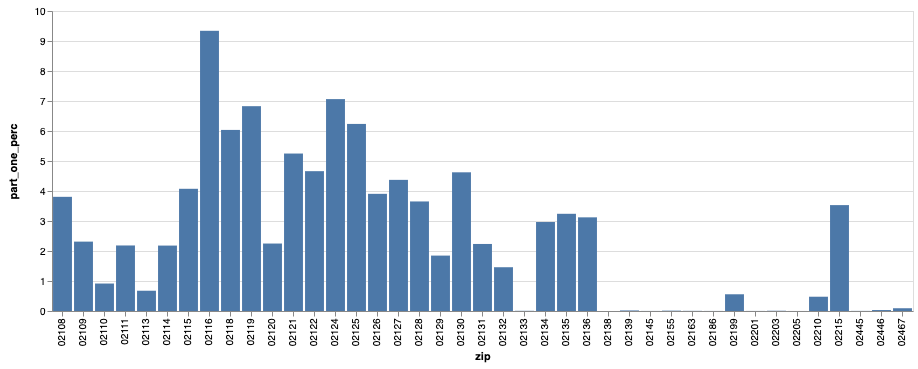

In [131]:
import altair as alt
from vega_datasets import data

alt.Chart(df).mark_bar().encode(
    x='zip',
    y='part_one_perc',
    tooltip=['zip', 'part_one_freq', 'part_two_freq', 'part_one_perc', 'part_two_perc'],   
)

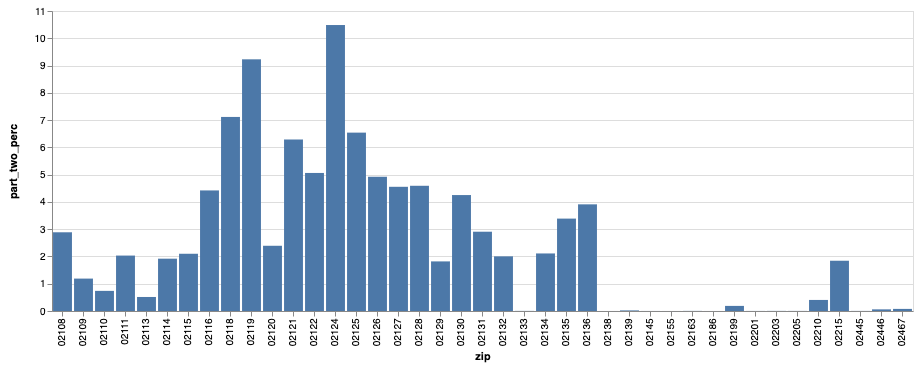

In [132]:
import altair as alt
from vega_datasets import data

alt.Chart(df).mark_bar().encode(
    x='zip',
    y='part_two_perc',
    tooltip=['zip', 'part_one_freq', 'part_two_freq', 'part_one_perc', 'part_two_perc'],   
)

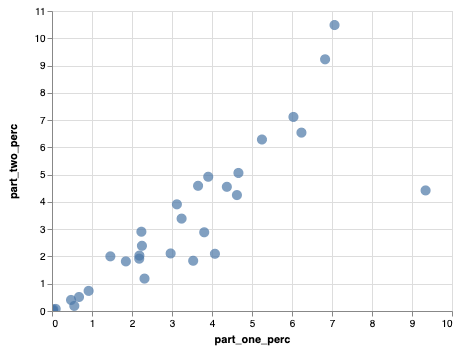

In [220]:
import altair as alt
from vega_datasets import data

alt.Chart(df).mark_circle(size=100).encode(
    x='part_one_perc',
    y='part_two_perc',
    tooltip=['zip', 'part_one_freq', 'part_two_freq', 'part_one_perc', 'part_two_perc', 'homicide', 'homicide_perc']   
).interactive()

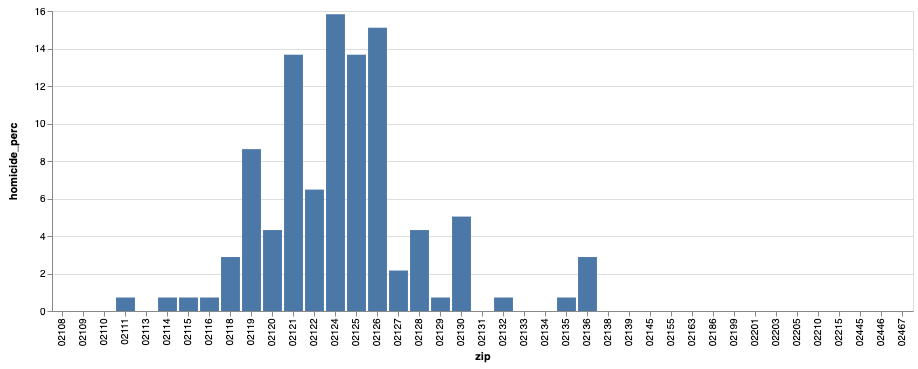

In [219]:
import altair as alt
from vega_datasets import data

alt.Chart(df).mark_bar().encode(
    x='zip',
    y='homicide_perc',
    tooltip=['zip', 'part_one_freq', 'part_two_freq', 'part_one_perc', 'part_two_perc', 'homicide', 'homicide_perc']   
)

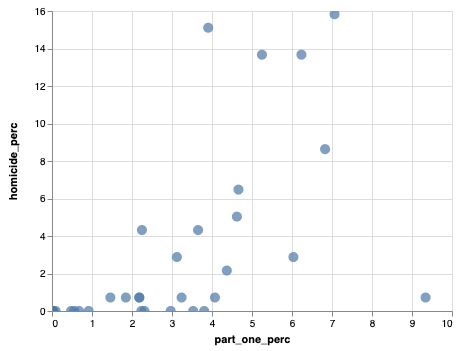

In [135]:
import altair as alt
from vega_datasets import data

alt.Chart(df).mark_circle(size=100).encode(
    x='part_one_perc',
    y='homicide_perc',
    tooltip=['zip', 'part_one_freq', 'part_two_freq', 'part_one_perc', 'part_two_perc', 'homicide', 'homicide_perc']
).interactive()

<a id='testing'></a>
# **Demographics with Zipcode**

### In this section, I have downloaded Raj's files _(here's another opportunity to download the files)_:
>- [dempop_metadata.csv](https://github.com/mattdavis17/MIST-6150-Dataset-Deliverables/raw/master/dempop_metadata.csv.zip)
- [dempop_zip.csv](https://github.com/mattdavis17/MIST-6150-Dataset-Deliverables/raw/master/dempop_zip.csv.zip)

### The objective here is to identify any **_interesting_** relationships between the demographics and zipcodes.  

[Table of Contents](#top)<a href='top'></a>

In [136]:
raj.head()

zip GEO.display-label  HC01_VC03  HC01_VC04  HC01_VC05  HC01_VC06  \
0  2136       ZCTA5 02136      33084      15389      17695       87.0   
1  2136       ZCTA5 02136      33084      15389      17695       87.0   
2  2136       ZCTA5 02136      33084      15389      17695       87.0   
3  2136       ZCTA5 02136      33084      15389      17695       87.0   
4  2136       ZCTA5 02136      33084      15389      17695       87.0   

   HC01_VC09  HC01_VC10  HC01_VC11  HC01_VC12  ...    HC01_VC109  HC01_VC113  \
0       1664       1921       2650       2178  ...         12245       21916   
1       1664       1921       2650       2178  ...         12245       21916   
2       1664       1921       2650       2178  ...         12245       21916   
3       1664       1921       2650       2178  ...         12245       21916   
4       1664       1921       2650       2178  ...         12245       21916   

   HC01_VC114  HC01_VC115                          File Paths        lat  \
0        9795       12121  ACS_17_5YR_DP05_with_ann_02136.csv  42.232413   
1        9795       12121  ACS_17_5YR_DP05_with_ann_02136.csv  42.232656   
2        9795       12121  ACS_17_5YR_DP05_with_ann_02136.csv  42.232870   
3        9795       12121  ACS_17_5YR_DP05_with_ann_02136.csv  42.232907   
4        9795       12121  ACS_17_5YR_DP05_with_ann_02136.csv  42.233086   

        long                    location  count  zip-1  
0 -71.129715  (42.23241330 -71.12971531)     10   2136  
1 -71.130700  (42.23265556 -71.13069992)      3   2136  
2 -71.130050  (42.23287025 -71.13004959)      5   2136  
3 -71.131671  (42.23290729 -71.13167059)      3   2136  
4 -71.128157  (42.23308580 -71.12815697)     15   2136  

[5 rows x 97 columns]

In [137]:
print('\nraj shape:', raj.shape)
print('\nraj_meta shape:', raj_meta.shape)
print('\n\nlist of the column descriptions:\n',raj_meta.head(20))


raj shape: (17727, 97)

raj_meta shape: (97, 1)


list of the column descriptions:
                                                          Description
Columns                                                             
NaN                                                              NaN
zip                                                      Postal Code
GEO.display-label                                          Geography
HC01_VC03                   Estimate; SEX AND AGE - Total population
HC01_VC04            Estimate; SEX AND AGE - Total population - Male
HC01_VC05          Estimate; SEX AND AGE - Total population - Female
HC01_VC06          Estimate; SEX AND AGE - Total population - Sex...
HC01_VC09                      Estimate; SEX AND AGE - Under 5 years
HC01_VC10                       Estimate; SEX AND AGE - 5 to 9 years
HC01_VC11                     Estimate; SEX AND AGE - 10 to 14 years
HC01_VC12                     Estimate; SEX AND AGE - 15 to 19 years
HC01_VC13         

In [138]:
raj = raj[['zip', 'HC01_VC35', 'HC01_VC38', 'HC01_VC44']]
raj1 = raj.rename(columns={'HC01_VC35':'18+', 
                    'HC01_VC38':'18+ Sex ratio (males per 100 females)',
                   'HC01_VC44':'65+ years Sex ratio (males per 100 females)'})
raj1['zip'] = raj1['zip'].apply(lambda x: '{0:0>5}'.format(x)) # inputing the 0 at the start of the zipcode
raj1.head()

zip    18+  18+ Sex ratio (males per 100 females)  \
0  02136  25292                                   84.0   
1  02136  25292                                   84.0   
2  02136  25292                                   84.0   
3  02136  25292                                   84.0   
4  02136  25292                                   84.0   

   65+ years Sex ratio (males per 100 females)  
0                                         68.5  
1                                         68.5  
2                                         68.5  
3                                         68.5  
4                                         68.5

In [139]:
raj1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17727 entries, 0 to 17726
Data columns (total 4 columns):
zip                                            17727 non-null object
18+                                            17727 non-null int64
18+ Sex ratio (males per 100 females)          17727 non-null float64
65+ years Sex ratio (males per 100 females)    17727 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 554.0+ KB


In [140]:
raj1.describe(include='all').loc['unique', :]

zip                                             25
18+                                            NaN
18+ Sex ratio (males per 100 females)          NaN
65+ years Sex ratio (males per 100 females)    NaN
Name: unique, dtype: object

<a id='food'></a>
# **Retaurant Inspection Cleaning and Analysis**

### In this section, Anh works through the cleaning and analysis for Food Inspection Data
### **[Direct Link To Download Data](https://github.com/mattdavis17/MIST-6150-Dataset-Deliverables/raw/master/df_ins.csv.zip)**.
(_Keep in mind, you'll need to **UNZIP** the csv prior to any further work_)



#### Food Inspection Data Set Description
"The Health Division of the Department of Inspectional Services ensures that all food establishments in the City of Boston meet relevant sanitary codes and standards. Businesses that serve food are inspected at least once a year, and follow-up inspections are performed on high risk establishments. Health inspections are also conducted in response to complaints of unsanitary conditions or illness."  *(Source - https://data.boston.gov)*

The number of violations is defined as:

1) *      Minor Violation 

2) **     Major Violation 

3) ***    Severe Violation

*(Source - https://restaurantprediction.weebly.com)*

#### Data Cleaning Summary
1) Convert attributes to appropriate date type and format
    
    a) all -dttm columns (5) to datetime 
    
    b) zip to 5-digit format
    
2) Filter data by active license category

3) Filter data by license expired by 12/31/19

4) Filter data for inspection result ('resultdttm') for dates from 2015 to current (to match df_crime)

5) Remove un-needed columns

6) Take care of NaN values 

#### Final Clean Data Set Information

1) Name = dfins_activefrm15

2) Shape = 164,383 rows x 13 columns

[Table of Contents](#top)<a href='top'></a>

## Installing Packages

In [141]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
pd.set_option('display.max_columns', None)  # display all columns on screen
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
!pip install wordcloud

In [143]:
import os
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Original Dataset Exploration

In [144]:
df_ins_org.head()

businessname dbaname         legalowner namelast namefirst  \
0  100 Percent Delicia Food     NaN  BRENNAN PATRICK E    Marte   Civelis   
1  100 Percent Delicia Food     NaN  BRENNAN PATRICK E    Marte   Civelis   
2  100 Percent Delicia Food     NaN  BRENNAN PATRICK E    Marte   Civelis   
3  100 Percent Delicia Food     NaN  BRENNAN PATRICK E    Marte   Civelis   
4  100 Percent Delicia Food     NaN  BRENNAN PATRICK E    Marte   Civelis   

   licenseno              issdttm              expdttm licstatus licensecat  \
0      87059  2013-04-05 12:47:23  2019-12-31 23:59:00    Active         FS   
1      87059  2013-04-05 12:47:23  2019-12-31 23:59:00    Active         FS   
2      87059  2013-04-05 12:47:23  2019-12-31 23:59:00    Active         FS   
3      87059  2013-04-05 12:47:23  2019-12-31 23:59:00    Active         FS   
4      87059  2013-04-05 12:47:23  2019-12-31 23:59:00    Active         FS   

            descript   result           resultdttm        violation viollevel  \
0  Eating & Drinking  HE_Fail  2013-02-15 12:19:42      15-4-202.16         *   
1  Eating & Drinking  HE_Fail  2013-02-15 12:19:42  16-4-501.11/.15         *   
2  Eating & Drinking  HE_Fail  2013-02-15 12:19:42  16-4-501.11/.15         *   
3  Eating & Drinking  HE_Fail  2013-02-15 12:19:42   29-5-201/02.11         *   
4  Eating & Drinking  HE_Fail  2013-02-15 12:19:42   31-5-204/05.11       ***   

                    violdesc             violdttm violstatus statusdate  \
0  Non-Food Contact Surfaces  2013-02-15 12:19:42       Fail        NaN   
1      Dishwashng Facilities  2013-02-15 12:19:42       Fail        NaN   
2      Dishwashng Facilities  2013-02-15 12:19:42       Fail        NaN   
3   Installed and Maintained  2013-02-15 12:19:42       Fail        NaN   
4       Location  Accessible  2013-02-15 12:19:42       Fail        NaN   

                                            comments              address  \
0                        Provide glass storage rack.  635   Hyde Park AVE   
1  Provide dish rack over 3 bay sink to replace m...  635   Hyde Park AVE   
2          Provide dish washer at ware washing area.  635   Hyde Park AVE   
3                      Provide mop sink at basement.  635   Hyde Park AVE   
4                 No hand sink at Bar Area  provide.  635   Hyde Park AVE   

         city state    zip  property_id                       location  
0  Roslindale    MA  02131      77476.0  (42.278590000, -71.119440000)  
1  Roslindale    MA  02131      77476.0  (42.278590000, -71.119440000)  
2  Roslindale    MA  02131      77476.0  (42.278590000, -71.119440000)  
3  Roslindale    MA  02131      77476.0  (42.278590000, -71.119440000)  
4  Roslindale    MA  02131      77476.0  (42.278590000, -71.119440000)

In [145]:
df_ins_org.shape

(562720, 26)

In [146]:
df_ins_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562720 entries, 0 to 562719
Data columns (total 26 columns):
businessname    562720 non-null object
dbaname         5426 non-null object
legalowner      392419 non-null object
namelast        562720 non-null object
namefirst       562606 non-null object
licenseno       562720 non-null int64
issdttm         562720 non-null object
expdttm         562720 non-null object
licstatus       562720 non-null object
licensecat      562720 non-null object
descript        562720 non-null object
result          562720 non-null object
resultdttm      562720 non-null object
violation       530897 non-null object
viollevel       530897 non-null object
violdesc        530896 non-null object
violdttm        562720 non-null object
violstatus      530897 non-null object
statusdate      233765 non-null object
comments        562716 non-null object
address         562720 non-null object
city            562694 non-null object
state           562720 non-null ob

## Cleaning 1 - Converting Data Type

In [147]:
# copy df_ins_org as df_ins.  
df_ins = df_ins_org.copy()

In [148]:
# change data type of "issdttm", "expdttm", "resultdttm", "violdttm", and "statusdate" to date/time 
df_ins['issdttm']=pd.to_datetime(df_ins['issdttm'], format='%Y-%m-%d', errors='coerce')
df_ins['expdttm']=pd.to_datetime(df_ins['expdttm'], format='%Y-%m-%d', errors = 'coerce')
df_ins['resultdttm']=pd.to_datetime(df_ins['resultdttm'], format='%Y-%m-%d', errors = 'coerce')
df_ins['violdttm']=pd.to_datetime(df_ins['violdttm'], format='%Y-%m-%d', errors = 'coerce')
df_ins['statusdate']=pd.to_datetime(df_ins['statusdate'], format='%Y-%m-%d', errors = 'coerce')

In [149]:
# change zip to correct 5-digit format
df_ins['zip']=df_ins['zip'].astype(str).str.zfill(5)

In [150]:
# confirm data type change for df_ins
df_ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 562720 entries, 0 to 562719
Data columns (total 26 columns):
businessname    562720 non-null object
dbaname         5426 non-null object
legalowner      392419 non-null object
namelast        562720 non-null object
namefirst       562606 non-null object
licenseno       562720 non-null int64
issdttm         562607 non-null datetime64[ns]
expdttm         562449 non-null datetime64[ns]
licstatus       562720 non-null object
licensecat      562720 non-null object
descript        562720 non-null object
result          562720 non-null object
resultdttm      556323 non-null datetime64[ns]
violation       530897 non-null object
viollevel       530897 non-null object
violdesc        530896 non-null object
violdttm        530894 non-null datetime64[ns]
violstatus      530897 non-null object
statusdate      233765 non-null datetime64[ns]
comments        562716 non-null object
address         562720 non-null object
city            562694 non-null o

## Cleaning 2 - Filtering Dataset to Desired Time Range

In [151]:
# filter by license status = active
df_activ=df_ins.copy()
df_activ=df_activ[df_activ['licstatus']=='Active']
df_activ.shape

(355029, 26)

In [152]:
# filter by license expirate date >= 12/31/2019
df_activ=df_activ[df_activ['expdttm']>='2019']
df_activ.shape

(342409, 26)

In [153]:
# filter by resultdttm=>2015 (from 2015)
df_activ=df_activ[df_activ['resultdttm']>='2015']
df_ins.shape

(562720, 26)

In [154]:
# filter by resultdttm=>2015 (to 2018)
df_activ=df_activ[df_activ['resultdttm']<'2019']
df_activ.shape

(156052, 26)

In [155]:
# extract year and month from resultdttm (date of inspecction results) and change to object type 
df_activ['resultyear']=pd.DatetimeIndex(df_activ['resultdttm']).year
df_activ['resultmonth']=pd.DatetimeIndex(df_activ['resultdttm']).month
df_activ['resultyear']=df_activ['resultyear'].astype(str)
df_activ['resultmonth']=df_activ['resultmonth'].astype(str)
df_activ.shape

(156052, 28)

In [156]:
# extract year from issdttm (licence issue date) and change to object type
df_activ['issueyear']=pd.DatetimeIndex(df_activ['issdttm']).year
df_activ['issueyear']=df_activ['issueyear'].astype(str)
df_activ.shape

(156052, 29)

## Cleaning 3 - Exploring and Filtering to Target License Category

In [157]:
# check descript unique values
# this is the description for licence category
df_activ['descript'].unique()

array(['Eating & Drinking', 'Eating & Drinking w/ Take Out',
       'Retail Food', 'Mobile Food Walk On'], dtype=object)

In [158]:
# check licensecat unique values
df_activ['licensecat'].unique()

array(['FS', 'FT', 'RF', 'MFW'], dtype=object)

In [159]:
# filter by licensecat=FS.  Not interested in FT, RF and MFW for this project.
df_resto=df_activ.copy()
df_resto=df_resto[df_resto['descript']=='Eating & Drinking']
df_resto.shape

(79174, 29)

## Cleaning 4 - Dropping Columns

In [160]:
# dropping columnns that are (1) not necessary for analysis and (2) already filted to one constant value
cols_to_drop=['resultdttm','issdttm','dbaname','legalowner','namelast','namefirst','state','licenseno','expdttm','licstatus','result','resultdttm','violdttm','statusdate','address','property_id','licensecat','descript','location']
df_resto = df_resto.drop(cols_to_drop,axis = 1) 
df_resto.shape # expect 29-18 = 11 columns remaining

(79174, 11)

In [161]:
df_resto.describe(include='all')

businessname        violation viollevel  \
count         79174            77086     77086   
unique         1536               88         3   
top       Yamato II  37-6-501.11-.12         *   
freq            415             6415     57009   

                                      violdesc violstatus comments    city  \
count                                    77086      77086    79174   79174   
unique                                      86          2    36698      36   
top     Improper Maintenance of Walls/Ceilings       Fail           Boston   
freq                                      6415      42064     2559   39223   

          zip resultyear resultmonth issueyear  
count   79174      79174       79174     79174  
unique     32          4          12         9  
top     02116       2018          10      2012  
freq    11144      23888        9138     35370

In [162]:
df_resto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79174 entries, 16 to 562616
Data columns (total 11 columns):
businessname    79174 non-null object
violation       77086 non-null object
viollevel       77086 non-null object
violdesc        77086 non-null object
violstatus      77086 non-null object
comments        79174 non-null object
city            79174 non-null object
zip             79174 non-null object
resultyear      79174 non-null object
resultmonth     79174 non-null object
issueyear       79174 non-null object
dtypes: object(11)
memory usage: 7.2+ MB


## Cleaning 5 - Checking Null Data / Filling NaN Rows

### 5a - Check and fill NaN rows

In [163]:
# Checking null values
df_resto.isnull().sum()

businessname       0
violation       2088
viollevel       2088
violdesc        2088
violstatus      2088
comments           0
city               0
zip                0
resultyear         0
resultmonth        0
issueyear          0
dtype: int64

In [164]:
# Reviewing "violstatus" column
df_resto['violstatus'].unique()

array(['Fail', nan, 'Pass'], dtype=object)

In [165]:
# "Violstatus" Pass indicates Reinspection was Passed, nan or null indicates original Inspection was Passed
# Recode "Pass" to "Reinspection Pass", "Fail" to "Fail - Reinspection Needed", and null to "Pass"
df_resto['violstatus'] = df_resto['violstatus'].replace("Pass","Reinspection Pass")
df_resto['violstatus'] = df_resto['violstatus'].replace("Fail","Fail - Reinspection Needed")
df_resto['violstatus'] = df_resto['violstatus'].fillna('Pass')

In [166]:
# null in "violation", "violdesc", and "viollevel" indicates that original inpsection was passed
# change null for "violation" and "violdesc" to "Pass"
df_resto['violation'] = df_resto['violation'].fillna('Pass')
df_resto['violdesc'] = df_resto['violdesc'].fillna('Pass')

In [167]:
# change null for "viollevel" to 0, which is equivalent to Pass
df_resto['viollevel'] = df_resto['viollevel'].fillna('0')

### 5b - Confirming df no longer has NaN 

In [168]:
# confirm no null data remaining
print('Any null values in df_resto? ', df_resto.isnull().values.any())

Any null values in df_resto?  False


In [169]:
df_resto.describe(include='all')

businessname        violation viollevel  \
count         79174            79174     79174   
unique         1536               89         4   
top       Yamato II  37-6-501.11-.12         *   
freq            415             6415     57009   

                                      violdesc                  violstatus  \
count                                    79174                       79174   
unique                                      87                           3   
top     Improper Maintenance of Walls/Ceilings  Fail - Reinspection Needed   
freq                                      6415                       42064   

       comments    city    zip resultyear resultmonth issueyear  
count     79174   79174  79174      79174       79174     79174  
unique    36698      36     32          4          12         9  
top              Boston  02116       2018          10      2012  
freq       2559   39223  11144      23888        9138     35370

## 6 - Further Data Inspection and Cleaning

In [170]:
# change "viollevel" from * to 1 and ** to 2 and *** to 3
df_resto['viollevel'] = df_resto['viollevel'].replace("*","1")
df_resto['viollevel'] = df_resto['viollevel'].replace("**","2")
df_resto['viollevel'] = df_resto['viollevel'].replace("***","3")

In [171]:
# change "viollevel" data type from object to integer
df_resto['viollevel'] = df_resto.viollevel.astype(int)

In [172]:
# check "city" data
print(df_resto.city.unique())

['Roslindale' 'Brighton' 'Charlestown/' 'Boston' 'Brighton/' 'BOSTON'
 'Dorchester' 'West Roxbury' 'Charlestown' 'Roxbury' 'JAMAICA PLAIN'
 'Jamaica Plain' 'East Boston' 'Allston' 'SOUTH BOSTON' 'Hyde Park'
 'South Boston' 'WEST ROXBURY' 'DORCHESTER' 'EAST BOSTON'
 'Downtown/Financial District' 'ALLSTON' 'Mattapan' 'BRIGHTON'
 'Mission Hill/' 'Mattapan/' 'Mission Hill' 'ROXBURY' 'East Boston/'
 'Financial District' 'MATTAPAN' 'ROSLINDALE' 'CHESTNUT HILL'
 'CHARLESTOWN' 'South Boston/' 'Fenway/']


In [173]:
# change string format for city to prevent duplicates
df_resto['city'] = df_resto['city'].str.replace('/', '')
df_resto['city'] = df_resto['city'].str.title()
print(df_resto.city.unique())

['Roslindale' 'Brighton' 'Charlestown' 'Boston' 'Dorchester'
 'West Roxbury' 'Roxbury' 'Jamaica Plain' 'East Boston' 'Allston'
 'South Boston' 'Hyde Park' 'Downtownfinancial District' 'Mattapan'
 'Mission Hill' 'Financial District' 'Chestnut Hill' 'Fenway']


In [174]:
# change "DowntownFinancial Disctrict" to "Financial District"
df_resto['city'] = df_resto['city'].replace('Downtownfinancial District','Financial District')

In [175]:
# confirm changes to city
df_resto.city.unique()

array(['Roslindale', 'Brighton', 'Charlestown', 'Boston', 'Dorchester',
       'West Roxbury', 'Roxbury', 'Jamaica Plain', 'East Boston',
       'Allston', 'South Boston', 'Hyde Park', 'Financial District',
       'Mattapan', 'Mission Hill', 'Chestnut Hill', 'Fenway'],
      dtype=object)

In [176]:
# check zip
df_resto.zip.unique()

array(['02131', '02135', '02129', '02108', '02114', '02111', '02125',
       '02132', '02210', '02110', '02116', '02118', '02467', '02130',
       '02115', '02128', '02113', '02134', '02127', '02109', '02122',
       '02136', '02215', '02124', '02199', '02119', '02126', '02120',
       '02201', '02117', '02163', '02121'], dtype=object)

## 7 - Write Dataset to csv

In [177]:
df_resto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79174 entries, 16 to 562616
Data columns (total 11 columns):
businessname    79174 non-null object
violation       79174 non-null object
viollevel       79174 non-null int64
violdesc        79174 non-null object
violstatus      79174 non-null object
comments        79174 non-null object
city            79174 non-null object
zip             79174 non-null object
resultyear      79174 non-null object
resultmonth     79174 non-null object
issueyear       79174 non-null object
dtypes: int64(1), object(10)
memory usage: 7.2+ MB


**To write a csv:**  `df_resto.to_csv('df_resto.csv')`

## 8 - Further cleaning of businessname, violation, viodesc in OpenRefine

In [178]:
print('rows x columns in df_resto = ',df_resto.shape)
print('number of unique restaurants in df_resto = ',df_resto.businessname.nunique())

rows x columns in df_resto =  (79174, 11)
number of unique restaurants in df_resto =  1536


OpenRefine: 1) Change to titlecase, merger custers with same name but different spelling.
            2) Remove 18 rows with businessname = BC High School (serving Faculty) as this wouldn't open to the public.

In [179]:
# inspect resto_insp
print('rows x columns in resto_insp = ',resto_insp.shape)
print('number of unique restaurants in resto_insp = ',resto_insp.businessname.nunique())
print(resto_insp.info())

rows x columns in resto_insp =  (79156, 11)
number of unique restaurants in resto_insp =  1474
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79156 entries, 0 to 79155
Data columns (total 11 columns):
businessname    79156 non-null object
violation       79156 non-null object
viollevel       79156 non-null int64
violdesc        79156 non-null object
violstatus      79156 non-null object
comments        79156 non-null object
city            79156 non-null object
zip             79156 non-null int64
resultyear      79156 non-null int64
resultmonth     79156 non-null int64
issueyear       79156 non-null int64
dtypes: int64(5), object(6)
memory usage: 6.6+ MB
None


In [180]:
# change zip, resultyear, resultmonth, issueyear back into object
resto_insp['zip']=resto_insp['zip'].astype(str).str.zfill(5)
resto_insp['resultmonth']=resto_insp['resultmonth'].astype(str)
resto_insp['resultyear']=resto_insp['resultyear'].astype(str)
resto_insp['issueyear']=resto_insp['issueyear'].astype(str)

In [181]:
resto_insp.describe(include='all')

businessname        violation     viollevel  \
count         79156            79156  79156.000000   
unique         1474               89           NaN   
top          B Good  37-6-501.11-.12           NaN   
freq            498             6415           NaN   
mean            NaN              NaN      1.413020   
std             NaN              NaN      0.816529   
min             NaN              NaN      0.000000   
25%             NaN              NaN      1.000000   
50%             NaN              NaN      1.000000   
75%             NaN              NaN      2.000000   
max             NaN              NaN      3.000000   

                                      violdesc                  violstatus  \
count                                    79156                       79156   
unique                                      87                           3   
top     Improper Maintenance of Walls/Ceilings  Fail - Reinspection Needed   
freq                                      6415                       42057   
mean                                       NaN                         NaN   
std                                        NaN                         NaN   
min                                        NaN                         NaN   
25%                                        NaN                         NaN   
50%                                        NaN                         NaN   
75%                                        NaN                         NaN   
max                                        NaN                         NaN   

       comments    city    zip resultyear resultmonth issueyear  
count     79156   79156  79156      79156       79156     79156  
unique    36691      17     32          4          12         9  
top              Boston  02116       2018          10      2012  
freq       2555   44350  11144      23886        9135     35370  
mean        NaN     NaN    NaN        NaN         NaN       NaN  
std         NaN     NaN    NaN        NaN         NaN       NaN  
min         NaN     NaN    NaN        NaN         NaN       NaN  
25%         NaN     NaN    NaN        NaN         NaN       NaN  
50%         NaN     NaN    NaN        NaN         NaN       NaN  
75%         NaN     NaN    NaN        NaN         NaN       NaN  
max         NaN     NaN    NaN        NaN         NaN       NaN

**To write a csv:** `resto_insp.to_csv(r'C:\Users\ale\Desktop\MIST6150\Project\Food Inspection\food_clean.csv')`

## 9 - EDA

## Food Establishment Distribution (Original DF)

In [182]:
# initial df distribution of food establishment types
food_type=df_ins.groupby('licensecat').businessname.count().sort_values(ascending=False)
print(food_type)

licensecat
FS     268680
FT     216083
RF      73092
MFW      4865
Name: businessname, dtype: int64


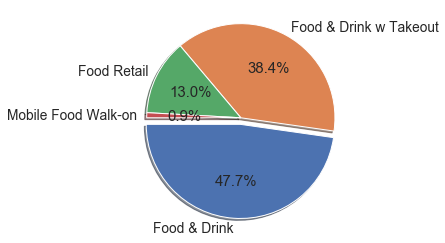

In [183]:
plt.pie(food_type,labels=['Food & Drink','Food & Drink w Takeout','Food Retail','Mobile Food Walk-on'],shadow=True,explode=(0.07,0,0,0),startangle=180,autopct='%1.1f%%')
plt.axis('equal')
plt.show()

## Understanding inspection results trend by year

In [184]:
food = resto_insp.copy()
food=food[food['violstatus']!='Reinspection Pass']
print(food.shape)
print(food.businessname.nunique())

(44141, 11)
1474


In [185]:
food['food_name']=food['businessname'].str.cat(food['city'],sep=" - ")
food['food_name']=food['food_name'].str.cat(food['zip'],sep=", ")
food.head()

businessname             violation  viollevel  \
0  100 Percent Delicia Food  08-3-302.11/3-304.11          3   
1  100 Percent Delicia Food       08-3-305-307.11          1   
2  100 Percent Delicia Food       08-3-305-307.11          1   
3  100 Percent Delicia Food     17-4-204.112/.115          1   
4         Ariana Restaurant                  Pass          0   

                                      violdesc                  violstatus  \
0  Separation  Segregation Cross Contamination  Fail - Reinspection Needed   
1                              Food Protection  Fail - Reinspection Needed   
2                              Food Protection  Fail - Reinspection Needed   
3                       Equipment Thermometers  Fail - Reinspection Needed   
4                                         Pass                        Pass   

                                            comments        city    zip  \
0  Observed raw chicken stored over ready to eat ...  Roslindale  02131   
1  Closet next to microwave with pots stored on t...  Roslindale  02131   
2  Observed buckets of food products stored direc...  Roslindale  02131   
3  Provide working internal thermometers for all ...  Roslindale  02131   
4                                                       Brighton  02135   

  resultyear resultmonth issueyear  \
0       2015           7      2013   
1       2015           7      2013   
2       2015           7      2013   
3       2015           7      2013   
4       2017          10      2015   

                                      food_name  
0  100 Percent Delicia Food - Roslindale, 02131  
1  100 Percent Delicia Food - Roslindale, 02131  
2  100 Percent Delicia Food - Roslindale, 02131  
3  100 Percent Delicia Food - Roslindale, 02131  
4           Ariana Restaurant - Brighton, 02135

**To write a csv:**  `food.to_csv('resto_name.csv')`

In [186]:
# number of restaurants inspected per year
noresto_by_yr = food.groupby('resultyear').businessname.nunique()
print(noresto_by_yr)

resultyear
2015    1043
2016    1188
2017    1267
2018    1463
Name: businessname, dtype: int64


In [187]:
# sum violation level by year
sumviol_by_yr = food.groupby('resultyear').viollevel.sum()
print(sumviol_by_yr)

resultyear
2015    12863
2016    15651
2017    13087
2018    18319
Name: viollevel, dtype: int64


In [188]:
food_by_yr=sumviol_by_yr/noresto_by_yr
food_by_yr

resultyear
2015    12.332694
2016    13.174242
2017    10.329124
2018    12.521531
dtype: float64

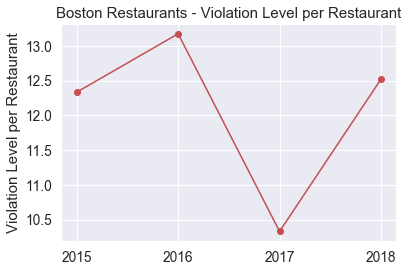

In [189]:
plt.plot(food_by_yr, marker='o', color='r')
plt.ylabel('Violation Level per Restaurant')
plt.title('Boston Restaurants - Violation Level per Restaurant')
plt.show()

In [190]:
# "dirtiest" resto over time period 2015-2018
not_clean=pd.DataFrame(food.groupby('food_name').viollevel.sum().sort_values(ascending=False).head(10))
print(not_clean)

                                        viollevel
food_name                                        
Yamato Ii - Boston, 02116                     364
Dumpling Palace - Boston, 02115               303
The Real Deal - West Roxbury, 02132           257
Fan Fan Restaurant - Hyde Park, 02136         243
Paramount - Boston, 02114                     233
Bonchon Allston - Allston, 02134              221
Talk And Wok Cafe - Hyde Park, 02136          219
Zaz Restaurant - Hyde Park, 02136             198
B Good - Boston, 02116                        194
Stephanie's On Newbury - Boston, 02116        191


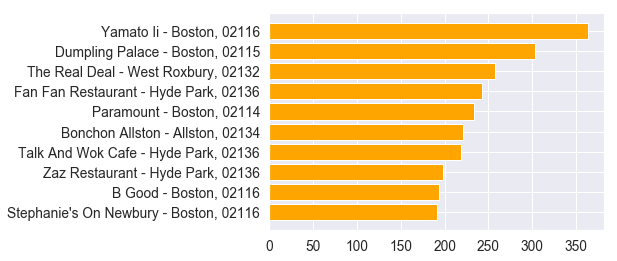

In [191]:
plt.barh(not_clean.index,not_clean['viollevel'],color='orange')
plt.gca().invert_yaxis()

In [192]:
# "cleaniest" resto over time period 2015-2018
clean=pd.DataFrame(food.groupby('food_name').viollevel.sum().sort_values().head(20))
print(clean)

                                                    viollevel
food_name                                                    
Juicy Greens - Jamaica Plain, 02130                         0
Classic Harbor Lines - Boston, 02110                        0
Convene @ 1 Boston Place - Boston, 02108                    0
Copley Square Hotel - Boston, 02116                         0
Cosi No. 312 (hood Park Cafe) - Charlestown, 02129          0
D's Keys Dueling Pianos - Boston, 02210                     0
Damasco Mediterranean Cuisine - Brighton, 02135             0
Democracy Brewing - Boston, 02111                           0
Sweet Cheeks/Fool's Errand - Boston, 02215                  0
Double Chin - Boston, 02111                                 0
The Westland - Boston, 02115                                0
El Triunfo Restaurant / Ali Baba - Roxbury, 02118           0
Embassy Suites - East Boston, 02128                         0
Emirates Lounge - East Boston, 02128                        0
Energize

## Focus on 2018 (recent data)

In [193]:
food_2018 = food[food['resultyear']=='2018']
print('# of inspections in 2018 = ', food_2018.shape[0])
print('# of unique restaurants in 2018 = ', food_2018.food_name.nunique())

# of inspections in 2018 =  13251
# of unique restaurants in 2018 =  1580


In [194]:
food_2018['comments']=food_2018['comments'].str.lower()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [195]:
food_2018.describe(include='all')

businessname        violation     viollevel  \
count           13251            13251  13251.000000   
unique           1463               86           NaN   
top     The Real Deal  37-6-501.11-.12           NaN   
freq              110              979           NaN   
mean              NaN              NaN      1.382462   
std               NaN              NaN      0.830716   
min               NaN              NaN      0.000000   
25%               NaN              NaN      1.000000   
50%               NaN              NaN      1.000000   
75%               NaN              NaN      1.000000   
max               NaN              NaN      3.000000   

                                      violdesc                  violstatus  \
count                                    13251                       13251   
unique                                      84                           2   
top     Improper Maintenance of Walls/Ceilings  Fail - Reinspection Needed   
freq                                       979                       12644   
mean                                       NaN                         NaN   
std                                        NaN                         NaN   
min                                        NaN                         NaN   
25%                                        NaN                         NaN   
50%                                        NaN                         NaN   
75%                                        NaN                         NaN   
max                                        NaN                         NaN   

       comments    city    zip resultyear resultmonth issueyear  \
count     13251   13251  13251      13251       13251     13251   
unique    11328      17     32          1          12         9   
top              Boston  02116       2018          10      2012   
freq        654    7191   1754      13251        1704      5396   
mean        NaN     NaN    NaN        NaN         NaN       NaN   
std         NaN     NaN    NaN        NaN         NaN       NaN   
min         NaN     NaN    NaN        NaN         NaN       NaN   
25%         NaN     NaN    NaN        NaN         NaN       NaN   
50%         NaN     NaN    NaN        NaN         NaN       NaN   
75%         NaN     NaN    NaN        NaN         NaN       NaN   
max         NaN     NaN    NaN        NaN         NaN       NaN   

                                  food_name  
count                                 13251  
unique                                 1580  
top     The Real Deal - West Roxbury, 02132  
freq                                    110  
mean                                    NaN  
std                                     NaN  
min                                     NaN  
25%                                     NaN  
50%                                     NaN  
75%                                     NaN  
max                                     NaN

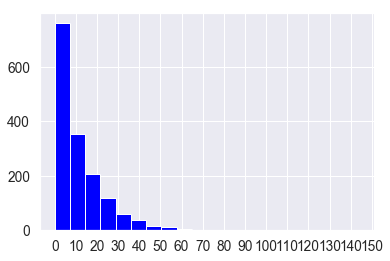

In [196]:
vio2018 = food_2018.groupby('food_name').viollevel.sum().sort_values(ascending=False)
plt.hist(vio2018,bins=20,color='blue')
plt.xticks(np.arange(0, 160, step=10))
plt.show()

In [197]:
vio2018.describe()

count    1580.000000
mean       11.594304
std        13.472486
min         0.000000
25%         2.000000
50%         8.000000
75%        17.000000
max       144.000000
Name: viollevel, dtype: float64

([<matplotlib.axis.XTick at 0x1a46d19e48>,
 <a list of 16 Text xticklabel objects>)

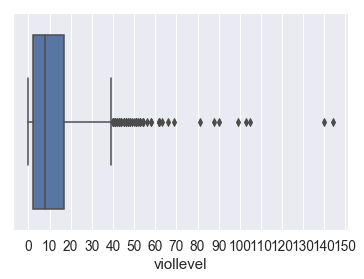

In [198]:
sns.boxplot(vio2018)
plt.xticks(np.arange(0, 160, step=10))

                                                  viollevel
food_name                                                  
The Real Deal - West Roxbury, 02132                     144
Dumpling Palace - Boston, 02115                         140
Talk And Wok Cafe - Hyde Park, 02136                    105
Athan's European Bakery - Brighton, 02135               103
Fan Fan Restaurant - Hyde Park, 02136                    99
Mdm Noodle - Brighton, 02135                             90
Bukhara Indian Bistro - Jamaica Plain, 02130             88
International House Of Pancake - Brighton, 02135         81
College Pizza - Boston, 02215                            69
Fire & Ice - Boston, 02116                               66
Douzo Japanese Restaurant - Boston, 02116                63
Beantown Pho & Grill - Boston, 02116                     62
Stephanie's On Newbury - Boston, 02116                   62
Anh Hong Restaurant - Boston, 02122                      62
Saigon Seafood Restaurant - Dorchester, 

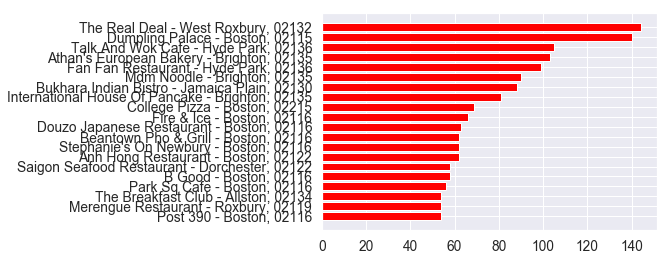

In [199]:
# top 20 "dirtiest" restaurant
top20=pd.DataFrame(vio2018)
dirty20=top20.head(20)
print(dirty20)
plt.barh(dirty20.index,dirty20['viollevel'],color='red')
plt.gca().invert_yaxis()

In [200]:
# top 20 "cleaniest" restaurant
clean20=top20.tail(20)
print(clean20)

                                                    viollevel
food_name                                                    
Sorellina Restaurant - Boston, 02116                        0
Flik @ Goodwin Proctor - Boston, 02210                      0
Sons Of Boston - Boston, 02108                              0
Flour Bakery & Cafe - Boston, 02210                         0
Cafe Amalfi - Boston, 02109                                 0
Cafe De Boston - Boston, 02110                              0
Nfarra 2 - East Boston, 02128                               0
New Shanghai - Boston, 02111                                0
New England Center For Arts & Technology - Roxb...          0
The Best Little Restaurant - Boston, 02111                  0
Cafe Susu - Boston, 02116                                   0
Flik @ Kirkland & Ellis - Boston, 02116                     0
Turtle Swamp Brewing - Jamaica Plain, 02130                 0
Nathalie Wine Bar - Boston, 02215                           0
Caffe Ar

In [201]:
level=pd.DataFrame(list(np.unique(food_2018['viollevel'], return_counts=True))).T
level.columns= ['viol_lev','freq']
level.sort_values('freq',ascending=False)

viol_lev  freq
1         1  9369
3         3  2400
2         2   875
0         0   607

In [202]:
violtext=pd.DataFrame(list(np.unique(food_2018['violdesc'], return_counts=True))).T
violtext.columns = ['viol_desc','freq']
violtext=violtext[violtext['viol_desc']!='Pass']
violtext_lev=pd.DataFrame(violtext)
viol_top10=violtext.sort_values('freq',ascending=False).head(10)
viol_top10

viol_desc freq
30  Improper Maintenance of Walls/Ceilings  979
45         Non-Food Contact Surfaces Clean  884
29          Improper Maintenance of Floors  861
44               Non-Food Contact Surfaces  797
17             Food Contact Surfaces Clean  722
20                         Food Protection  629
35                Installed and Maintained  533
24    Hand Cleaner  Drying  Tissue Signage  473
6                             Cold Holding  455
18            Food Contact Surfaces Design  441

In [203]:
topviol=food_2018[food_2018['violdesc']=='Improper Maintenance of Walls/Ceilings']

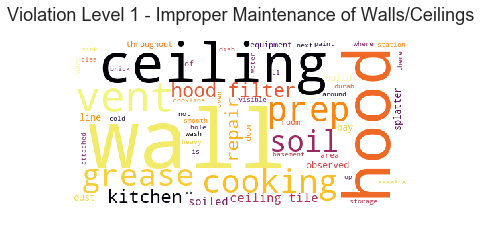

In [204]:
stopwords = ('clean','remove','the','above','and','all','with','in','on','food','to','behind','at','from')
wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=600,width=500,height=250,min_font_size=10,colormap='inferno').generate(str(topviol['comments']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Violation Level 1 - Improper Maintenance of Walls/Ceilings',fontsize='large',pad=20)
plt.show()

In [205]:
viol_lev2=food_2018[food_2018['viollevel']==2]
topviol_lev2=pd.DataFrame(list(np.unique(viol_lev2['violdesc'], return_counts=True))).T
topviol_lev2.columns = ['viol_desc','freq']
topviol_lev2.sort_values('freq',ascending=False).head(10)

viol_desc freq
1                Food Contact Surfaces Clean  476
2                  Insects  Rodents  Animals  350
8                             Tags & Records   24
3                   Reduced Oxygen Packaging    7
7                              Shellstock ID    6
0  Cross Connection Back Siphonage  Backflow    5
6                     Sewage and Waste Water    4
5           Safe Food Handeling Instructions    2
4        Reservice of PHF or Unwrapped Foods    1

In [206]:
topviol2=viol_lev2[viol_lev2['violdesc']=='Food Contact Surfaces Clean']
print('#of inspection comments for top violation level 2 = ', topviol2['comments'].nunique())

#of inspection comments for top violation level 2 =  404


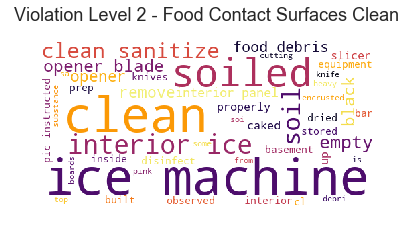

In [207]:
stopwords = ('can','of','and','to','and','the','in','with','at','on','found','all')
wordcloud2 = WordCloud(background_color='white', stopwords=stopwords, max_words=600,width=500,height=250,min_font_size=10,colormap='inferno').generate(str(topviol2['comments']))

print(wordcloud2)
fig = plt.figure(1)
plt.imshow(wordcloud2)
plt.axis('off')
plt.title('Violation Level 2 - Food Contact Surfaces Clean',fontsize='large',pad=20)
plt.show()

In [208]:
topviol2a=viol_lev2[viol_lev2['violdesc']=='Insects  Rodents  Animals']
print('#of inspection comments for top violation level 2a = ', topviol2a['comments'].nunique())

#of inspection comments for top violation level 2a =  326


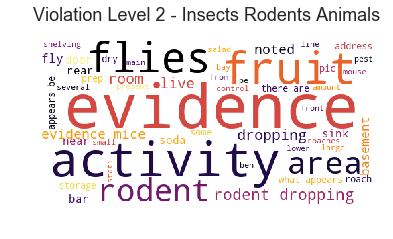

In [209]:
stopwords = ('can','of','and','to','and','the','in','with','at','on','found','all','provide','observed','establishment','remove')
wordcloud5 = WordCloud(background_color='white', stopwords=stopwords, max_words=600,width=500,height=250,min_font_size=10,colormap='inferno').generate(str(topviol2a['comments']))

print(wordcloud5)
fig = plt.figure(1)
plt.imshow(wordcloud5)
plt.axis('off')
plt.title('Violation Level 2 - Insects Rodents Animals',fontsize='large',pad=20)
plt.show()

In [210]:
viol_lev3=food_2018[food_2018['viollevel']==3]
topviol_lev3=pd.DataFrame(list(np.unique(viol_lev3['violdesc'], return_counts=True))).T
topviol_lev3.columns = ['viol_desc','freq']
topviol_lev3.sort_values('freq',ascending=False).head(10)

viol_desc freq
2                                  Cold Holding  455
18                        PIC Performing Duties  373
7                   Food Contact Surfaces Clean  246
13                         Location  Accessible  204
9                                   Hot Holding  143
26  Separation  Segregation Cross Contamination  143
4                           Consumer Advisories  130
17                                PIC Knowledge  128
0           Adequate Handwashing/Where/When/How  103
6                                       Cooling   59

In [211]:
topviol3=viol_lev3[viol_lev3['violdesc']=='Cold Holding']
print('#of inspection comments for top violation level 3 = ', topviol3['comments'].nunique())

#of inspection comments for top violation level 3 =  453


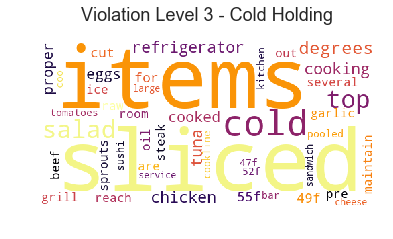

In [212]:
stopwords = ('can','of','and','to','and','the','in','with','at','on','all','is','being','left','unit','provide','observed','line')
wordcloud3 = WordCloud(background_color='white', stopwords=stopwords, max_words=600,width=500,height=250,min_font_size=10,colormap='inferno').generate(str(topviol3['comments']))

print(wordcloud3)
fig = plt.figure(1)
plt.imshow(wordcloud3)
plt.axis('off')
plt.title('Violation Level 3 - Cold Holding',fontsize='large',pad=20)
plt.show()

In [213]:
topviol3a=viol_lev3[viol_lev3['violdesc']=='PIC Performing Duties']
print('#of inspection comments for top violation level 3a = ', topviol3a['comments'].nunique())

#of inspection comments for top violation level 3a =  352


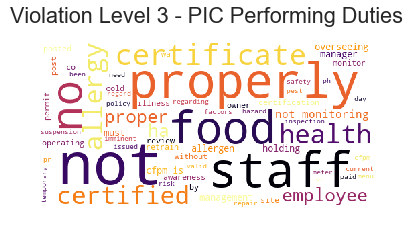

In [214]:
stopwords = ('can','of','and','to','and','the','in','with','at','on','for','all','provide','establishment','pic')
wordcloud4 = WordCloud(background_color='white', stopwords=stopwords, max_words=600,width=500,height=250,min_font_size=10,colormap='inferno').generate(str(topviol3a['comments']))

print(wordcloud4)
fig = plt.figure(1)
plt.imshow(wordcloud4)
plt.axis('off')
plt.title('Violation Level 3 - PIC Performing Duties',fontsize='x-large',pad=20)
plt.show()

In [215]:
level_city=food_2018.groupby('city').viollevel.sum().sort_values(ascending=False)

In [216]:
resto_city=food_2018.groupby('city').businessname.nunique().sort_values(ascending=False)

In [217]:
level_per_resto=level_city/resto_city
level_per_resto=level_per_resto.sort_values(ascending=False)
level_per_resto=pd.DataFrame(level_per_resto)
level_per_resto.columns=['viollevel']

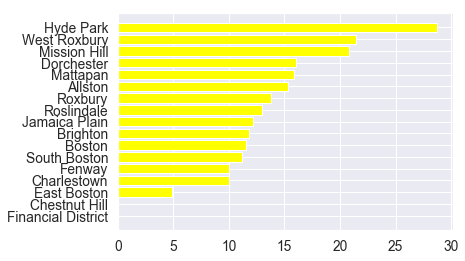

In [218]:
plt.barh(level_per_resto.index,level_per_resto['viollevel'],color='yellow')
plt.gca().invert_yaxis()